# Predicting Housing Prices Project

## Project Outline
### 0. Problem Definition  
### 1. Import Libraries
### 2. Data Import  
### 3. Data Exploration (EDA)  
### 4. Data Cleaning & Preprocessing  
### 5. Modeling  
### 6. Evaluation  
### 7. Deployment  
### 8. Documentation & Reporting  
### 9. Conclusion & Future Work  

## 1. Import Libraries

In [189]:
# Data and Processing
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.stats import skew, kurtosis, pearsonr
import math

# Modeling and Evaluation
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# PyTorch
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader


## 2. Data Import

In [9]:
train_path = '/Users/kevingoldberg/Documents/Personal Projects/Housing/house-prices-advanced-regression-techniques/train.csv'
test_path = '/Users/kevingoldberg/Documents/Personal Projects/Housing/house-prices-advanced-regression-techniques/test.csv'
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

## 3. Data Exploration

### 3.1 Preview the Data

In [ ]:
display(df_train.head())
display(df_test.head())
print(df_train.shape, df_test.shape)
print(df_train.columns)
df_train.info()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

(1460, 81) (1459, 80)
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'Ga

### 3.2 Understand Data Types

In [41]:
df_features = df_train.drop(columns=['SalePrice','Id'])  # drop the target
df_target = df_train['SalePrice']
display(df_features.dtypes.to_frame(name='Data Type'))
display(df_features.dtypes.value_counts())

# Separate features by Type
numeric_cols = df_features.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df_features.select_dtypes(include='object').columns.tolist()
bool_cols = df_features.select_dtypes(include='bool').columns.tolist()

# Display the number of unique values in each feature
df_features.nunique().sort_values()


Data Type
MSSubClass        int64
MSZoning         object
LotFrontage     float64
LotArea           int64
Street           object
...                 ...
MiscVal           int64
MoSold            int64
YrSold            int64
SaleType         object
SaleCondition    object

[79 rows x 1 columns]

object     43
int64      33
float64     3
Name: count, dtype: int64

CentralAir         2
Street             2
Alley              2
Utilities          2
GarageFinish       3
                ... 
TotalBsmtSF      721
1stFlrSF         753
BsmtUnfSF        780
GrLivArea        861
LotArea         1073
Length: 79, dtype: int64

### 3.3 Identify Missing Values

Missing Count  Missing %
PoolQC                 1453  99.520548
MiscFeature            1406  96.301370
Alley                  1369  93.767123
Fence                  1179  80.753425
MasVnrType              872  59.726027
FireplaceQu             690  47.260274
LotFrontage             259  17.739726
GarageType               81   5.547945
GarageYrBlt              81   5.547945
GarageFinish             81   5.547945
GarageQual               81   5.547945
GarageCond               81   5.547945
BsmtFinType2             38   2.602740
BsmtExposure             38   2.602740
BsmtFinType1             37   2.534247
BsmtCond                 37   2.534247
BsmtQual                 37   2.534247
MasVnrArea                8   0.547945
Electrical                1   0.068493

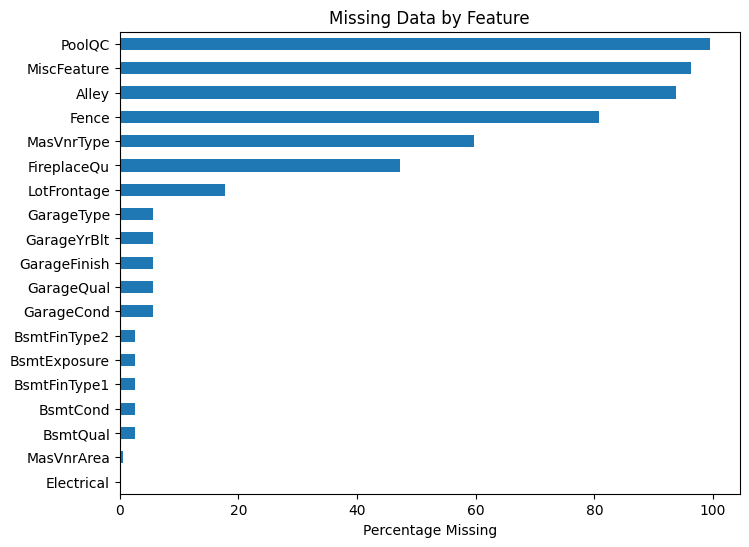

Missing in Numeric Columns:


LotFrontage    259
GarageYrBlt     81
MasVnrArea       8
dtype: int64

Missing in Categorical Columns:


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
GarageType        81
GarageCond        81
GarageQual        81
GarageFinish      81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtQual          37
BsmtCond          37
Electrical         1
dtype: int64

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1218          50       RM         52.0     6240   Pave   NaN      Reg   
533           20       RL         50.0     5000   Pave   NaN      Reg   
39            90       RL         65.0     6040   Pave   NaN      Reg   
1011          90       RL         75.0     9825   Pave   NaN      Reg   
1179          20       RL         77.0     8335   Pave   NaN      Reg   

     LandContour Utilities LotConfig  ... PoolQC Fence MiscFeature MiscVal  \
1218         Lvl    AllPub    Inside  ...    NaN   NaN         NaN       0   
533          Low    AllPub    Inside  ...    NaN   NaN         NaN       0   
39           Lvl    AllPub    Inside  ...    NaN   NaN         NaN       0   
1011         Lvl    AllPub    Inside  ...    NaN   NaN         NaN       0   
1179         Lvl    AllPub    Corner  ...    NaN   NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  missing_row_count  \
1218      7   2006        WD         Normal                 16   
533       1   2007        WD         Normal                 16   
39        6   2008        WD        AdjLand                 16   
1011      5   2010        WD         Normal                 16   
1179      4   2006        WD         Normal                 15   

      missing_row_percent  
1218            19.753086  
533             19.753086  
39              19.753086  
1011            19.753086  
1179            18.518519  

[5 rows x 81 columns]

In [ ]:
# Display missing values summary
missing_counts = df_features.isnull().sum()
missing_percent = df_features.isnull().mean() * 100
missing_summary = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing %': missing_percent
})
missing_summary = missing_summary[missing_summary['Missing Count'] > 0]\
                    .sort_values(by='Missing %', ascending=False)

display(missing_summary)

# Visualize missing values
missing_summary['Missing %'].plot(kind='barh', figsize=(8, 6))
plt.xlabel("Percentage Missing")
plt.title("Missing Data by Feature")
plt.gca().invert_yaxis()
plt.show()

missing_numeric = df_features[numeric_cols].isnull().sum().sort_values(ascending=False)
missing_categorical = df_features[categorical_cols].isnull().sum().sort_values(ascending=False)

print("Missing in Numeric Columns:")
display(missing_numeric[missing_numeric > 0])

print("Missing in Categorical Columns:")
display(missing_categorical[missing_categorical > 0])

# Display row counts for missing values
df_features['missing_row_count'] = df_features.isnull().sum(axis=1)
df_features['missing_row_percent'] = df_features.isnull().mean(axis=1) * 100
df_features.sort_values('missing_row_percent', ascending=False).head()


### 3.4 Explore Target Variable

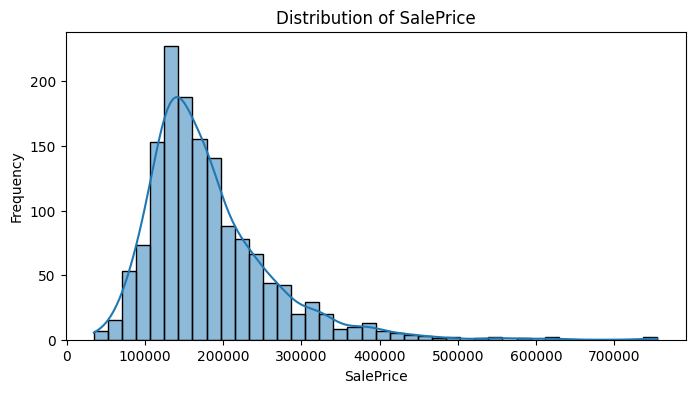

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Skewness: 1.88
Kurtosis: 6.51


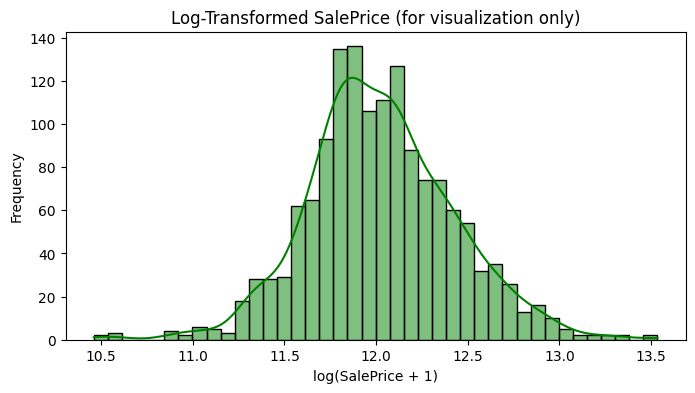

Log Skewness: 0.12
Log Kurtosis: 0.80


In [54]:
# Distribution of SalePrice
plt.figure(figsize=(8, 4))
sns.histplot(df_target, kde=True, bins=40)
plt.title("Distribution of SalePrice")
plt.xlabel("SalePrice")
plt.ylabel("Frequency")
plt.show()

# Display SalePrice statistics
display(df_target.describe())

# Display skewness and kurtosis of SalePrice
print(f"Skewness: {skew(df_target):.2f}")
print(f"Kurtosis: {kurtosis(df_target):.2f}")

# Log transformation of SalePrice
plt.figure(figsize=(8, 4))
sns.histplot(np.log1p(df_target), kde=True, bins=40, color='green')
plt.title("Log-Transformed SalePrice (for visualization only)")
plt.xlabel("log(SalePrice + 1)")
plt.ylabel("Frequency")
plt.show()

# Compare skew/kurtosis
print(f"Log Skewness: {skew(np.log1p(df_target)):.2f}")
print(f"Log Kurtosis: {kurtosis(np.log1p(df_target)):.2f}")


### 3.5 Explore Numerical Features

#### 3.5.1 Overview of Numerical Feature's Distributions

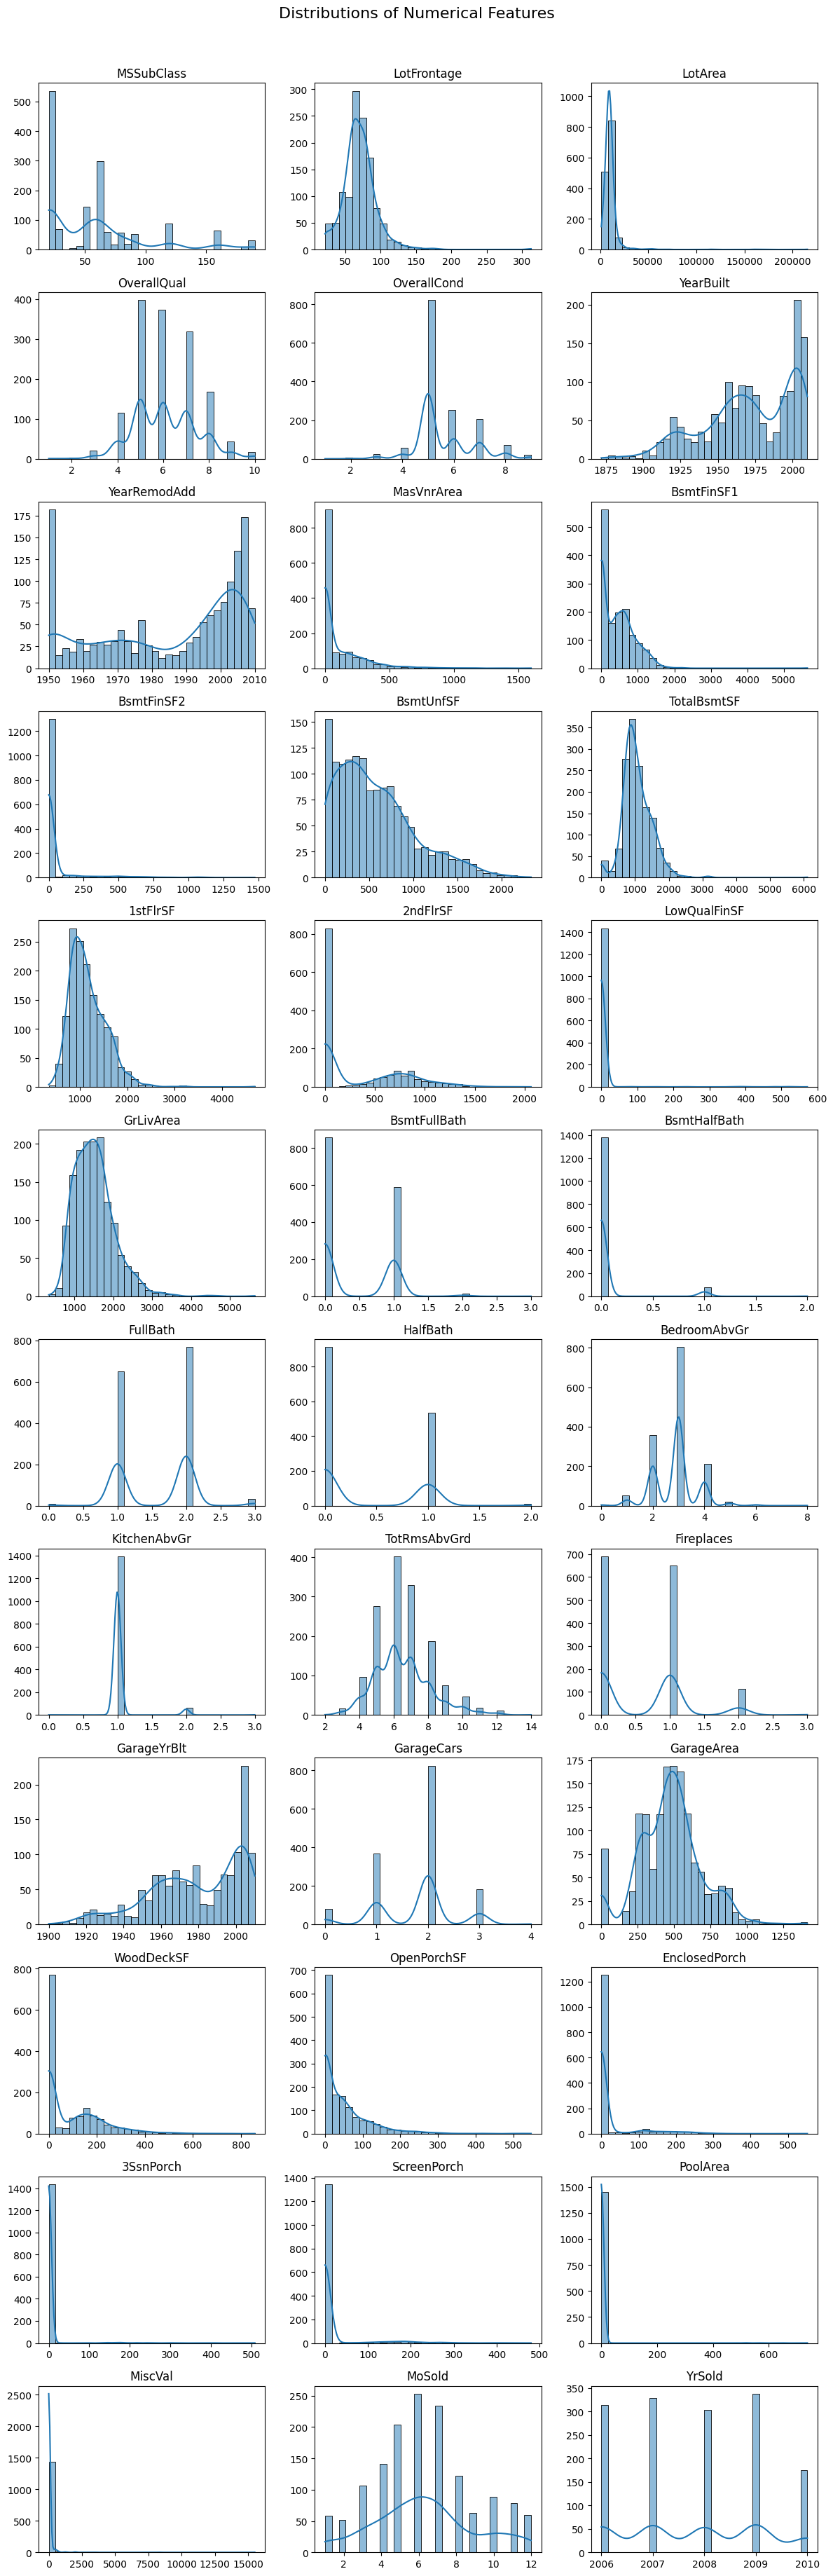

In [67]:
# Basic statistics for numeric features
df_train[numeric_cols].describe().T.sort_values('std', ascending=False)

# Plot all numeric columns
# Set up number of columns and rows
num_features = len(numeric_cols)
cols = 3  # number of plots per row
rows = math.ceil(num_features / cols)

# Create figure and axes
fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 3))
axes = axes.flatten()

# Plot each numeric feature
for i, col in enumerate(numeric_cols):
    sns.histplot(df_train[col], kde=True, ax=axes[i], bins=30)
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Remove any unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Distributions of Numerical Features', fontsize=16, y=1.02)
plt.show()

#### 3.5.2 Analyze Skewness

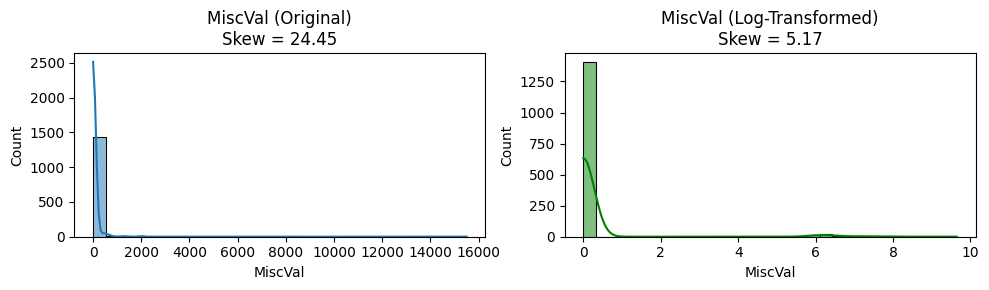

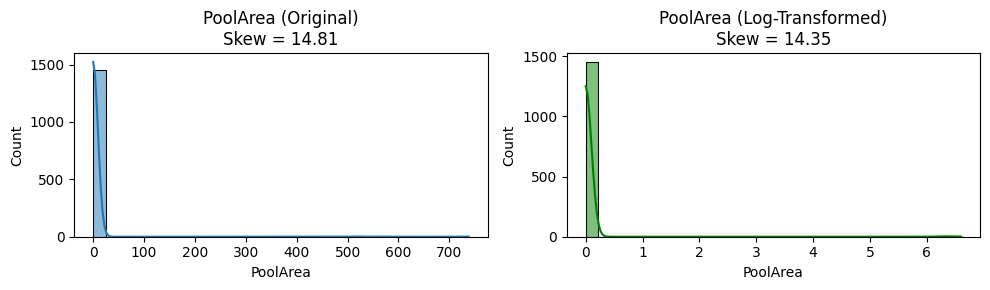

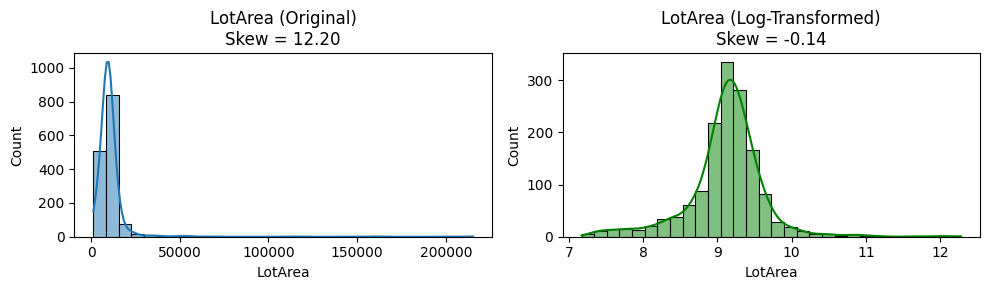

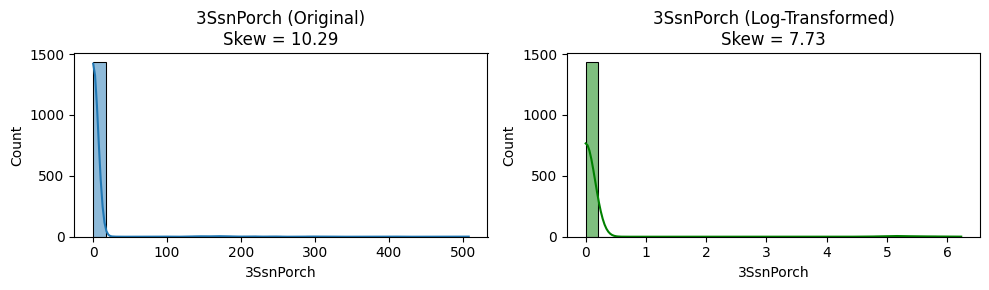

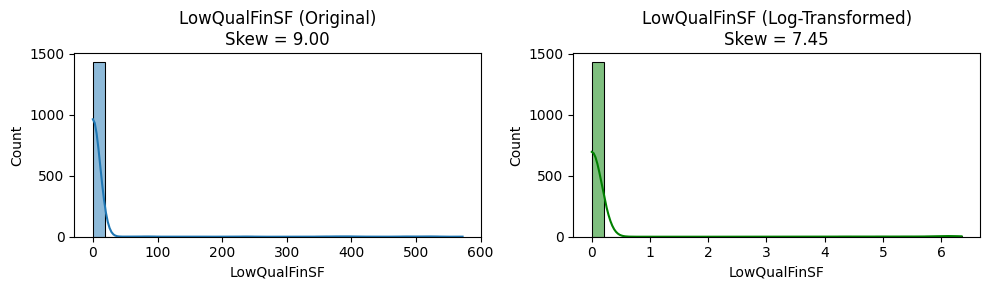

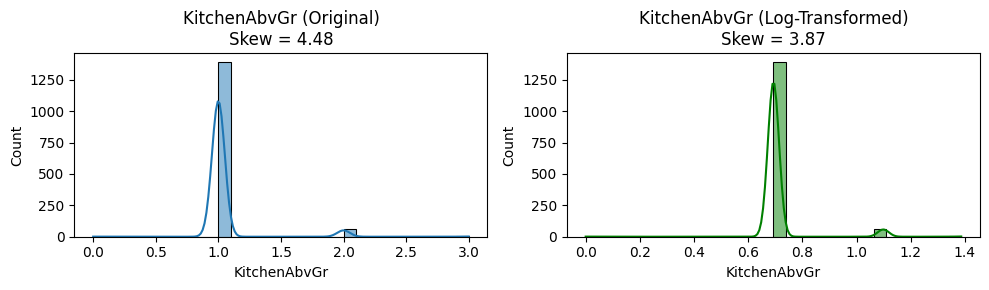

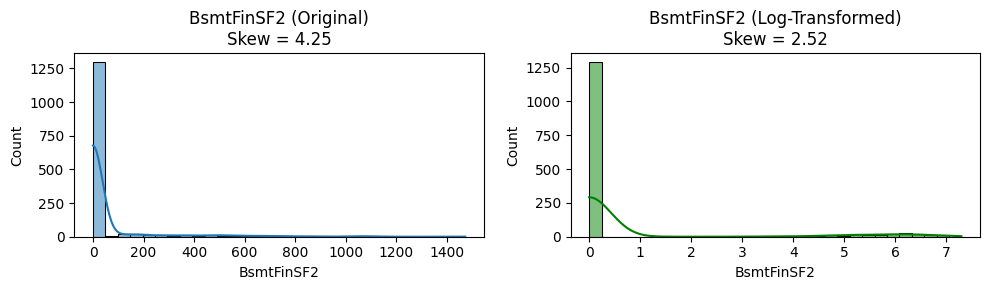

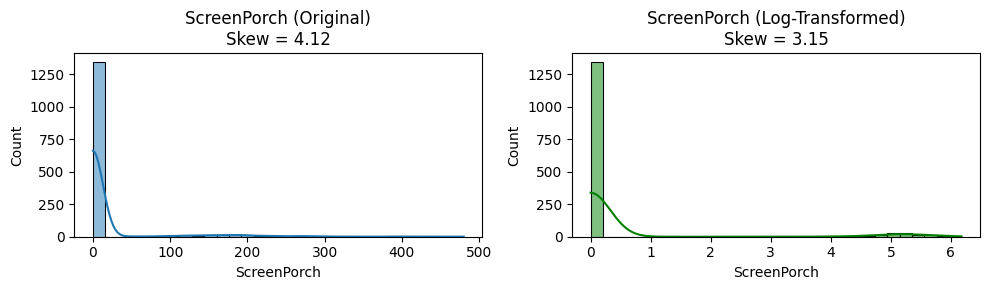

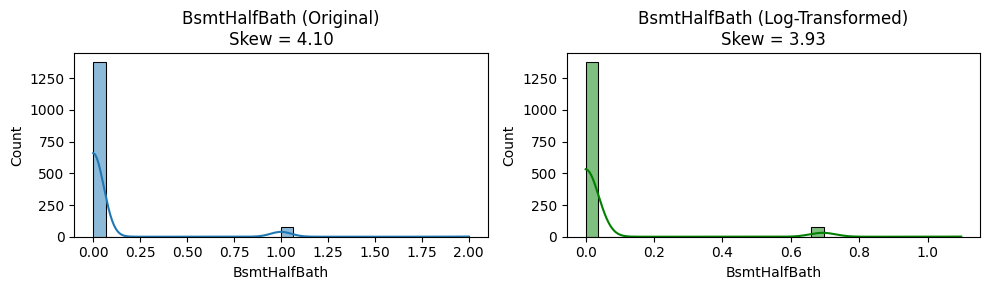

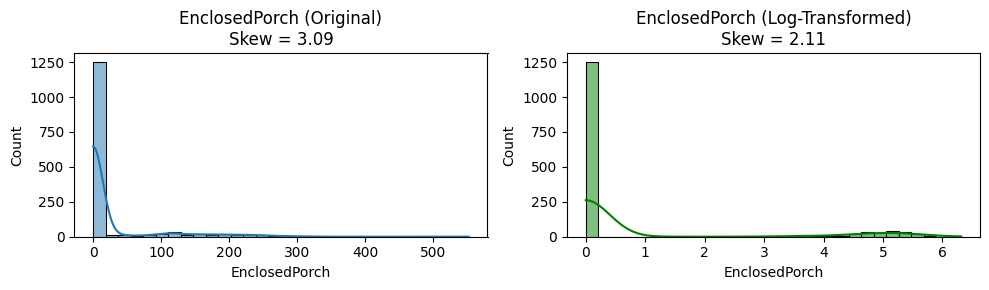

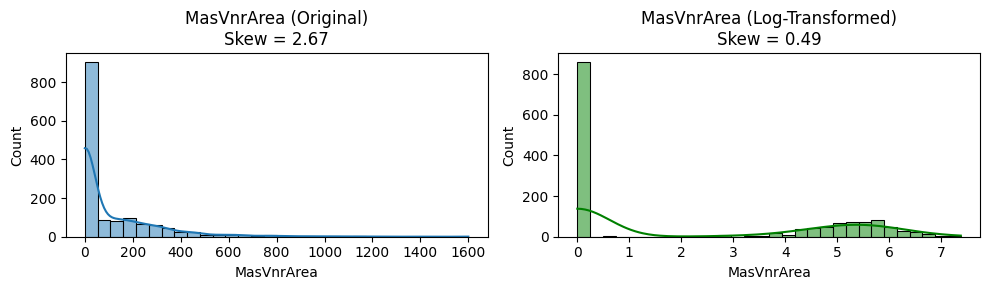

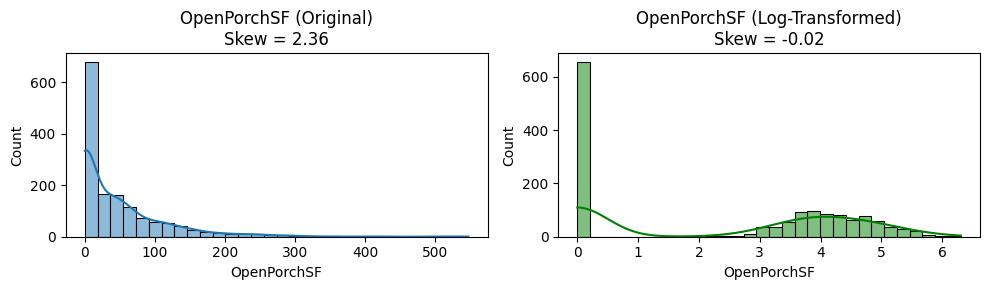

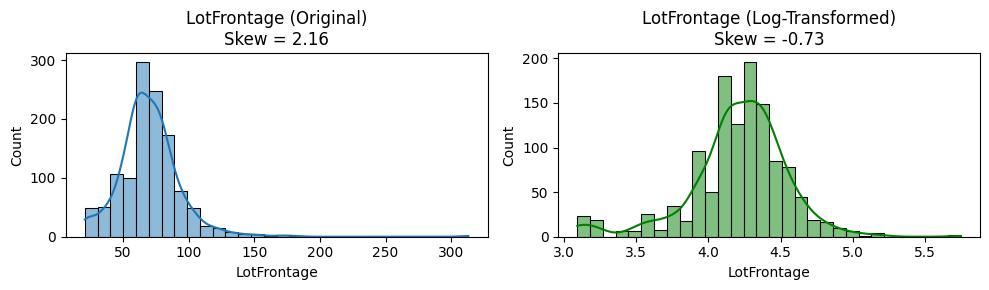

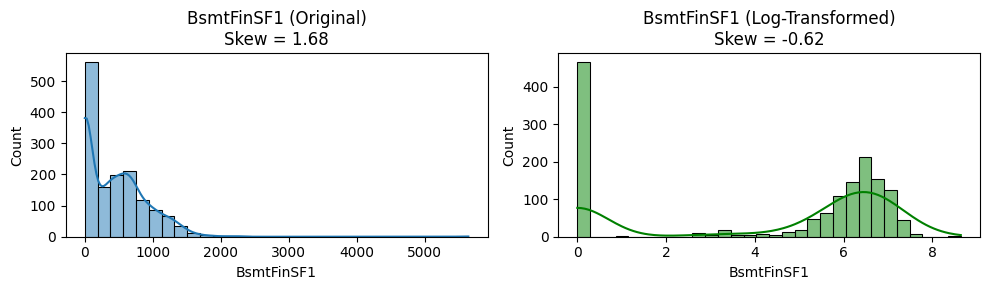

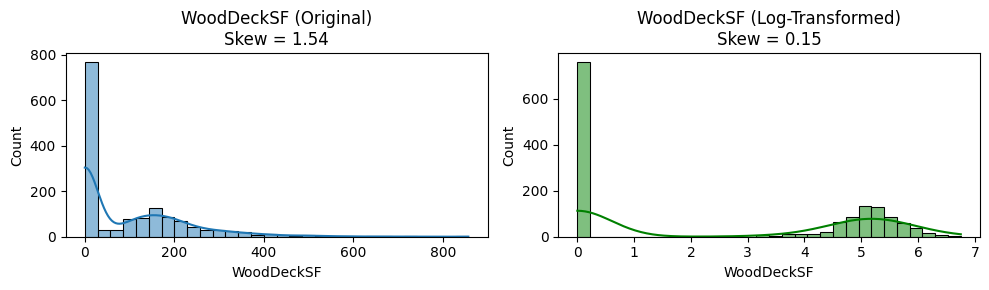

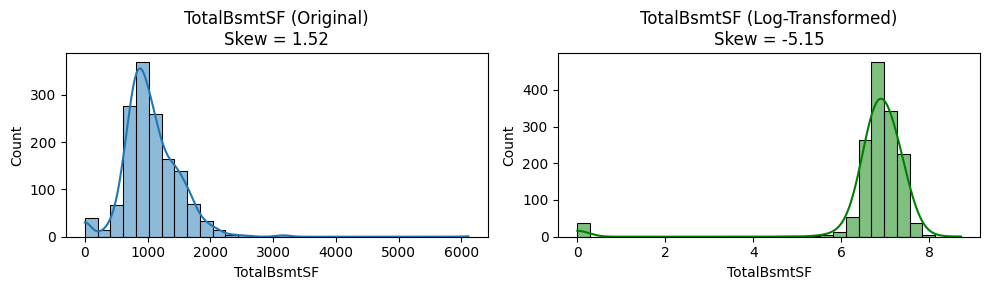

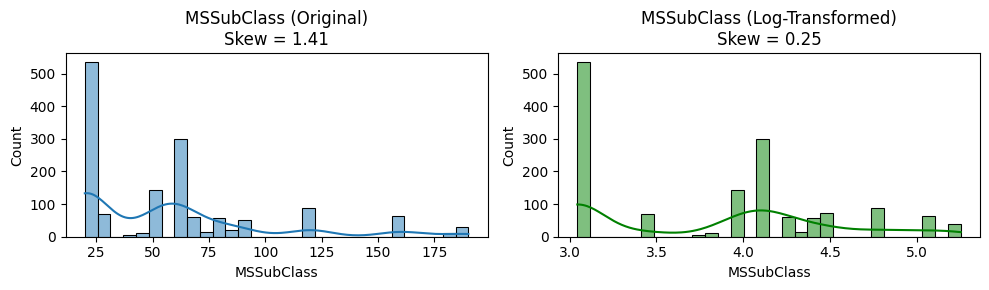

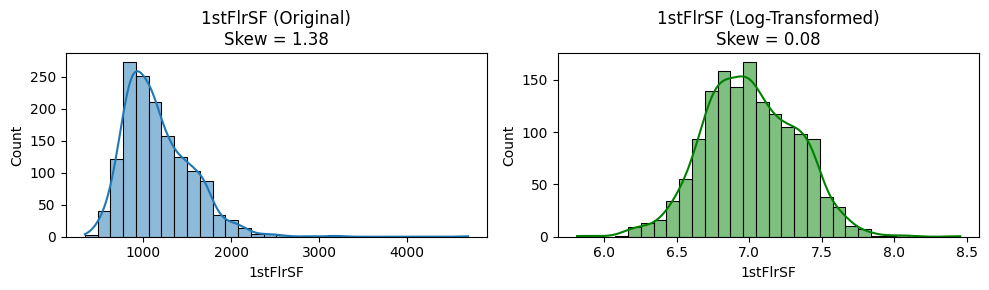

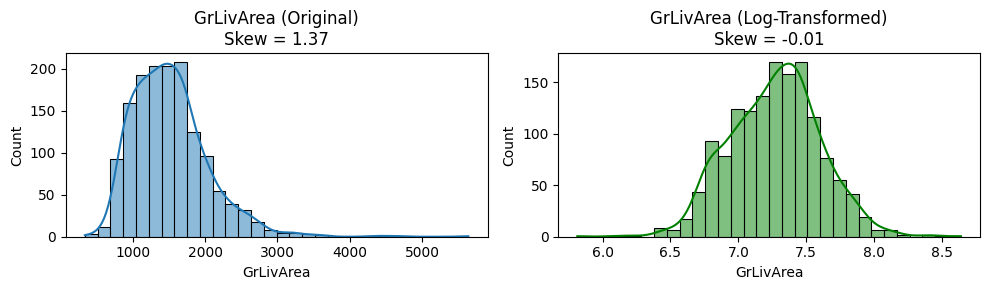

⚠️ Features with mostly zero values (excluded from log transform):


0          MiscVal
1         PoolArea
2        3SsnPorch
3     LowQualFinSF
4       BsmtFinSF2
5      ScreenPorch
6     BsmtHalfBath
7    EnclosedPorch
8       MasVnrArea
9       WoodDeckSF
Name: Mostly Zero Columns, dtype: object

✅ Features selected for log transformation based on skewness reduction:


0        LotArea
1    OpenPorchSF
2    LotFrontage
3     BsmtFinSF1
4     MSSubClass
5       1stFlrSF
6      GrLivArea
Name: Log Transform Features, dtype: object

In [75]:
# Calculate skewness for all numeric columns
numeric_skew = df_train[numeric_cols].skew().sort_values(ascending=False)

# Display skewness table
display(numeric_skew.to_frame(name='Skewness').style.background_gradient(cmap='coolwarm'))

# Select highly skewed numeric columns
high_skew_cols = numeric_skew[abs(numeric_skew) > 1].index.tolist()

# Plot original vs. log-transformed distributions with skew annotations
for col in high_skew_cols:
    original = df_train[col].dropna()
    transformed = np.log1p(original)

    original_skew = skew(original)
    transformed_skew = skew(transformed)

    fig, axes = plt.subplots(1, 2, figsize=(10, 3))

    # Original
    sns.histplot(original, kde=True, ax=axes[0], bins=30)
    axes[0].set_title(f"{col} (Original)\nSkew = {original_skew:.2f}")

    # Log-transformed
    sns.histplot(transformed, kde=True, ax=axes[1], bins=30, color='green')
    axes[1].set_title(f"{col} (Log-Transformed)\nSkew = {transformed_skew:.2f}")

    plt.tight_layout()
    plt.show()

# Identify features with mostly zero values (e.g., >80% zeros)
sparse_zero_cols = []

for col in high_skew_cols:
    zero_ratio = (df_train[col] == 0).mean()
    if zero_ratio > 0.5: # Adjust threshold as needed
        sparse_zero_cols.append(col)

print("⚠️ Features with mostly zero values (excluded from log transform):")
display(pd.Series(sparse_zero_cols, name='Mostly Zero Columns'))

# Select features for log transformation based on meaningful skew reduction AND not mostly zero
log_transform_features = []

for col in high_skew_cols:
    if col in sparse_zero_cols:
        continue  # Skip sparse features

    original = df_train[col].dropna()

    if original.min() < 0:
        continue  # skip negative values

    transformed = np.log1p(original)
    original_skew = abs(skew(original))
    transformed_skew = abs(skew(transformed))

    if (transformed_skew < original_skew * 0.75) and (transformed_skew < 2):
        log_transform_features.append(col)

# Display final selected features for log transformation
print("✅ Features selected for log transformation based on skewness reduction:")
display(pd.Series(log_transform_features, name='Log Transform Features'))


#### 3.5.3 Explore Relationships Between Numerical Features and SalePrice

🔍 Numerical Features with |Correlation| > 0.3:


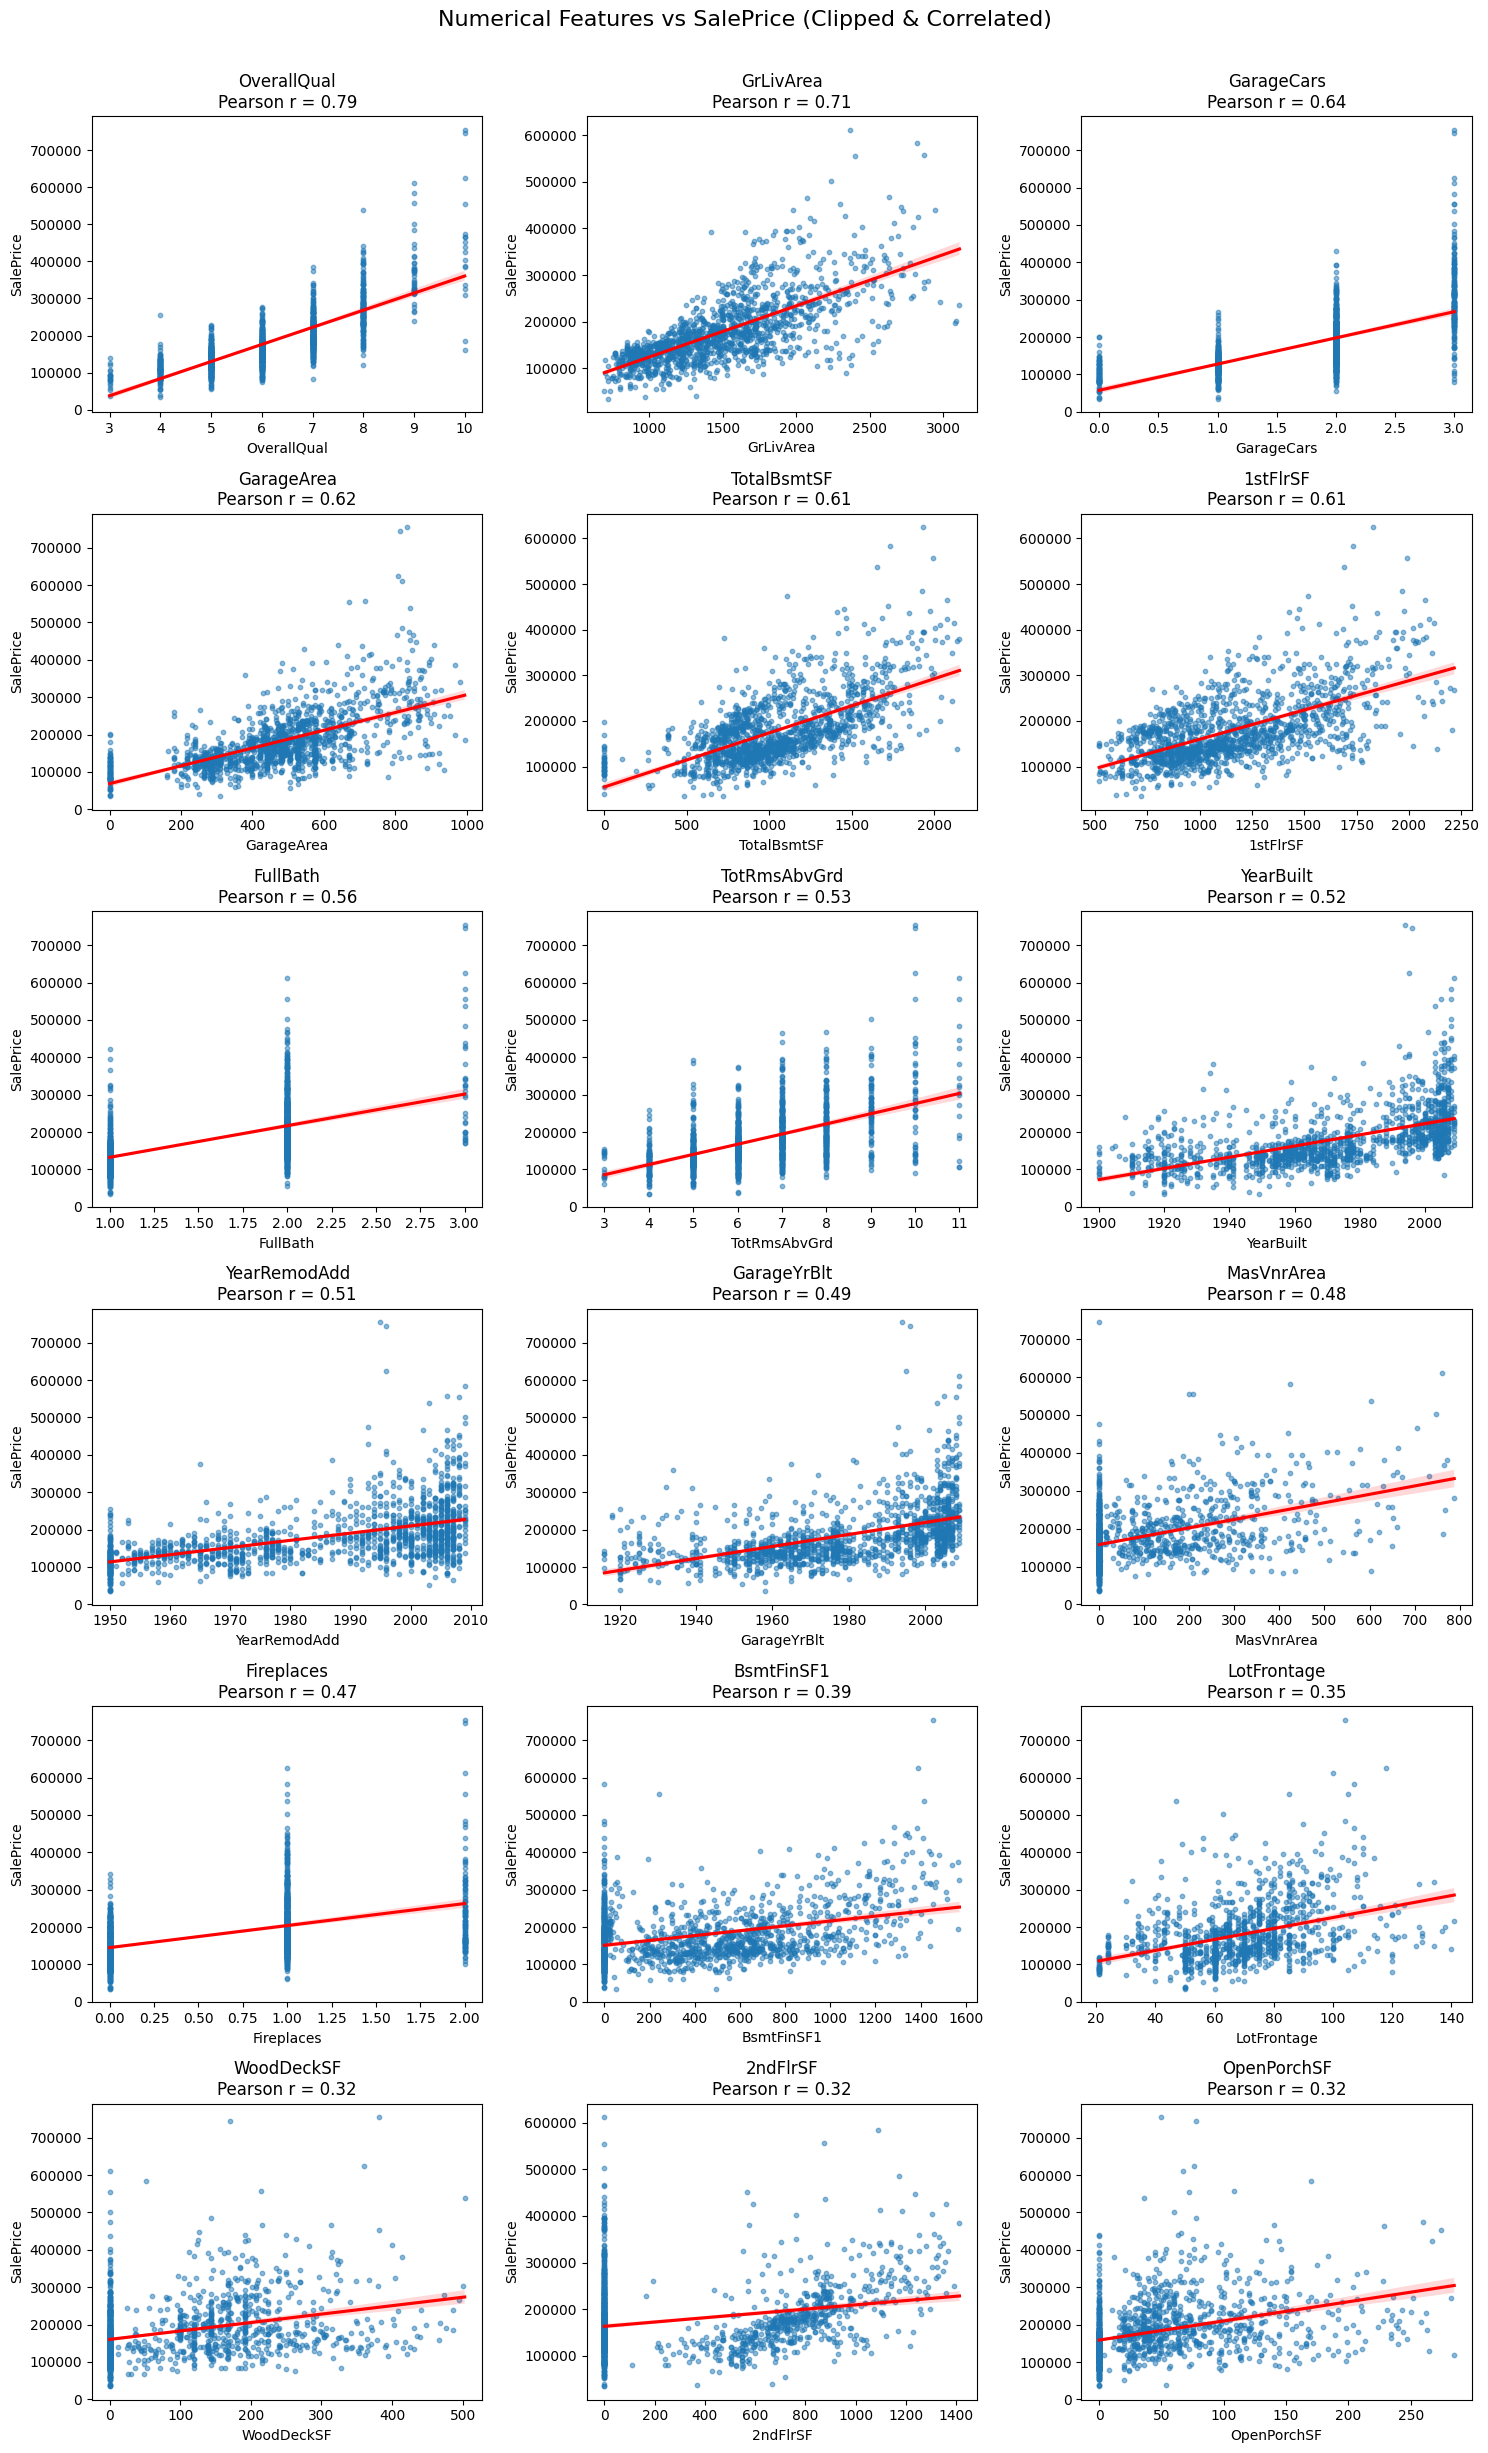

🧠 Mutual Information Scores with SalePrice:


In [92]:
# Step 1: Compute correlations with SalePrice
correlation_series = df_train[numeric_cols + ['SalePrice']].corr()['SalePrice'].drop('SalePrice')

# Step 2: Set a correlation threshold
correlation_threshold = 0.3
filtered_corr = correlation_series[correlation_series.abs() > correlation_threshold].sort_values(key=abs, ascending=False)
selected_features = filtered_corr.index.tolist()

# Step 3: Display correlation values
print(f"🔍 Numerical Features with |Correlation| > {correlation_threshold}:")
display(filtered_corr.to_frame(name='Correlation').style.background_gradient(cmap='vlag'))

# Step 4: Grid layout of scatter plots with outlier clipping
cols = 3
rows = math.ceil(len(selected_features) / cols)
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
axes = axes.flatten()

for i, col in enumerate(selected_features):
    x = df_train[col]
    y = df_train['SalePrice']

    # Clip outliers at 1st and 99th percentiles
    lower = x.quantile(0.01)
    upper = x.quantile(0.99)
    mask = (x >= lower) & (x <= upper)
    x_clipped = x[mask]
    y_clipped = y[mask]

    sns.regplot(x=x_clipped, y=y_clipped, ax=axes[i],
                scatter_kws={'s': 10, 'alpha': 0.5}, line_kws={'color': 'red'})

    r = correlation_series[col]
    axes[i].set_title(f"{col}\nPearson r = {r:.2f}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("SalePrice")

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("Numerical Features vs SalePrice (Clipped & Correlated)", fontsize=16, y=1.02)
plt.show()

# Calculate mutual information with SalePrice
# Fill missing values (required for MI calculation)
X_numeric = df_train[numeric_cols].fillna(0)
y_target = df_train['SalePrice']

# Compute mutual information scores
mi_scores = mutual_info_regression(X_numeric, y_target, discrete_features=False, random_state=42)
mi_series = pd.Series(mi_scores, index=numeric_cols).sort_values(ascending=False)

# Display top features by mutual information
print("🧠 Mutual Information Scores with SalePrice:")
display(mi_series.to_frame(name="MI Score").style.background_gradient(cmap='YlGn'))

# Store selected features based on correlation

#### 3.5.4 Store Highly Correlated Numerical Features

In [107]:
# Features with |Pearson correlation| > threshold
num_corr_pearson = filtered_corr.index.tolist()

# Features with Mutual Information > threshold
mi_threshold = 0.1  # You can tune this
num_corr_mi = mi_series[mi_series > mi_threshold].index.tolist()

# Union of both sets — final strong numerical features
num_corr_strong = list(set(num_corr_pearson + num_corr_mi))

# Display and confirm
print("📌 Pearson Correlated Numerical Features (|r| > 0.3):")
print(num_corr_pearson)

print("\n📌 MI-Based Numerical Features (MI > 0.1):")
print(num_corr_mi)

print("\n📦 Stored Strong Numerical Features (Combined):")
print(num_corr_strong)


📌 Pearson Correlated Numerical Features (|r| > 0.3):
['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1', 'LotFrontage', 'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF']

📌 MI-Based Numerical Features (MI > 0.1):
['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'GarageArea', 'YearBuilt', '1stFlrSF', 'MSSubClass', 'GarageYrBlt', 'FullBath', 'YearRemodAdd', 'TotRmsAbvGrd', 'LotFrontage', '2ndFlrSF', 'Fireplaces', 'LotArea', 'OpenPorchSF', 'BsmtFinSF1', 'OverallCond', 'BsmtUnfSF', 'WoodDeckSF']

📦 Stored Strong Numerical Features (Combined):
['1stFlrSF', 'YearBuilt', 'OverallQual', 'FullBath', 'MasVnrArea', 'GrLivArea', 'BsmtUnfSF', 'WoodDeckSF', 'BsmtFinSF1', 'YearRemodAdd', 'MSSubClass', 'LotFrontage', 'GarageCars', 'OverallCond', 'OpenPorchSF', 'TotalBsmtSF', 'TotRmsAbvGrd', '2ndFlrSF', 'Fireplaces', 'LotArea', 'GarageArea', 'GarageYrBlt']


### 3.6 Explore Categorical Features

#### 3.6.1 Overview of Categorical Variable's Distributions

In [91]:
# 3.6.1 Overview of Categorical Variable Distributions

# Step 1: Basic info
print(f"Total Categorical Features: {len(categorical_cols)}")

# Step 2: Count unique values per categorical column
cat_uniques = df_train[categorical_cols].nunique().sort_values(ascending=False)

# Step 3: Display as a styled DataFrame
cat_summary_df = cat_uniques.to_frame(name='Unique Values')
display(cat_summary_df.style.background_gradient(cmap='Blues'))

# Step 4: Flag potential encoding issues
high_cardinality = cat_summary_df[cat_summary_df['Unique Values'] > 10]
print("⚠️ High-cardinality categorical features (may need grouping or embedding):")
display(high_cardinality)


Total Categorical Features: 43


⚠️ High-cardinality categorical features (may need grouping or embedding):


Unique Values
Neighborhood             25
Exterior2nd              16
Exterior1st              15

#### 3.6.2 Category Feature Analysis

📊 Plotting frequency distributions for 40 categorical features with ≤10 unique values.


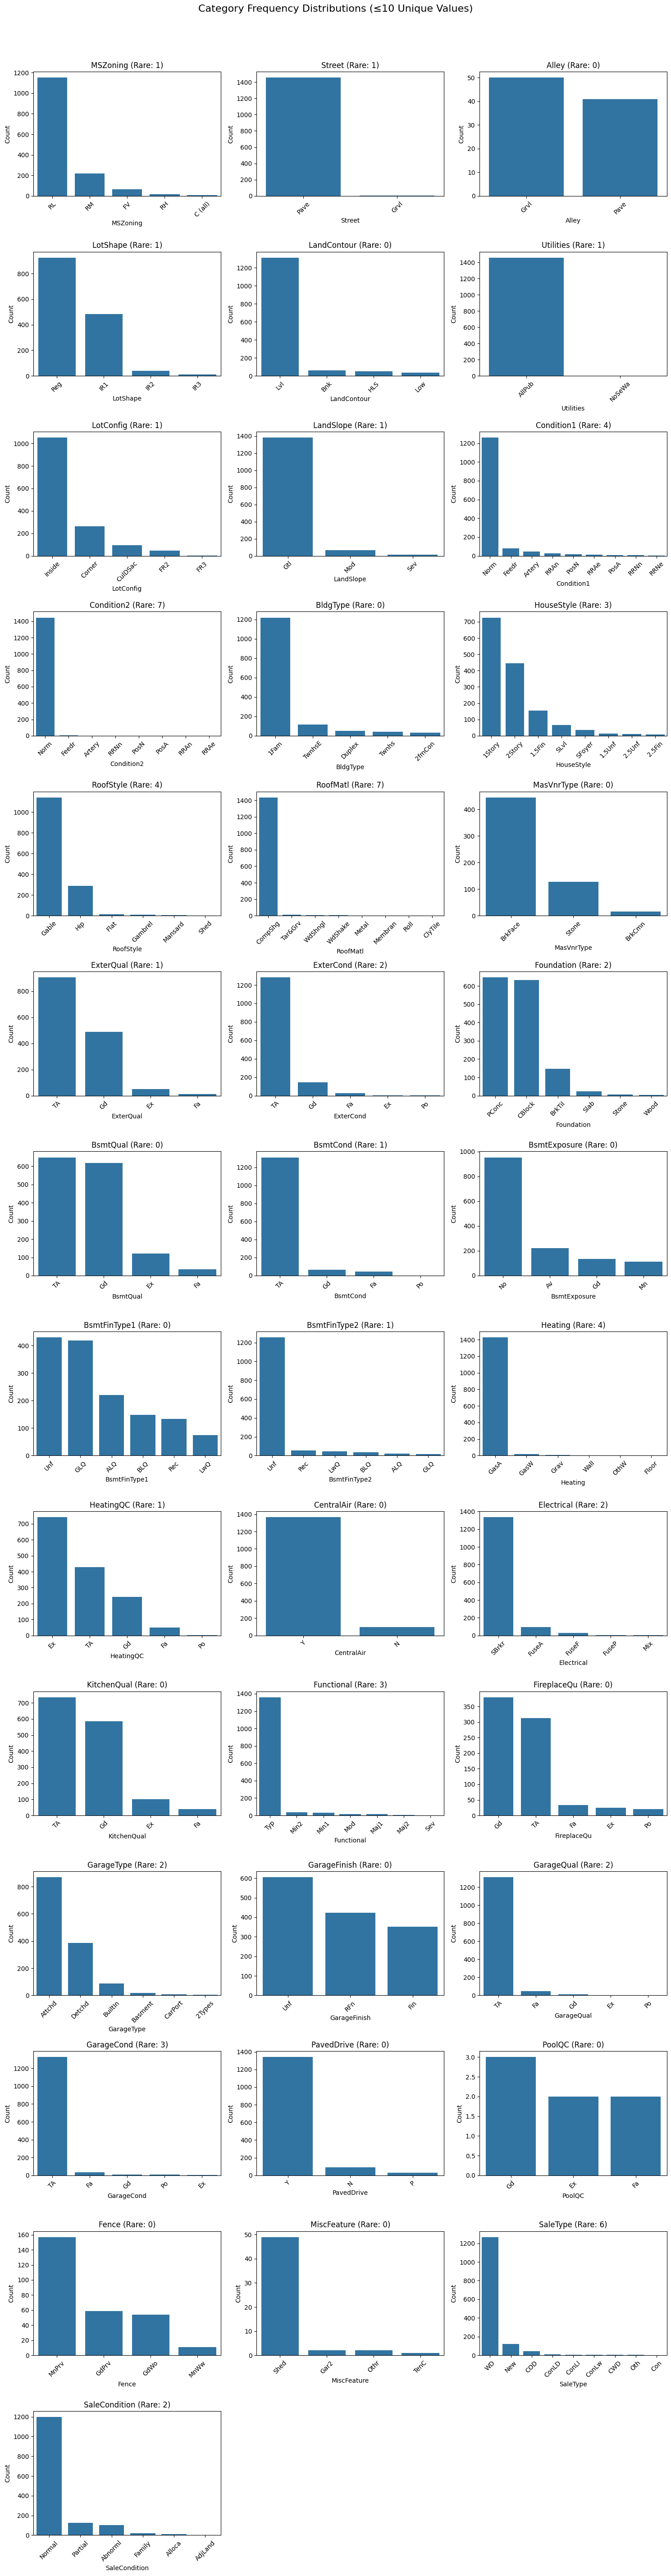

🔎 Rare category levels (<1% of rows) by feature:
MSZoning: ['C (all)']
Street: ['Grvl']
LotShape: ['IR3']
Utilities: ['NoSeWa']
LotConfig: ['FR3']
LandSlope: ['Sev']
Condition1: ['RRAe', 'PosA', 'RRNn', 'RRNe']
Condition2: ['Feedr', 'Artery', 'RRNn', 'PosN', 'PosA', 'RRAn', 'RRAe']
HouseStyle: ['1.5Unf', '2.5Unf', '2.5Fin']
RoofStyle: ['Flat', 'Gambrel', 'Mansard', 'Shed']
RoofMatl: ['Tar&Grv', 'WdShngl', 'WdShake', 'Metal', 'Membran', 'Roll', 'ClyTile']
ExterQual: ['Fa']
ExterCond: ['Ex', 'Po']
Foundation: ['Stone', 'Wood']
BsmtCond: ['Po']
BsmtFinType2: ['GLQ']
Heating: ['Grav', 'Wall', 'OthW', 'Floor']
HeatingQC: ['Po']
Electrical: ['FuseP', 'Mix']
Functional: ['Maj1', 'Maj2', 'Sev']
GarageType: ['CarPort', '2Types']
GarageQual: ['Ex', 'Po']
GarageCond: ['Gd', 'Po', 'Ex']
SaleType: ['ConLD', 'ConLI', 'ConLw', 'CWD', 'Oth', 'Con']
SaleCondition: ['Alloca', 'AdjLand']


In [96]:
# Filter categorical features with ≤10 unique categories
low_card_cats = [col for col in categorical_cols if df_train[col].nunique() <= 10]

print(f"📊 Plotting frequency distributions for {len(low_card_cats)} categorical features with ≤10 unique values.")

# Rare threshold
rare_thresh = 0.01  # 1%

# Dictionary to store rare levels by feature
rare_levels_by_feature = {}

# Grid setup: 3 plots per row
n_cols = 3
n_rows = math.ceil(len(low_card_cats) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(low_card_cats):
    value_counts = df_train[col].value_counts(normalize=True)
    order = value_counts.index
    rare_levels = value_counts[value_counts < rare_thresh].index.tolist()
    
    # Store for later use
    if rare_levels:
        rare_levels_by_feature[col] = rare_levels
    
    # Plot
    sns.countplot(data=df_train, x=col, order=order, ax=axes[i])
    axes[i].set_title(f"{col} (Rare: {len(rare_levels)})")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=45)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("Category Frequency Distributions (≤10 Unique Values)", fontsize=16, y=1.02)
plt.show()

# Print rare level summary
print("🔎 Rare category levels (<1% of rows) by feature:")
for col, rares in rare_levels_by_feature.items():
    print(f"{col}: {rares}")


#### 3.6.3 Explore Relationship between Categorical Features and Sales Price

📈 Plotting SalePrice boxplots for 40 categorical features with ≤10 unique values.


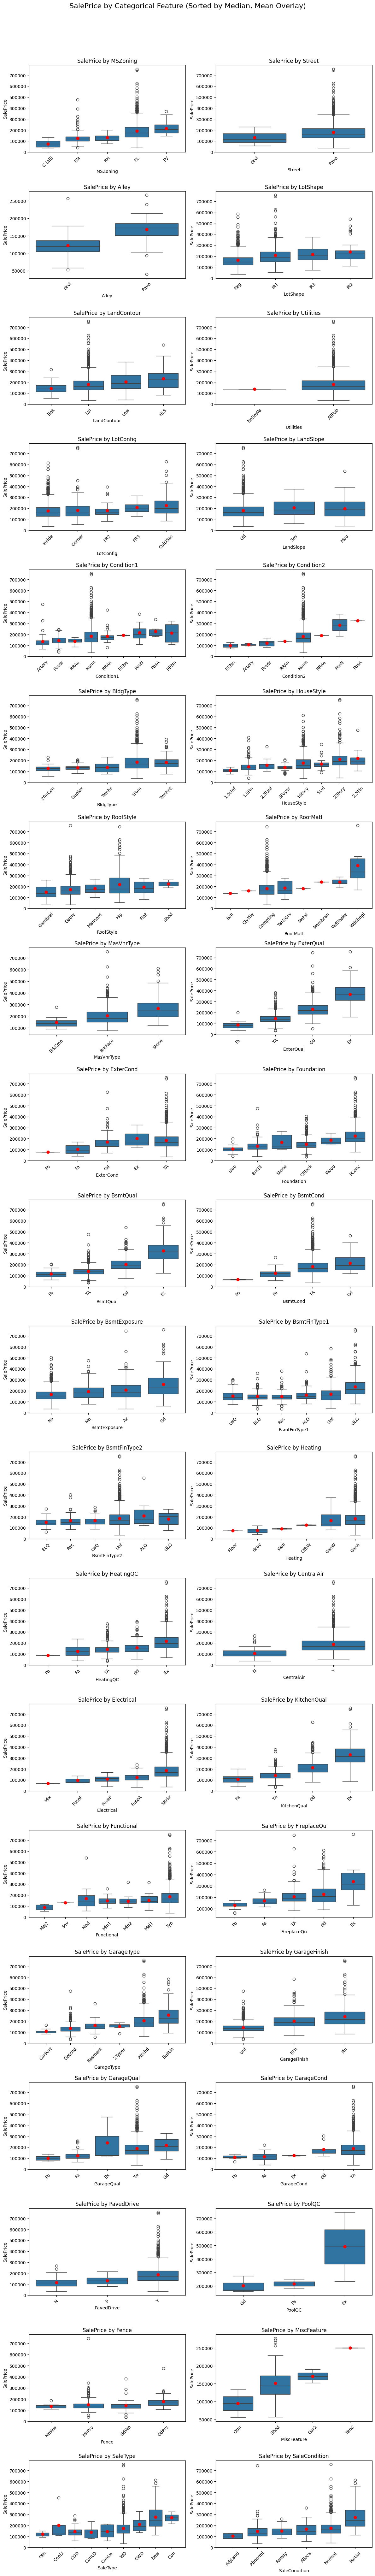

In [100]:
# Print boxplots of SalePrice by categorical features with ≤10 unique values
print(f"📈 Plotting SalePrice boxplots for {len(low_card_cats)} categorical features with ≤10 unique values.")

# Grid setup
n_cols = 2
n_rows = math.ceil(len(low_card_cats) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 4))
axes = axes.flatten()

# Boxplots with enhancements
for i, col in enumerate(low_card_cats):
    ax = axes[i]

    # Sort categories by median SalePrice
    median_order = df_train.groupby(col)['SalePrice'].median().sort_values().index

    # Draw boxplot
    sns.boxplot(data=df_train, x=col, y='SalePrice', ax=ax, order=median_order)

    # Overlay red dot for mean SalePrice
    category_means = df_train.groupby(col)['SalePrice'].mean().loc[median_order]
    for tick, mean in enumerate(category_means):
        ax.scatter(tick, mean, color='red', s=40, zorder=3)

    # Style
    ax.set_title(f"SalePrice by {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("SalePrice")
    ax.tick_params(axis='x', rotation=45)

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("SalePrice by Categorical Feature (Sorted by Median, Mean Overlay)", fontsize=16, y=1.02)
plt.show()


#### 3.6.4 Identify Highly Correlated Categorical Features

In [105]:
# Function to compute correlation ratio (η²) for categorical vs. numeric
def correlation_ratio(categories, values):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat) + 1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)

    for i in range(cat_num):
        cat_values = values[fcat == i]
        n_array[i] = len(cat_values)
        y_avg_array[i] = np.mean(cat_values)

    y_total_avg = np.sum(y_avg_array * n_array) / np.sum(n_array)
    numerator = np.sum(n_array * (y_avg_array - y_total_avg) ** 2)
    denominator = np.sum((values - y_total_avg) ** 2)
    return numerator / denominator if denominator != 0 else 0

# Compute η² for all categorical features
cat_correlations = {}

for col in categorical_cols:
    try:
        ratio = correlation_ratio(df_train[col], df_train['SalePrice'])
        cat_correlations[col] = ratio
    except:
        pass  # skip features with all NaNs or invalid values

# Convert to Series, sort, and display
cat_corr_series = pd.Series(cat_correlations).sort_values(ascending=False)

print("🏠 Categorical Features Most Correlated with SalePrice (via η²):")
display(cat_corr_series.to_frame(name='Correlation Ratio (η²)').style.background_gradient(cmap='YlOrRd'))

# Store full and filtered results for later use
cat_corr_df = pd.DataFrame({
    'Feature': cat_corr_series.index,
    'Eta_Squared': cat_corr_series.values
}).reset_index(drop=True)

cat_corr_strong = cat_corr_df[cat_corr_df['Eta_Squared'] > 0.1]
important_categorical_features = cat_corr_strong['Feature'].tolist()

print("📦 Stored highly correlated categorical features for later preprocessing:")
display(cat_corr_strong)

🏠 Categorical Features Most Correlated with SalePrice (via η²):


📦 Stored highly correlated categorical features for later preprocessing:


Feature  Eta_Squared
0    Neighborhood     0.545575
1       ExterQual     0.477388
2     KitchenQual     0.456599
3        BsmtQual     0.441369
4      Foundation     0.256368
5    GarageFinish     0.248964
6       HeatingQC     0.195500
7      GarageType     0.192481
8    BsmtFinType1     0.187340
9     Exterior2nd     0.153830
10    Exterior1st     0.152773
11       SaleType     0.137287
12  SaleCondition     0.135497
13   BsmtExposure     0.126855
14       MSZoning     0.107560

### 3.7 Explore Engineered Boolean Features

#### 3.7.1 Identify Binary Categorical Variables

In [116]:
# Identify binary categorical features (2 unique values)
binary_cats = [col for col in categorical_cols if df_train[col].nunique(dropna=True) == 2]
print(f"✅ Binary categorical features: {binary_cats}")

# Engineer Boolean versions of these features for analysis
for col in binary_cats:
    val1, val2 = df_train[col].dropna().unique()
    new_col = f"Is_{col}_{val1}"
    df_train[new_col] = df_train[col] == val1


✅ Binary categorical features: ['Street', 'Alley', 'Utilities', 'CentralAir']


#### 3.7.2 Engineer Candidates for Boolean Features

In [122]:
# Candidate engineered Booleans (these will be formalized later)
df_train['HasBasement'] = df_train['BsmtQual'].notna()
df_train['Has2ndFlr'] = df_train['2ndFlrSF'] > 0
df_train['HasGarage'] = df_train['GarageType'].notna()
df_train['HasDeck'] = df_train['WoodDeckSF'] > 0
df_train['HasOpenPorch'] = df_train['OpenPorchSF'] > 0
df_train['HasEnclosedPorch'] = df_train['EnclosedPorch'] > 0
df_train['Has3SsnPorch'] = df_train['3SsnPorch'] > 0
df_train['HasScreenPorch'] = df_train['ScreenPorch'] > 0
df_train['HasPool'] = df_train['PoolArea'] > 0

# Display engineered Boolean features
engineered_bool_features = [
    'HasBasement', 'Has2ndFlr', 'HasGarage', 'HasDeck',
    'HasOpenPorch', 'HasEnclosedPorch', 'Has3SsnPorch',
    'HasScreenPorch', 'HasPool'
]

#Display the DataFrame with engineered Boolean features
display(df_train[engineered_bool_features + ['SalePrice']].head())

HasBasement  Has2ndFlr  HasGarage  HasDeck  HasOpenPorch  HasEnclosedPorch  \
0         True       True       True    False          True             False   
1         True      False       True     True         False             False   
2         True       True       True    False          True             False   
3         True       True       True    False          True              True   
4         True       True       True     True          True             False   

   Has3SsnPorch  HasScreenPorch  HasPool  SalePrice  
0         False           False    False     208500  
1         False           False    False     181500  
2         False           False    False     223500  
3         False           False    False     140000  
4         False           False    False     250000

#### 3.7.3 Summarize Distributions of Engineered Booleans

In [124]:
# Summarize distributions of engineered Boolean features only
bool_summary = pd.DataFrame({
    'True Count': df_train[engineered_bool_features].sum(),
    'False Count': (~df_train[engineered_bool_features]).sum(),
    'True %': df_train[engineered_bool_features].mean() * 100
}).sort_values(by='True %', ascending=False)

display(bool_summary.style.background_gradient(cmap='Purples'))

#### 3.7.4 Identify Relationships Between Categorical Features and SalePrice

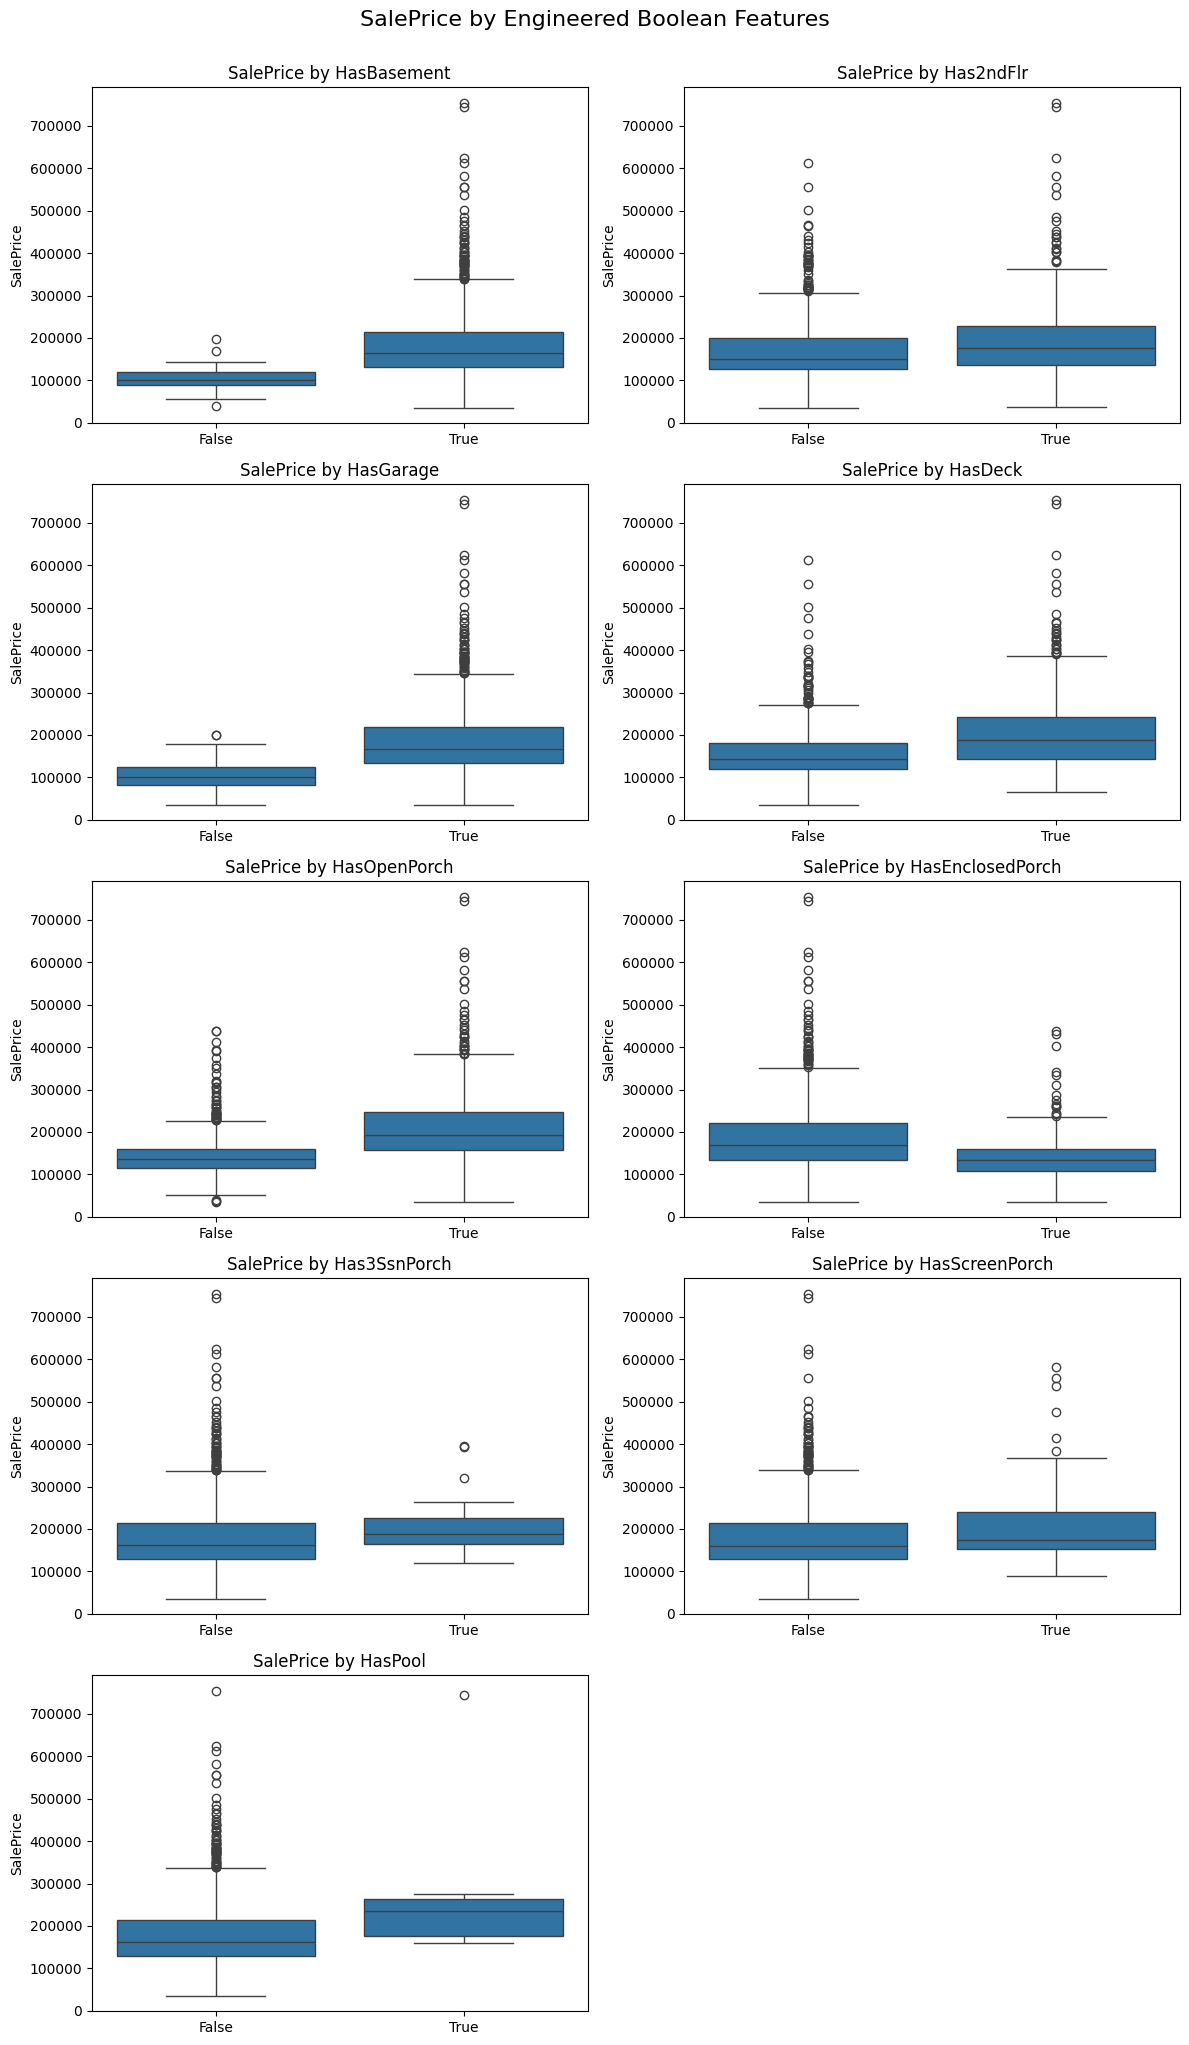

In [129]:
# Grid layout: 2 columns, dynamic number of rows
n_cols = 2
n_rows = math.ceil(len(engineered_bool_features) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 4))
axes = axes.flatten()

# Create boxplots
for i, col in enumerate(engineered_bool_features):
    sns.boxplot(data=df_train, x=col, y='SalePrice', ax=axes[i])
    axes[i].set_title(f"SalePrice by {col}")
    axes[i].set_xlabel('')
    axes[i].set_ylabel('SalePrice')

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("SalePrice by Engineered Boolean Features", fontsize=16, y=1.02)
plt.show()


#### 3.7.5 Engineered Booleans Correlation with SalePrice

In [128]:
# Compute Pearson correlation between engineered Booleans and SalePrice
bool_encoded = df_train[engineered_bool_features].astype(int)
bool_corr = bool_encoded.corrwith(df_train['SalePrice']).sort_values(key=abs, ascending=False)

# Display correlations
display(bool_corr.to_frame(name='Correlation').style.background_gradient(cmap='vlag'))

# Identify strongly correlated engineered features
strong_engineered_bools = bool_corr[bool_corr.abs() > 0.1].index.tolist()
print("📦 Strong Engineered Booleans (|r| > 0.1):")
print(strong_engineered_bools)

# --- 2. ANOVA F-test ---
from scipy.stats import f_oneway

anova_results = {}

for col in engineered_bool_features:
    group1 = df_train[df_train[col]]['SalePrice']
    group2 = df_train[~df_train[col]]['SalePrice']
    
    if len(group1) > 0 and len(group2) > 0:
        f_stat, p_val = f_oneway(group1, group2)
        anova_results[col] = p_val

anova_series = pd.Series(anova_results).sort_values()

print("\n📊 ANOVA p-values (lower = stronger evidence of difference):")
display(anova_series.to_frame(name='ANOVA p-value').style.background_gradient(cmap='YlOrRd_r'))

# --- 3. Mutual Information ---
from sklearn.feature_selection import mutual_info_regression

mi_scores = mutual_info_regression(bool_encoded, df_train['SalePrice'], discrete_features=True, random_state=42)
mi_series = pd.Series(mi_scores, index=engineered_bool_features).sort_values(ascending=False)

print("\n🧠 Mutual Information Scores:")
display(mi_series.to_frame(name='MI Score').style.background_gradient(cmap='YlGn'))




📦 Strong Engineered Booleans (|r| > 0.1):
['HasOpenPorch', 'HasDeck', 'HasGarage', 'HasEnclosedPorch', 'HasBasement', 'Has2ndFlr']

📊 ANOVA p-values (lower = stronger evidence of difference):



🧠 Mutual Information Scores:


#### 3.7.6 Final Selection of Engineered Boolean Features

In [130]:
# --- Define thresholds ---
corr_thresh = 0.1              # Pearson correlation (absolute)
anova_p_thresh = 0.05          # ANOVA p-value
mi_thresh = 0.01               # Mutual information score

# --- Normalize index names just in case ---
anova_series.index = anova_series.index.astype(str)
mi_series.index = mi_series.index.astype(str)
bool_corr.index = bool_corr.index.astype(str)

# --- Filter each set ---
strong_corr = bool_corr[bool_corr.abs() > corr_thresh].index
strong_anova = anova_series[anova_series < anova_p_thresh].index
strong_mi = mi_series[mi_series > mi_thresh].index

# --- Intersection (features that pass ALL 3 criteria) ---
engineered_bool_corr_strong = list(set(strong_corr) & set(strong_anova) & set(strong_mi))

# --- Output results ---
print("✅ Numerically Selected Engineered Boolean Features (pass all 3 thresholds):")
print(engineered_bool_corr_strong)


✅ Numerically Selected Engineered Boolean Features (pass all 3 thresholds):
['HasDeck', 'HasBasement', 'HasEnclosedPorch', 'HasOpenPorch', 'HasGarage', 'Has2ndFlr']


### 3.8 Explore Relationships Between Highly Correlated Identified Features

#### 3.8.1 Correlation Between Identified Numerical and Boolean

/Users/kevingoldberg/Documents/Personal Projects/Housing/.venv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:3063: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/kevingoldberg/Documents/Personal Projects/Housing/.venv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:3064: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/var/folders/f4/d6y08yk57kb4mrdshdg8c8bc0000gn/T/ipykernel_8230/776115128.py:16: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/kevingoldberg/Documents/Personal Projects/Housing/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


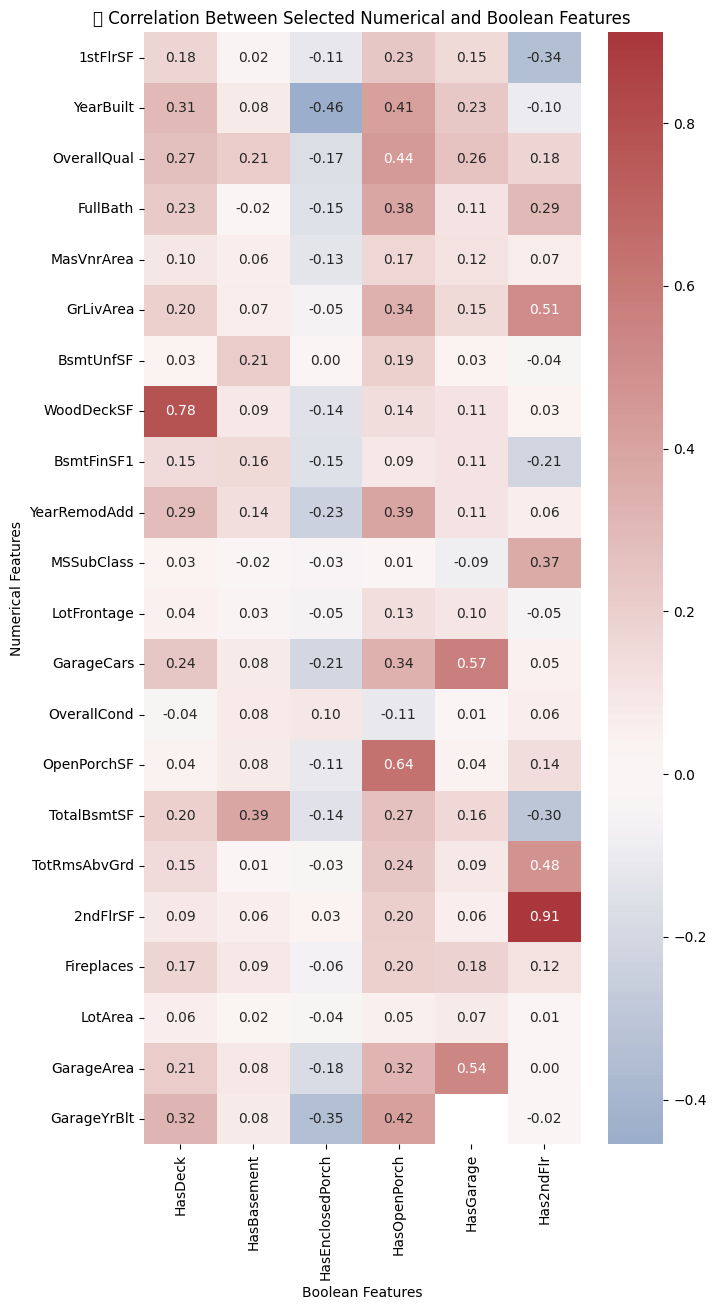

In [138]:
# Convert engineered Booleans to 0/1
bool_encoded = df_train[engineered_bool_corr_strong].astype(int)

# Compute correlation: numerical (rows) vs Boolean (columns)
numeric_bool_corr = pd.DataFrame(
    {bool_col: df_train[num_corr_strong].corrwith(bool_encoded[bool_col])
     for bool_col in engineered_bool_corr_strong}
)

# Heatmap
plt.figure(figsize=(1.2 * len(engineered_bool_corr_strong), 0.6 * len(num_corr_strong)))
sns.heatmap(numeric_bool_corr, annot=True, fmt=".2f", cmap='vlag', center=0)
plt.title("📊 Correlation Between Selected Numerical and Boolean Features")
plt.xlabel("Boolean Features")
plt.ylabel("Numerical Features")
plt.tight_layout()
plt.show()


#### 3.8.2 Correlation Between Selected Categorical and Numerical Features

/var/folders/f4/d6y08yk57kb4mrdshdg8c8bc0000gn/T/ipykernel_8230/2138254242.py:38: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/kevingoldberg/Documents/Personal Projects/Housing/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


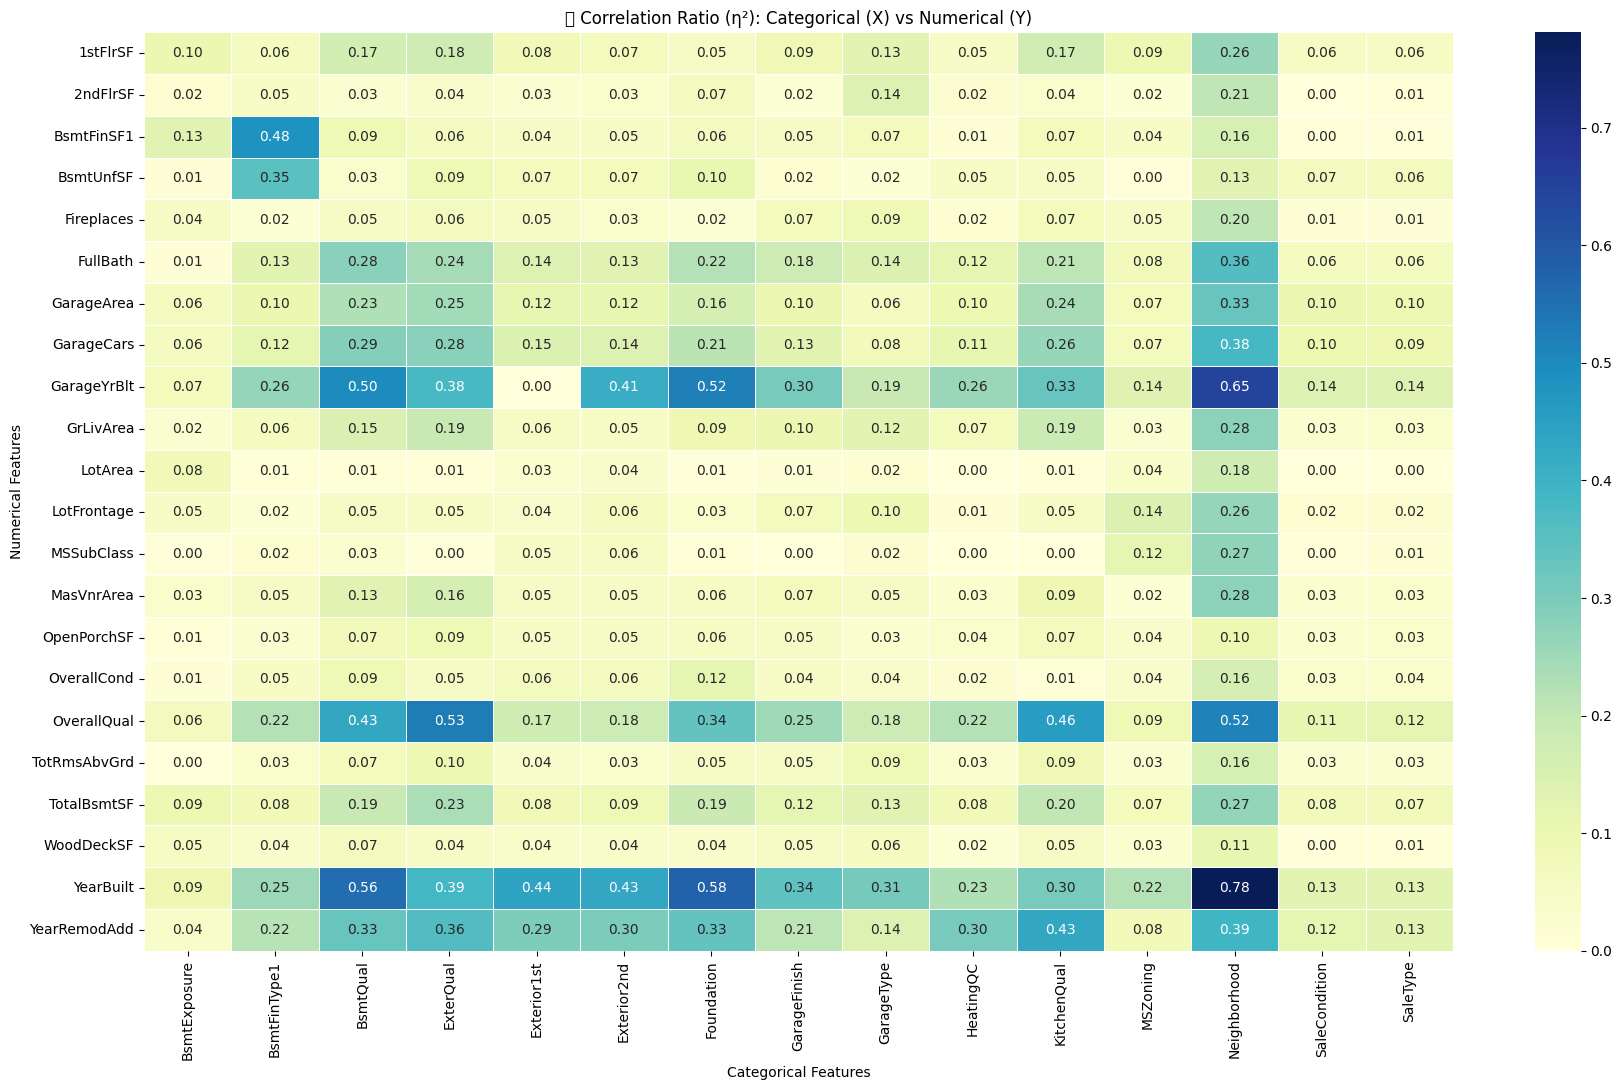

In [140]:
# Reuse the correlation_ratio function (if not already defined)
def correlation_ratio(categories, values):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat) + 1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)

    for i in range(cat_num):
        cat_values = values[fcat == i]
        n_array[i] = len(cat_values)
        y_avg_array[i] = np.mean(cat_values)

    y_total_avg = np.sum(y_avg_array * n_array) / np.sum(n_array)
    numerator = np.sum(n_array * (y_avg_array - y_total_avg) ** 2)
    denominator = np.sum((values - y_total_avg) ** 2)
    return numerator / denominator if denominator != 0 else 0

# Compute correlation ratio η² between selected categorical and numerical features
cat_num_corr = {}

for cat in important_categorical_features:
    for num in num_corr_strong:
        try:
            eta_sq = correlation_ratio(df_train[cat], df_train[num])
            cat_num_corr[(cat, num)] = eta_sq
        except:
            pass  # skip if invalid

# Pivot the results to a matrix (Categorical rows x Numerical columns)
cat_num_matrix = pd.Series(cat_num_corr).unstack().fillna(0)

# Plot the heatmap
plt.figure(figsize=(1.2 * len(important_categorical_features), 0.5 * len(num_corr_strong)))
sns.heatmap(cat_num_matrix.T, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5)
plt.title("📊 Correlation Ratio (η²): Categorical (X) vs Numerical (Y)")
plt.xlabel("Categorical Features")
plt.ylabel("Numerical Features")
plt.tight_layout()
plt.show()



#### 3.8.3 Correlation Between Categorical and Boolean Features

# Predicting Housing Prices Project

## Project Outline
### 0. Problem Definition  
### 1. Import Libraries
### 2. Data Import  
### 3. Data Exploration (EDA)  
### 4. Data Cleaning & Preprocessing  
### 5. Modeling  
### 6. Evaluation  
### 7. Deployment  
### 8. Documentation & Reporting  
### 9. Conclusion & Future Work  

# 1. Import Libraries

In [ ]:
# Data and Processing
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.stats import skew, kurtosis, pearsonr
import math

# PyTorch
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

# 2. Data Import

In [ ]:
train_path = '/Users/kevingoldberg/Documents/Personal Projects/Housing/house-prices-advanced-regression-techniques/train.csv'
test_path = '/Users/kevingoldberg/Documents/Personal Projects/Housing/house-prices-advanced-regression-techniques/test.csv'
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

# 3. Data Exploration

### 3.1 Preview the Data

In [ ]:
display(df_train.head())
display(df_test.head())
print(df_train.shape, df_test.shape)
print(df_train.columns)
df_train.info()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

(1460, 81) (1459, 80)
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'Ga

### 3.2 Understand Data Types

In [ ]:
df_features = df_train.drop(columns=['SalePrice','Id'])  # drop the target
df_target = df_train['SalePrice']
display(df_features.dtypes.to_frame(name='Data Type'))
display(df_features.dtypes.value_counts())

# Separate features by Type
numeric_cols = df_features.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df_features.select_dtypes(include='object').columns.tolist()
bool_cols = df_features.select_dtypes(include='bool').columns.tolist()

# Display the number of unique values in each feature
df_features.nunique().sort_values()


Data Type
MSSubClass        int64
MSZoning         object
LotFrontage     float64
LotArea           int64
Street           object
...                 ...
MiscVal           int64
MoSold            int64
YrSold            int64
SaleType         object
SaleCondition    object

[79 rows x 1 columns]

object     43
int64      33
float64     3
Name: count, dtype: int64

CentralAir         2
Street             2
Alley              2
Utilities          2
GarageFinish       3
                ... 
TotalBsmtSF      721
1stFlrSF         753
BsmtUnfSF        780
GrLivArea        861
LotArea         1073
Length: 79, dtype: int64

### 3.3 Identify Missing Values

Missing Count  Missing %
PoolQC                 1453  99.520548
MiscFeature            1406  96.301370
Alley                  1369  93.767123
Fence                  1179  80.753425
MasVnrType              872  59.726027
FireplaceQu             690  47.260274
LotFrontage             259  17.739726
GarageType               81   5.547945
GarageYrBlt              81   5.547945
GarageFinish             81   5.547945
GarageQual               81   5.547945
GarageCond               81   5.547945
BsmtFinType2             38   2.602740
BsmtExposure             38   2.602740
BsmtFinType1             37   2.534247
BsmtCond                 37   2.534247
BsmtQual                 37   2.534247
MasVnrArea                8   0.547945
Electrical                1   0.068493

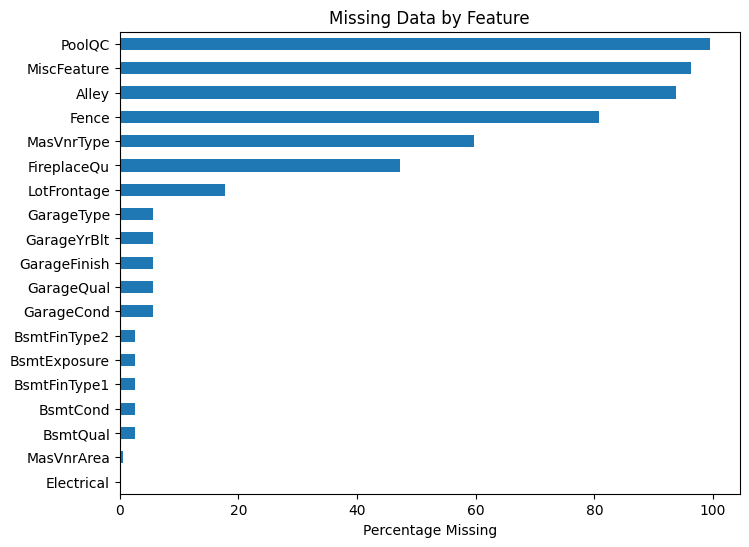

Missing in Numeric Columns:


LotFrontage    259
GarageYrBlt     81
MasVnrArea       8
dtype: int64

Missing in Categorical Columns:


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
GarageType        81
GarageCond        81
GarageQual        81
GarageFinish      81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtQual          37
BsmtCond          37
Electrical         1
dtype: int64

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1218          50       RM         52.0     6240   Pave   NaN      Reg   
533           20       RL         50.0     5000   Pave   NaN      Reg   
39            90       RL         65.0     6040   Pave   NaN      Reg   
1011          90       RL         75.0     9825   Pave   NaN      Reg   
1179          20       RL         77.0     8335   Pave   NaN      Reg   

     LandContour Utilities LotConfig  ... PoolQC Fence MiscFeature MiscVal  \
1218         Lvl    AllPub    Inside  ...    NaN   NaN         NaN       0   
533          Low    AllPub    Inside  ...    NaN   NaN         NaN       0   
39           Lvl    AllPub    Inside  ...    NaN   NaN         NaN       0   
1011         Lvl    AllPub    Inside  ...    NaN   NaN         NaN       0   
1179         Lvl    AllPub    Corner  ...    NaN   NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  missing_row_count  \
1218      7   2006        WD         Normal                 16   
533       1   2007        WD         Normal                 16   
39        6   2008        WD        AdjLand                 16   
1011      5   2010        WD         Normal                 16   
1179      4   2006        WD         Normal                 15   

      missing_row_percent  
1218            19.753086  
533             19.753086  
39              19.753086  
1011            19.753086  
1179            18.518519  

[5 rows x 81 columns]

In [ ]:
# Display missing values summary
missing_counts = df_features.isnull().sum()
missing_percent = df_features.isnull().mean() * 100
missing_summary = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing %': missing_percent
})
missing_summary = missing_summary[missing_summary['Missing Count'] > 0]\
                    .sort_values(by='Missing %', ascending=False)

display(missing_summary)

# Visualize missing values
missing_summary['Missing %'].plot(kind='barh', figsize=(8, 6))
plt.xlabel("Percentage Missing")
plt.title("Missing Data by Feature")
plt.gca().invert_yaxis()
plt.show()

missing_numeric = df_features[numeric_cols].isnull().sum().sort_values(ascending=False)
missing_categorical = df_features[categorical_cols].isnull().sum().sort_values(ascending=False)

print("Missing in Numeric Columns:")
display(missing_numeric[missing_numeric > 0])

print("Missing in Categorical Columns:")
display(missing_categorical[missing_categorical > 0])

# Display row counts for missing values
df_features['missing_row_count'] = df_features.isnull().sum(axis=1)
df_features['missing_row_percent'] = df_features.isnull().mean(axis=1) * 100
df_features.sort_values('missing_row_percent', ascending=False).head()


### 3.4 Explore Target Variable

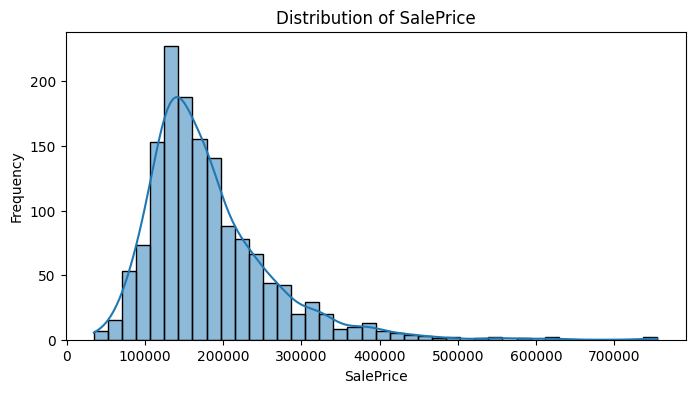

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Skewness: 1.88
Kurtosis: 6.51


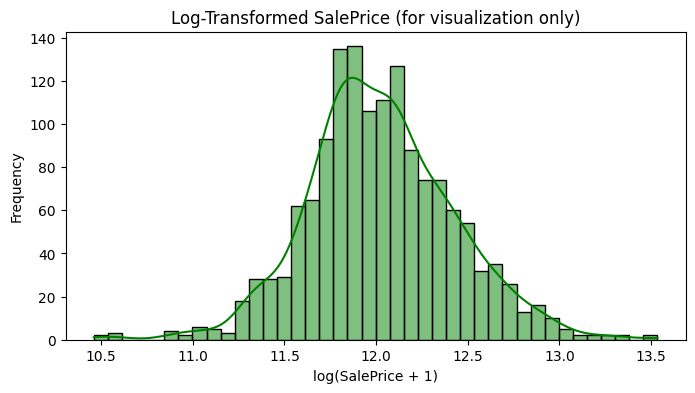

Log Skewness: 0.12
Log Kurtosis: 0.80


In [ ]:
# Distribution of SalePrice
plt.figure(figsize=(8, 4))
sns.histplot(df_target, kde=True, bins=40)
plt.title("Distribution of SalePrice")
plt.xlabel("SalePrice")
plt.ylabel("Frequency")
plt.show()

# Display SalePrice statistics
display(df_target.describe())

# Display skewness and kurtosis of SalePrice
print(f"Skewness: {skew(df_target):.2f}")
print(f"Kurtosis: {kurtosis(df_target):.2f}")

# Log transformation of SalePrice
plt.figure(figsize=(8, 4))
sns.histplot(np.log1p(df_target), kde=True, bins=40, color='green')
plt.title("Log-Transformed SalePrice (for visualization only)")
plt.xlabel("log(SalePrice + 1)")
plt.ylabel("Frequency")
plt.show()

# Compare skew/kurtosis
print(f"Log Skewness: {skew(np.log1p(df_target)):.2f}")
print(f"Log Kurtosis: {kurtosis(np.log1p(df_target)):.2f}")


### 3.5 Explore Numerical Features

#### 3.5.1 Overview of Numerical Feature's Distributions

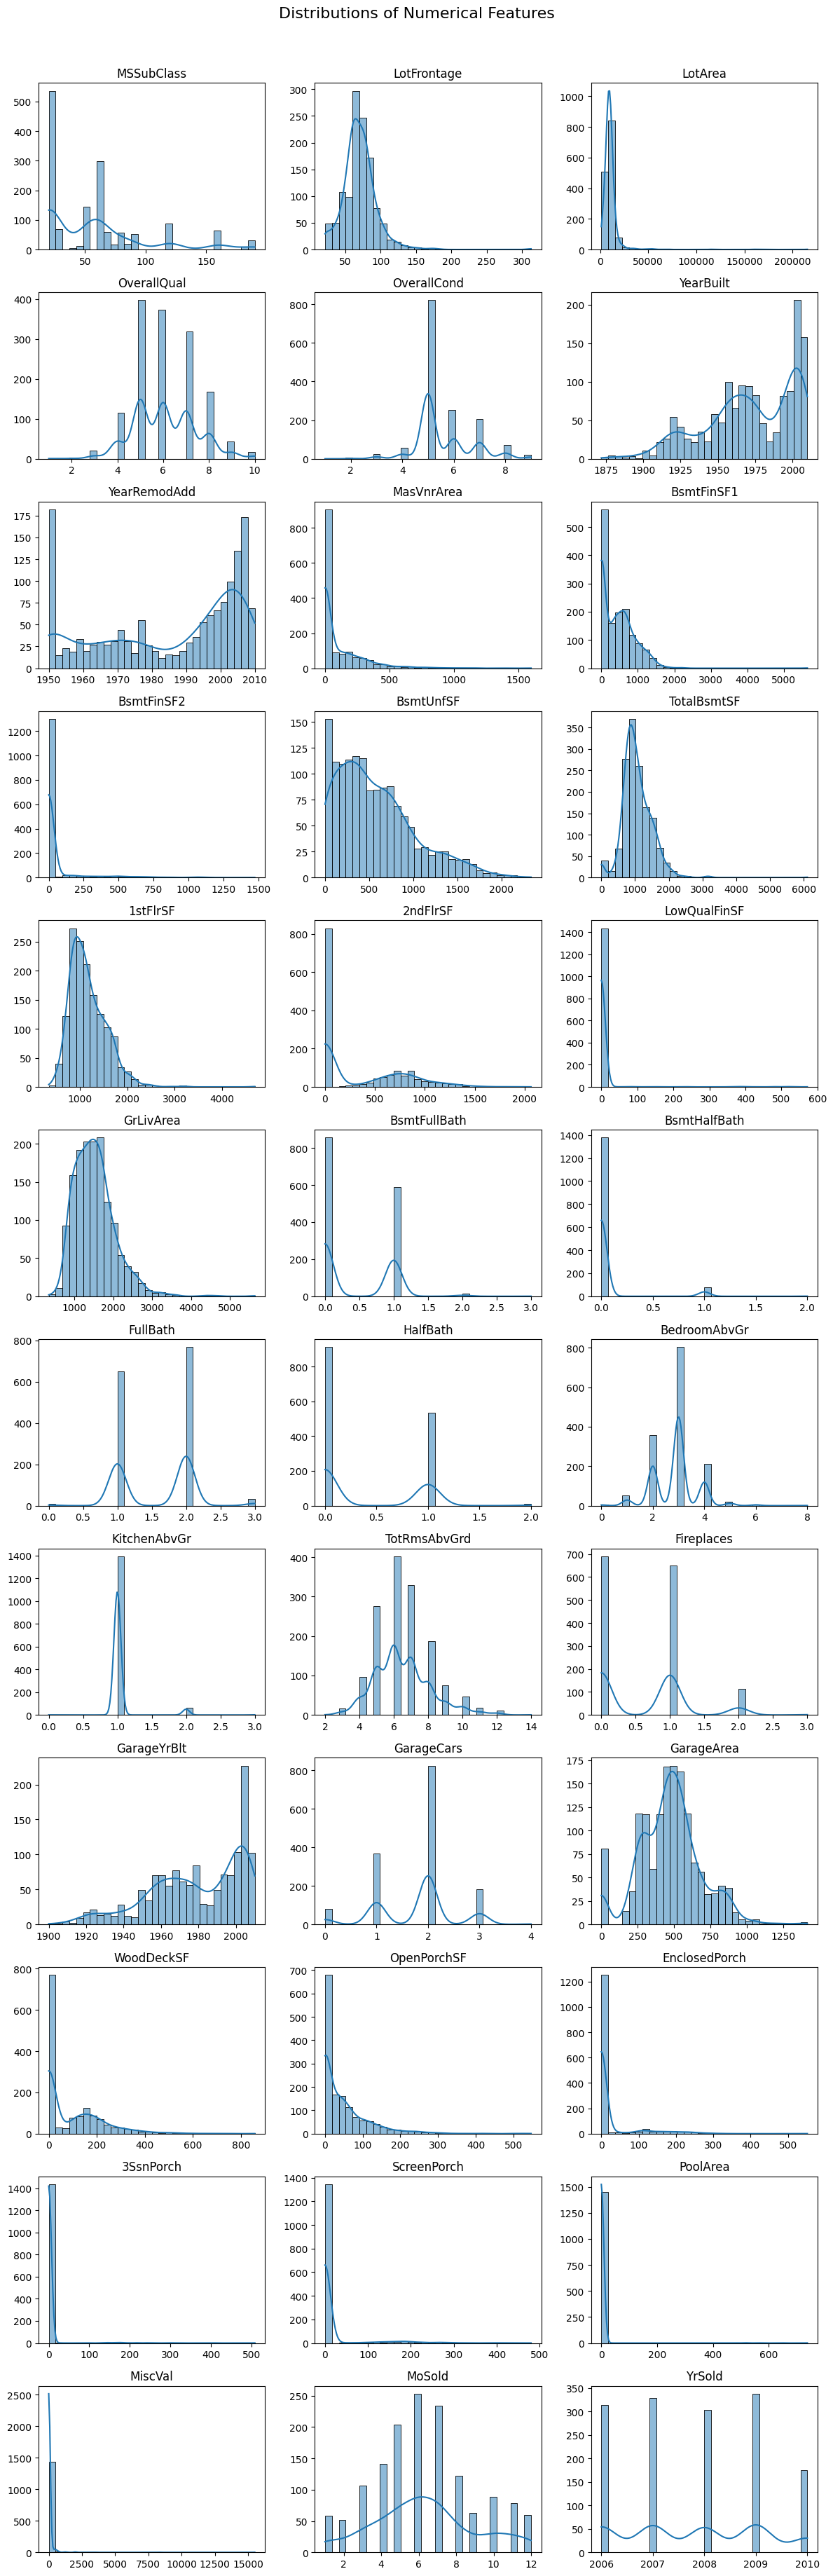

In [ ]:
# Basic statistics for numeric features
df_train[numeric_cols].describe().T.sort_values('std', ascending=False)

# Plot all numeric columns
# Set up number of columns and rows
num_features = len(numeric_cols)
cols = 3  # number of plots per row
rows = math.ceil(num_features / cols)

# Create figure and axes
fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 3))
axes = axes.flatten()

# Plot each numeric feature
for i, col in enumerate(numeric_cols):
    sns.histplot(df_train[col], kde=True, ax=axes[i], bins=30)
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Remove any unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Distributions of Numerical Features', fontsize=16, y=1.02)
plt.show()

#### 3.5.2 Analyze Skewness

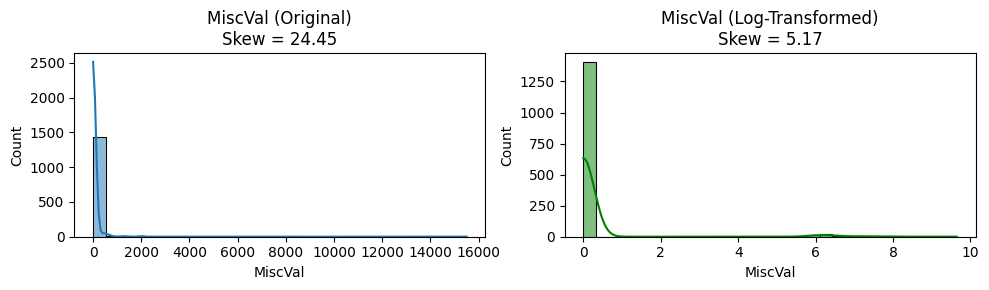

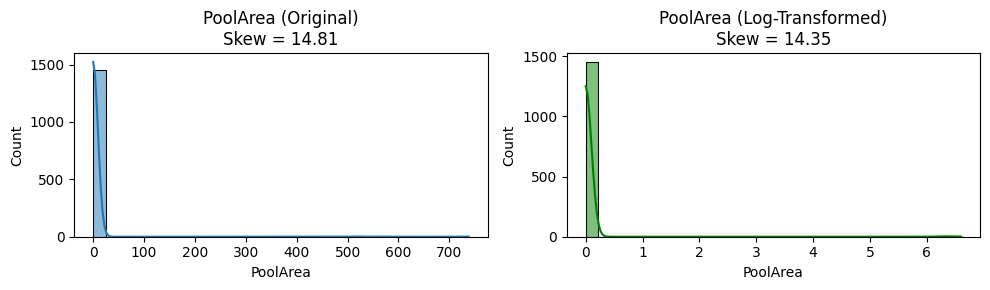

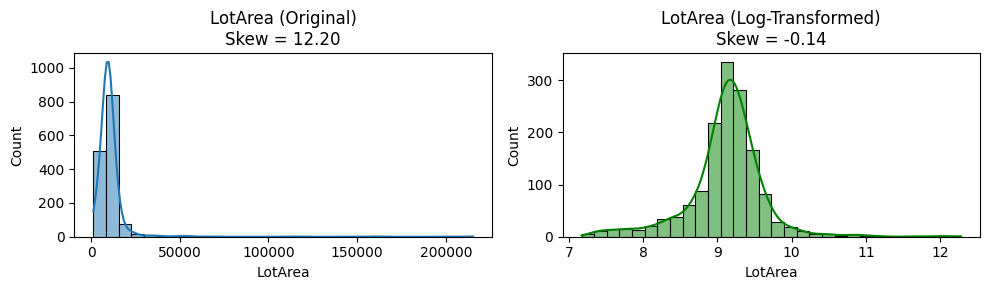

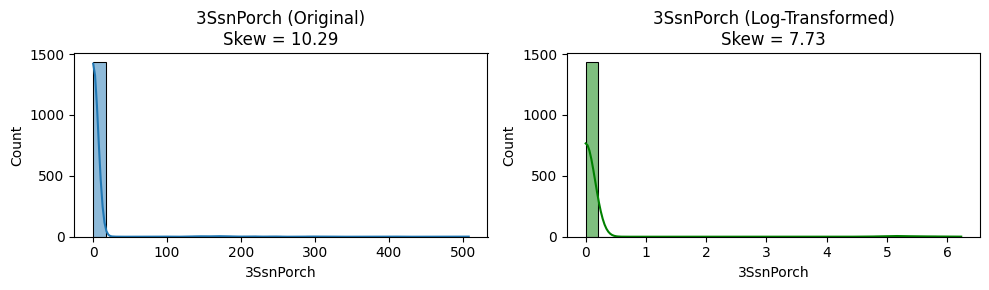

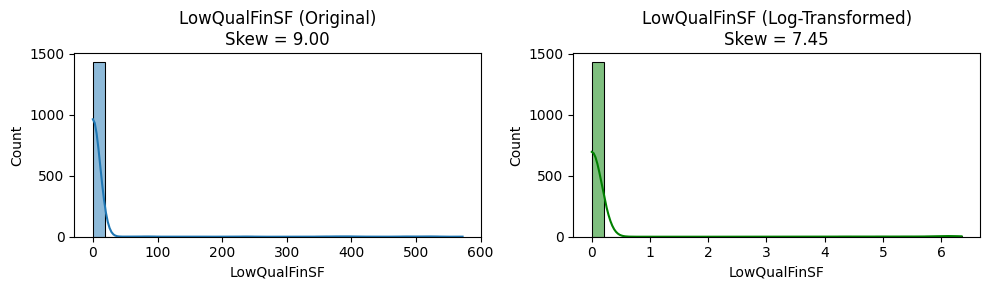

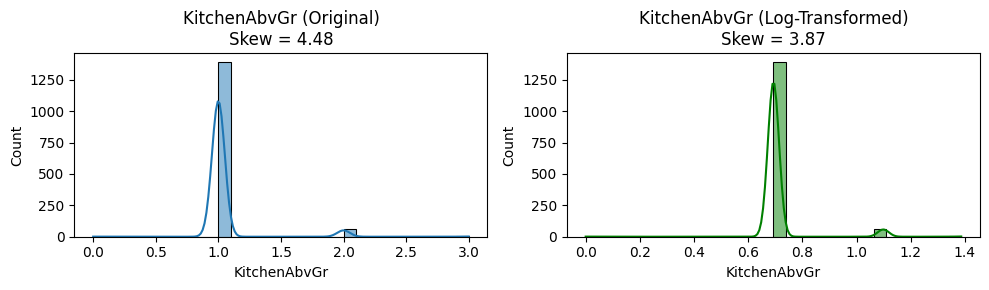

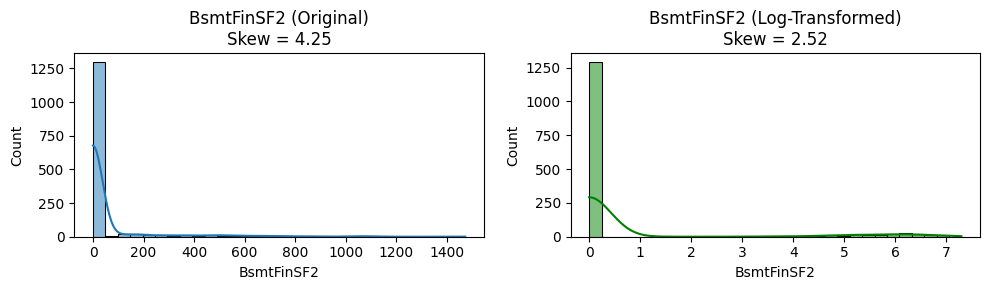

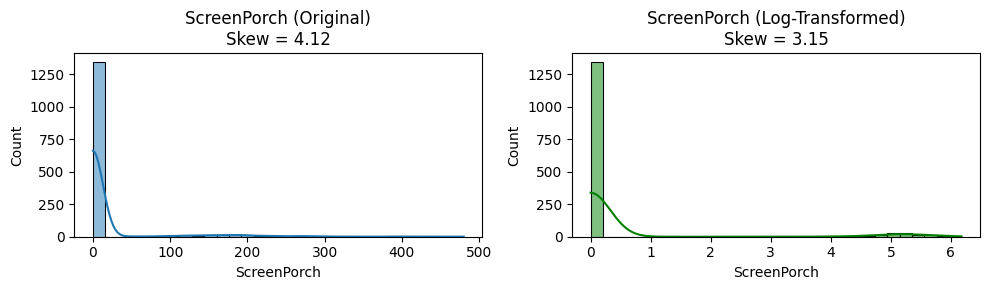

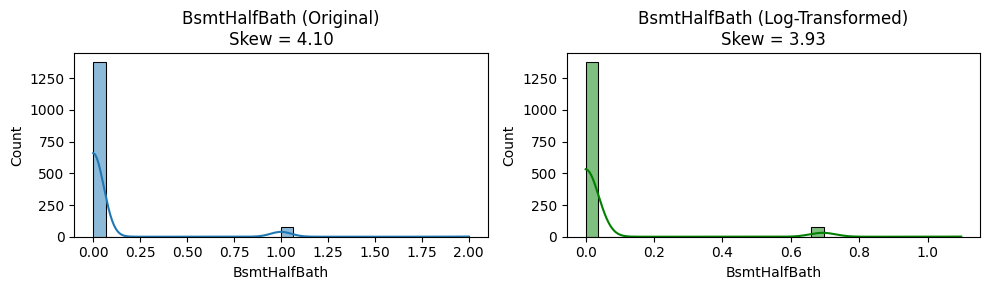

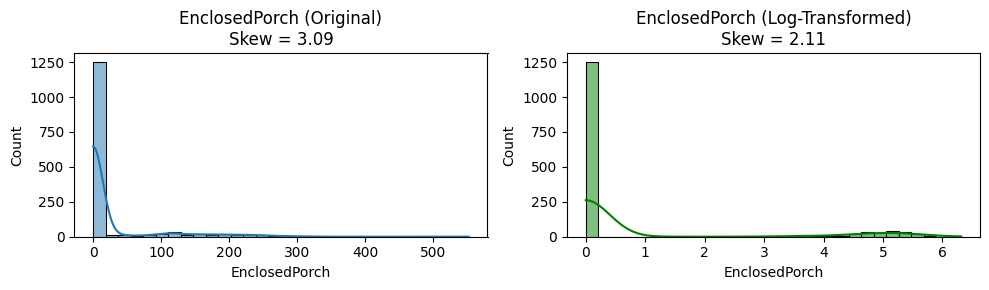

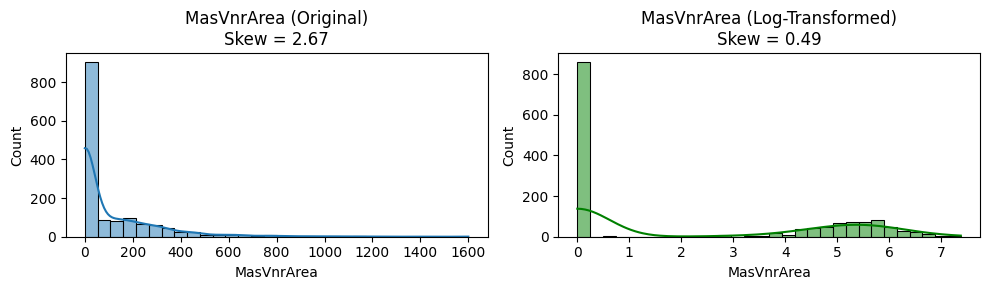

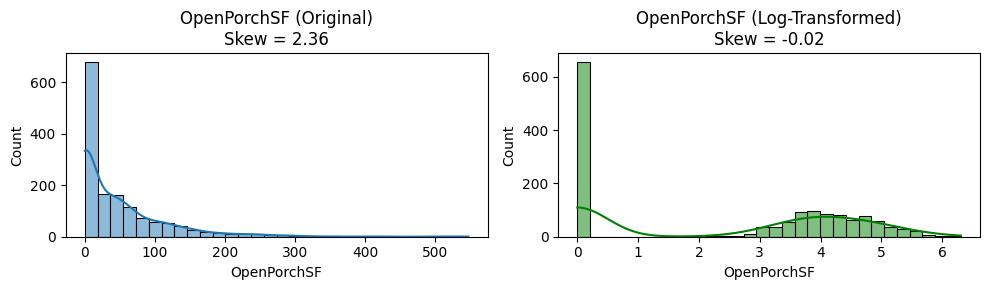

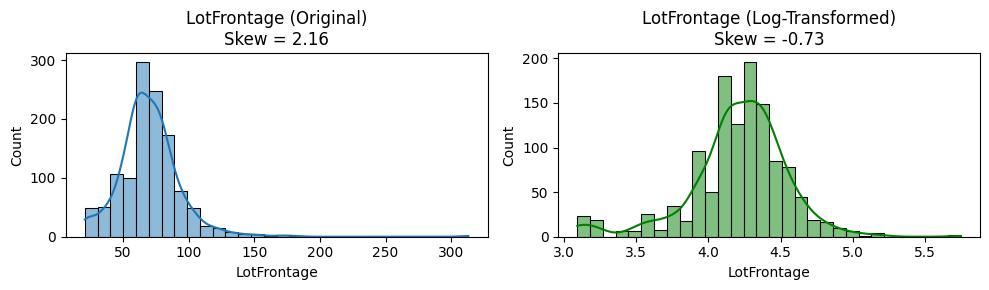

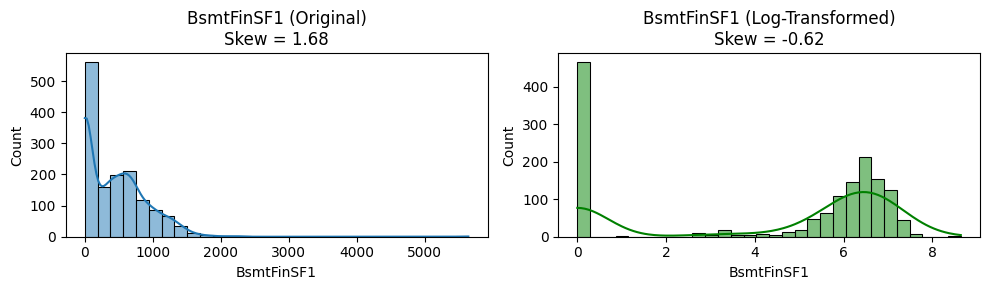

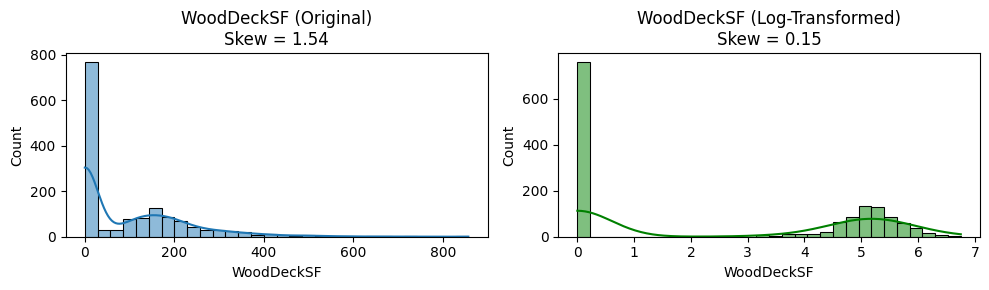

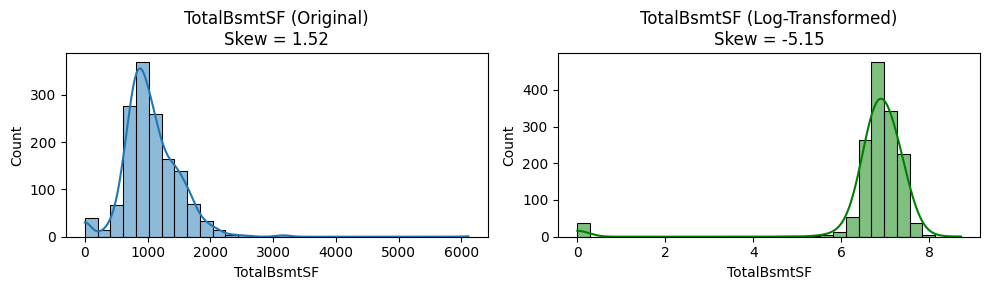

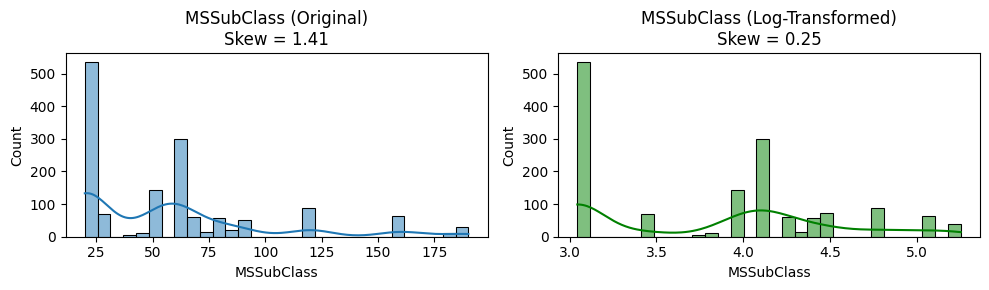

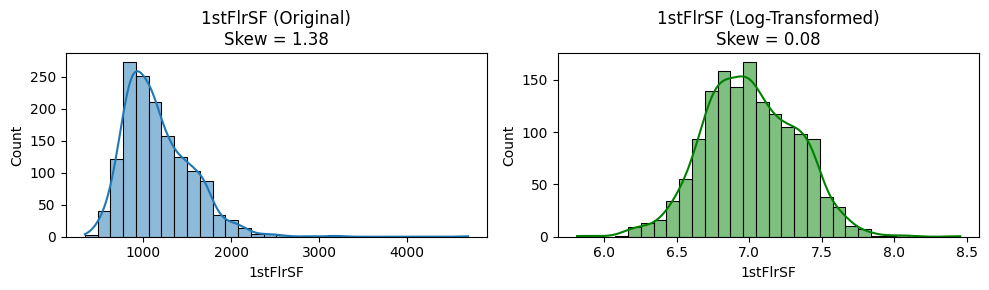

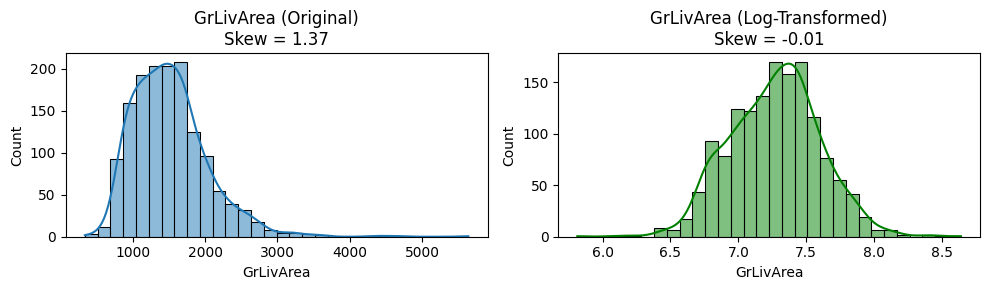

⚠️ Features with mostly zero values (excluded from log transform):


0          MiscVal
1         PoolArea
2        3SsnPorch
3     LowQualFinSF
4       BsmtFinSF2
5      ScreenPorch
6     BsmtHalfBath
7    EnclosedPorch
8       MasVnrArea
9       WoodDeckSF
Name: Mostly Zero Columns, dtype: object

✅ Features selected for log transformation based on skewness reduction:


0        LotArea
1    OpenPorchSF
2    LotFrontage
3     BsmtFinSF1
4     MSSubClass
5       1stFlrSF
6      GrLivArea
Name: Log Transform Features, dtype: object

In [ ]:
# Calculate skewness for all numeric columns
numeric_skew = df_train[numeric_cols].skew().sort_values(ascending=False)

# Display skewness table
display(numeric_skew.to_frame(name='Skewness').style.background_gradient(cmap='coolwarm'))

# Select highly skewed numeric columns
high_skew_cols = numeric_skew[abs(numeric_skew) > 1].index.tolist()

# Plot original vs. log-transformed distributions with skew annotations
for col in high_skew_cols:
    original = df_train[col].dropna()
    transformed = np.log1p(original)

    original_skew = skew(original)
    transformed_skew = skew(transformed)

    fig, axes = plt.subplots(1, 2, figsize=(10, 3))

    # Original
    sns.histplot(original, kde=True, ax=axes[0], bins=30)
    axes[0].set_title(f"{col} (Original)\nSkew = {original_skew:.2f}")

    # Log-transformed
    sns.histplot(transformed, kde=True, ax=axes[1], bins=30, color='green')
    axes[1].set_title(f"{col} (Log-Transformed)\nSkew = {transformed_skew:.2f}")

    plt.tight_layout()
    plt.show()

# Identify features with mostly zero values (e.g., >80% zeros)
sparse_zero_cols = []

for col in high_skew_cols:
    zero_ratio = (df_train[col] == 0).mean()
    if zero_ratio > 0.5: # Adjust threshold as needed
        sparse_zero_cols.append(col)

print("⚠️ Features with mostly zero values (excluded from log transform):")
display(pd.Series(sparse_zero_cols, name='Mostly Zero Columns'))

# Select features for log transformation based on meaningful skew reduction AND not mostly zero
log_transform_features = []

for col in high_skew_cols:
    if col in sparse_zero_cols:
        continue  # Skip sparse features

    original = df_train[col].dropna()

    if original.min() < 0:
        continue  # skip negative values

    transformed = np.log1p(original)
    original_skew = abs(skew(original))
    transformed_skew = abs(skew(transformed))

    if (transformed_skew < original_skew * 0.75) and (transformed_skew < 2):
        log_transform_features.append(col)

# Display final selected features for log transformation
print("✅ Features selected for log transformation based on skewness reduction:")
display(pd.Series(log_transform_features, name='Log Transform Features'))


#### 3.5.3 Explore Relationships Between Numerical Features and SalePrice

🔍 Numerical Features with |Correlation| > 0.3:


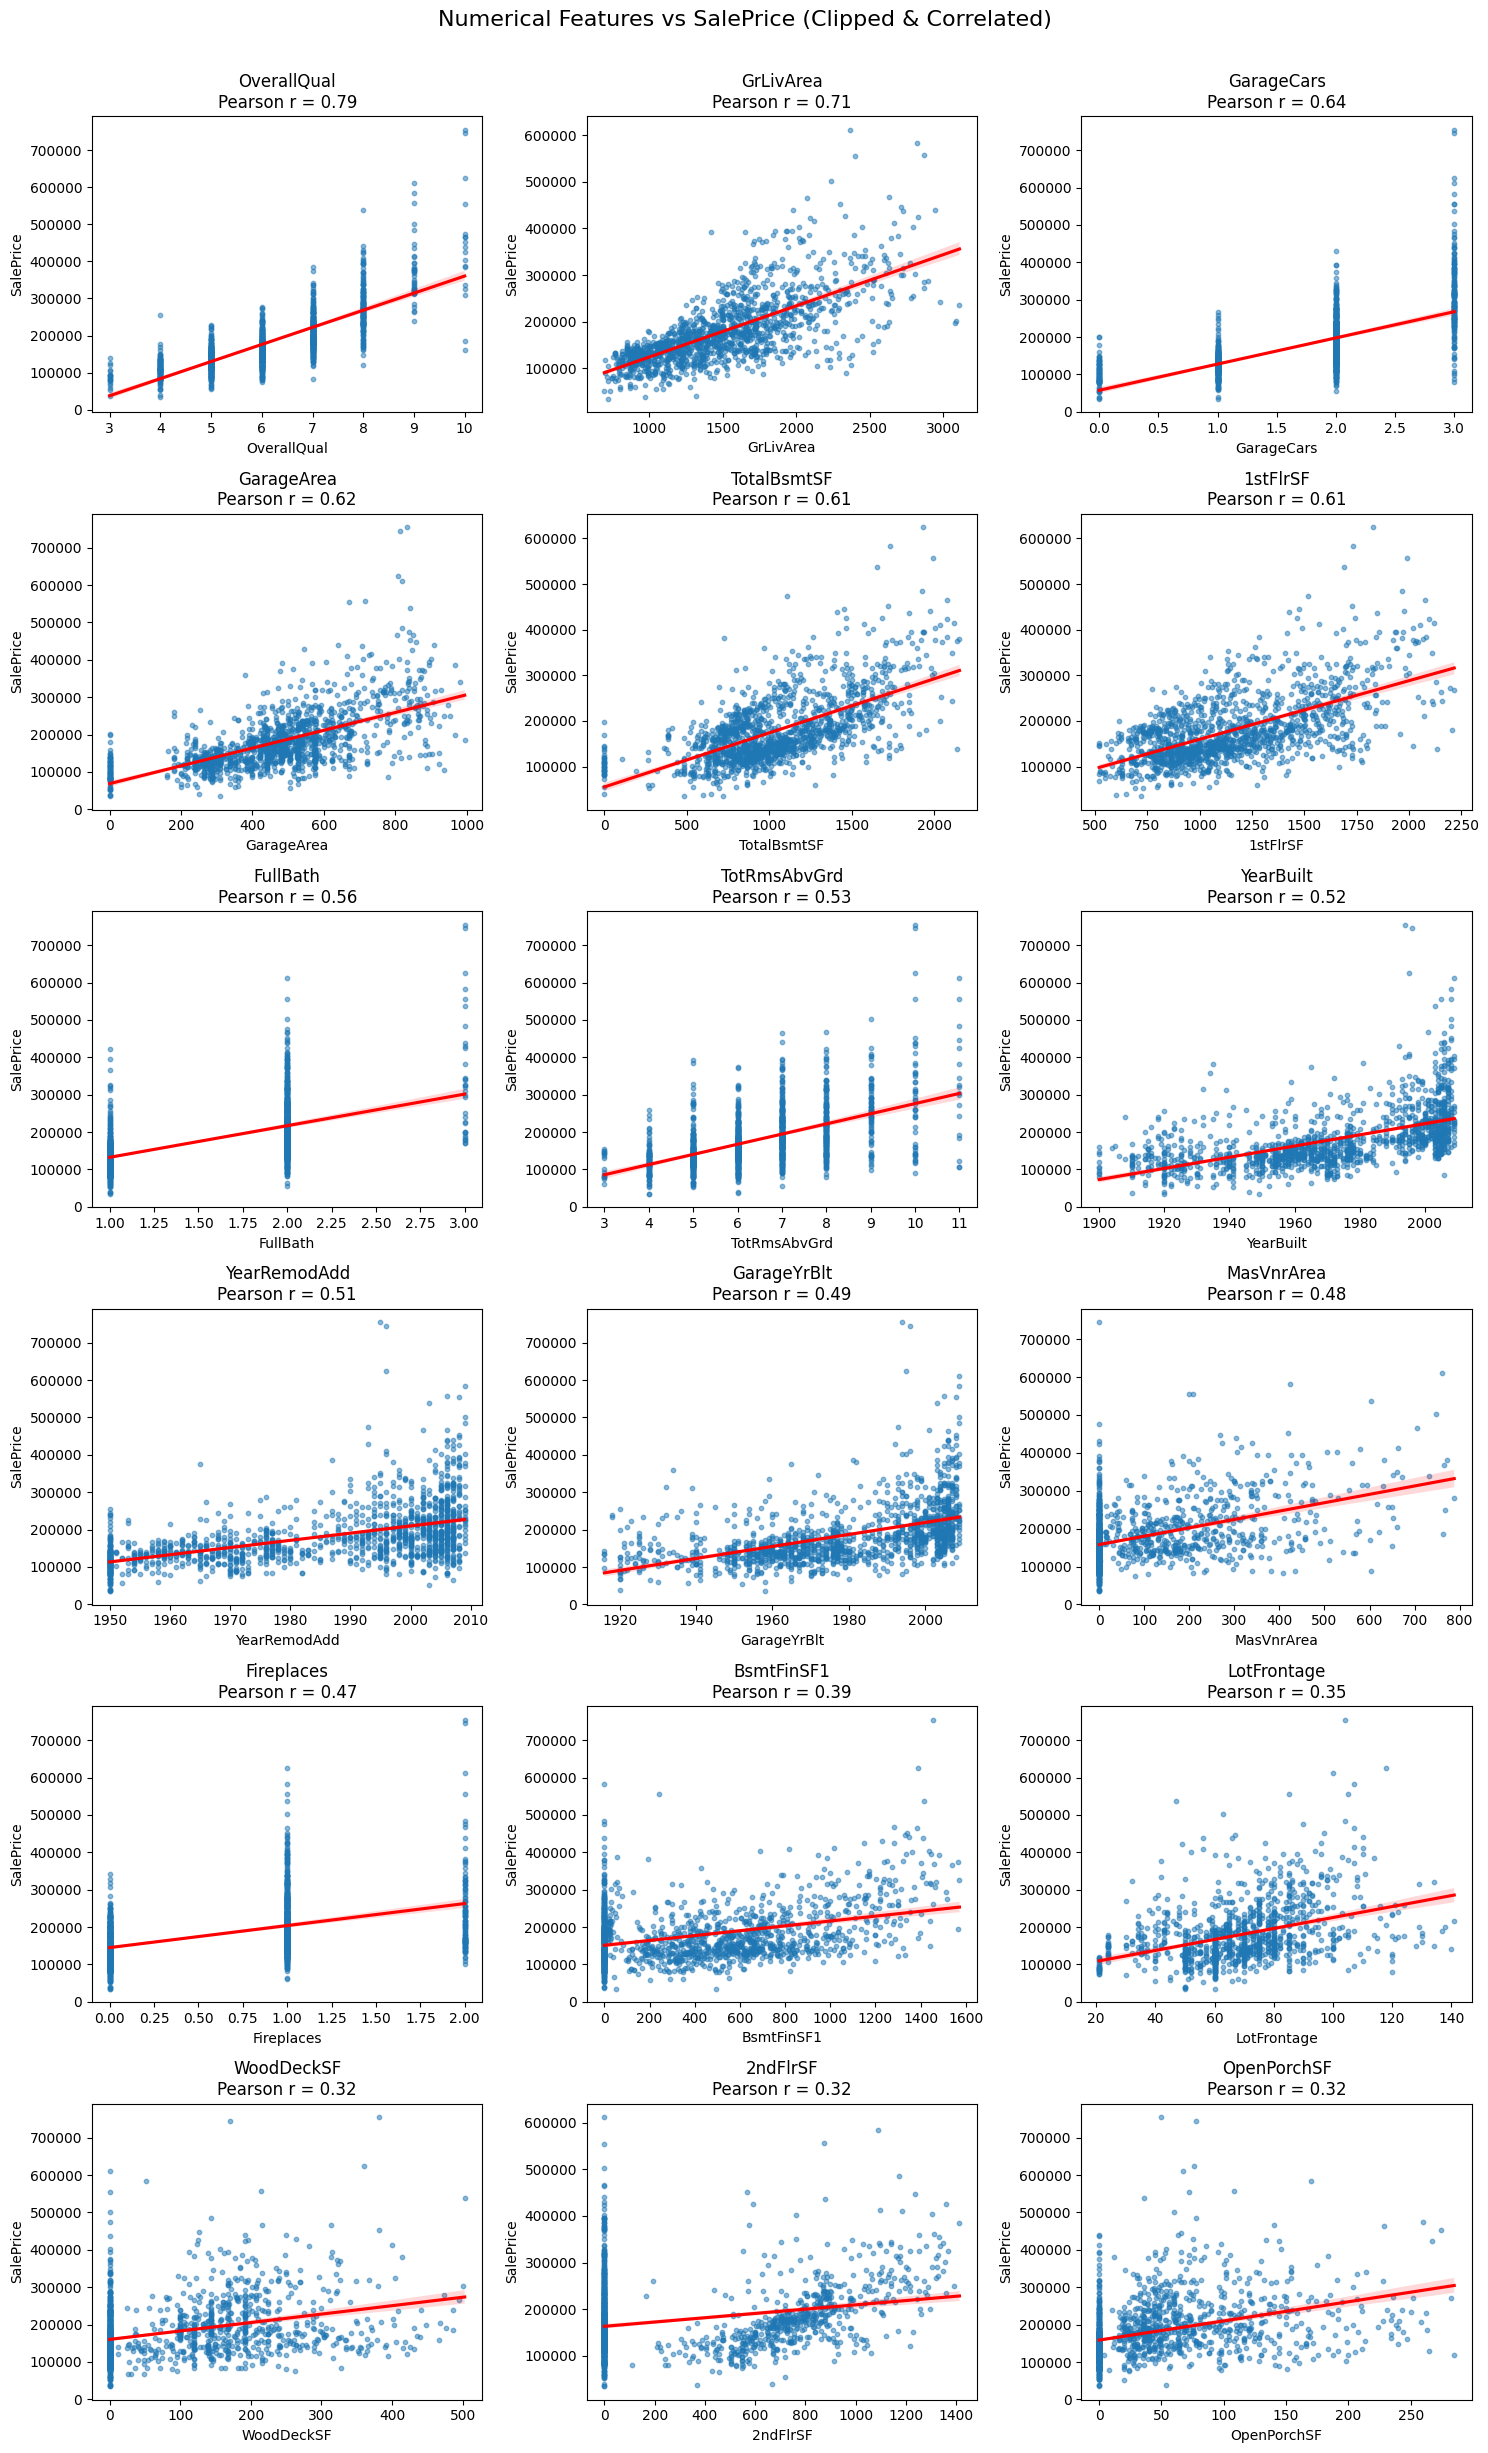

🧠 Mutual Information Scores with SalePrice:


In [ ]:
# Step 1: Compute correlations with SalePrice
correlation_series = df_train[numeric_cols + ['SalePrice']].corr()['SalePrice'].drop('SalePrice')

# Step 2: Set a correlation threshold
correlation_threshold = 0.3
filtered_corr = correlation_series[correlation_series.abs() > correlation_threshold].sort_values(key=abs, ascending=False)
selected_features = filtered_corr.index.tolist()

# Step 3: Display correlation values
print(f"🔍 Numerical Features with |Correlation| > {correlation_threshold}:")
display(filtered_corr.to_frame(name='Correlation').style.background_gradient(cmap='vlag'))

# Step 4: Grid layout of scatter plots with outlier clipping
cols = 3
rows = math.ceil(len(selected_features) / cols)
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
axes = axes.flatten()

for i, col in enumerate(selected_features):
    x = df_train[col]
    y = df_train['SalePrice']

    # Clip outliers at 1st and 99th percentiles
    lower = x.quantile(0.01)
    upper = x.quantile(0.99)
    mask = (x >= lower) & (x <= upper)
    x_clipped = x[mask]
    y_clipped = y[mask]

    sns.regplot(x=x_clipped, y=y_clipped, ax=axes[i],
                scatter_kws={'s': 10, 'alpha': 0.5}, line_kws={'color': 'red'})

    r = correlation_series[col]
    axes[i].set_title(f"{col}\nPearson r = {r:.2f}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("SalePrice")

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("Numerical Features vs SalePrice (Clipped & Correlated)", fontsize=16, y=1.02)
plt.show()

# Calculate mutual information with SalePrice
# Fill missing values (required for MI calculation)
X_numeric = df_train[numeric_cols].fillna(0)
y_target = df_train['SalePrice']

# Compute mutual information scores
mi_scores = mutual_info_regression(X_numeric, y_target, discrete_features=False, random_state=42)
mi_series = pd.Series(mi_scores, index=numeric_cols).sort_values(ascending=False)

# Display top features by mutual information
print("🧠 Mutual Information Scores with SalePrice:")
display(mi_series.to_frame(name="MI Score").style.background_gradient(cmap='YlGn'))

# Store selected features based on correlation

#### 3.5.4 Store Highly Correlated Numerical Features

In [ ]:
# Features with |Pearson correlation| > threshold
num_corr_pearson = filtered_corr.index.tolist()

# Features with Mutual Information > threshold
mi_threshold = 0.1  # You can tune this
num_corr_mi = mi_series[mi_series > mi_threshold].index.tolist()

# Union of both sets — final strong numerical features
num_corr_strong = list(set(num_corr_pearson + num_corr_mi))

# Display and confirm
print("📌 Pearson Correlated Numerical Features (|r| > 0.3):")
print(num_corr_pearson)

print("\n📌 MI-Based Numerical Features (MI > 0.1):")
print(num_corr_mi)

print("\n📦 Stored Strong Numerical Features (Combined):")
print(num_corr_strong)


📌 Pearson Correlated Numerical Features (|r| > 0.3):
['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1', 'LotFrontage', 'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF']

📌 MI-Based Numerical Features (MI > 0.1):
['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'GarageArea', 'YearBuilt', '1stFlrSF', 'MSSubClass', 'GarageYrBlt', 'FullBath', 'YearRemodAdd', 'TotRmsAbvGrd', 'LotFrontage', '2ndFlrSF', 'Fireplaces', 'LotArea', 'OpenPorchSF', 'BsmtFinSF1', 'OverallCond', 'BsmtUnfSF', 'WoodDeckSF']

📦 Stored Strong Numerical Features (Combined):
['1stFlrSF', 'YearBuilt', 'OverallQual', 'FullBath', 'MasVnrArea', 'GrLivArea', 'BsmtUnfSF', 'WoodDeckSF', 'BsmtFinSF1', 'YearRemodAdd', 'MSSubClass', 'LotFrontage', 'GarageCars', 'OverallCond', 'OpenPorchSF', 'TotalBsmtSF', 'TotRmsAbvGrd', '2ndFlrSF', 'Fireplaces', 'LotArea', 'GarageArea', 'GarageYrBlt']


### 3.6 Explore Categorical Features

#### 3.6.1 Overview of Categorical Variable's Distributions

In [ ]:
# 3.6.1 Overview of Categorical Variable Distributions

# Step 1: Basic info
print(f"Total Categorical Features: {len(categorical_cols)}")

# Step 2: Count unique values per categorical column
cat_uniques = df_train[categorical_cols].nunique().sort_values(ascending=False)

# Step 3: Display as a styled DataFrame
cat_summary_df = cat_uniques.to_frame(name='Unique Values')
display(cat_summary_df.style.background_gradient(cmap='Blues'))

# Step 4: Flag potential encoding issues
high_cardinality = cat_summary_df[cat_summary_df['Unique Values'] > 10]
print("⚠️ High-cardinality categorical features (may need grouping or embedding):")
display(high_cardinality)


Total Categorical Features: 43


⚠️ High-cardinality categorical features (may need grouping or embedding):


Unique Values
Neighborhood             25
Exterior2nd              16
Exterior1st              15

#### 3.6.2 Category Feature Analysis

📊 Plotting frequency distributions for 40 categorical features with ≤10 unique values.


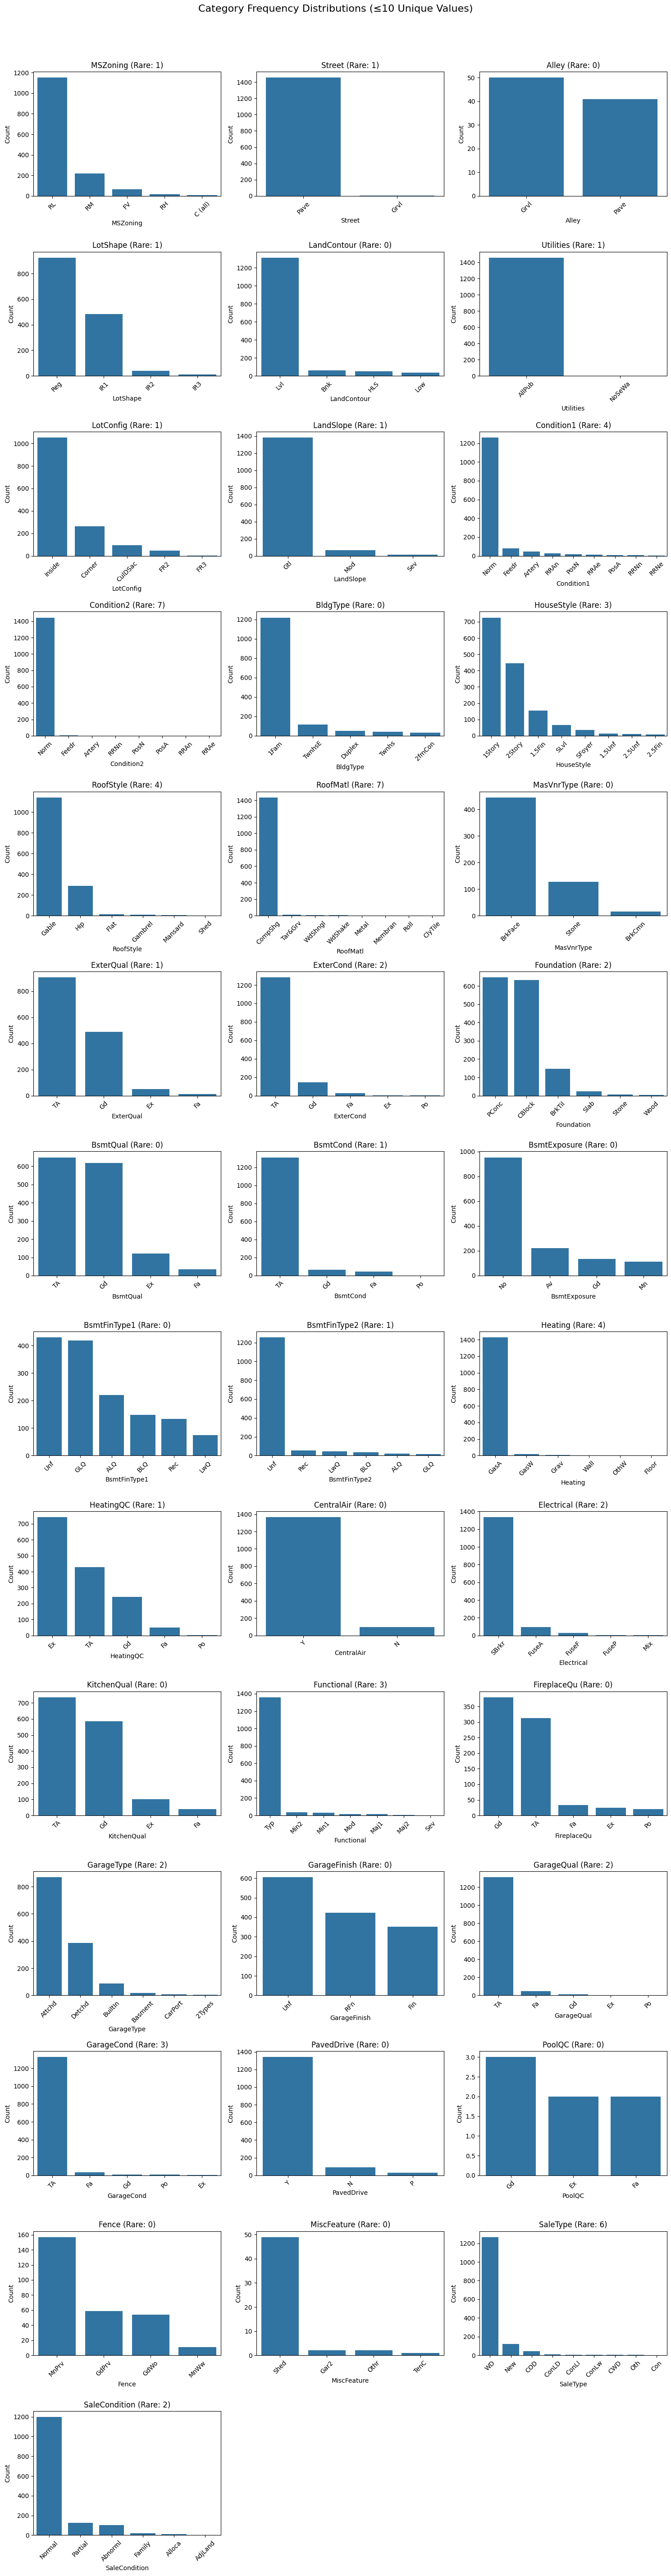

🔎 Rare category levels (<1% of rows) by feature:
MSZoning: ['C (all)']
Street: ['Grvl']
LotShape: ['IR3']
Utilities: ['NoSeWa']
LotConfig: ['FR3']
LandSlope: ['Sev']
Condition1: ['RRAe', 'PosA', 'RRNn', 'RRNe']
Condition2: ['Feedr', 'Artery', 'RRNn', 'PosN', 'PosA', 'RRAn', 'RRAe']
HouseStyle: ['1.5Unf', '2.5Unf', '2.5Fin']
RoofStyle: ['Flat', 'Gambrel', 'Mansard', 'Shed']
RoofMatl: ['Tar&Grv', 'WdShngl', 'WdShake', 'Metal', 'Membran', 'Roll', 'ClyTile']
ExterQual: ['Fa']
ExterCond: ['Ex', 'Po']
Foundation: ['Stone', 'Wood']
BsmtCond: ['Po']
BsmtFinType2: ['GLQ']
Heating: ['Grav', 'Wall', 'OthW', 'Floor']
HeatingQC: ['Po']
Electrical: ['FuseP', 'Mix']
Functional: ['Maj1', 'Maj2', 'Sev']
GarageType: ['CarPort', '2Types']
GarageQual: ['Ex', 'Po']
GarageCond: ['Gd', 'Po', 'Ex']
SaleType: ['ConLD', 'ConLI', 'ConLw', 'CWD', 'Oth', 'Con']
SaleCondition: ['Alloca', 'AdjLand']


In [ ]:
# Filter categorical features with ≤10 unique categories
low_card_cats = [col for col in categorical_cols if df_train[col].nunique() <= 10]

print(f"📊 Plotting frequency distributions for {len(low_card_cats)} categorical features with ≤10 unique values.")

# Rare threshold
rare_thresh = 0.01  # 1%

# Dictionary to store rare levels by feature
rare_levels_by_feature = {}

# Grid setup: 3 plots per row
n_cols = 3
n_rows = math.ceil(len(low_card_cats) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(low_card_cats):
    value_counts = df_train[col].value_counts(normalize=True)
    order = value_counts.index
    rare_levels = value_counts[value_counts < rare_thresh].index.tolist()
    
    # Store for later use
    if rare_levels:
        rare_levels_by_feature[col] = rare_levels
    
    # Plot
    sns.countplot(data=df_train, x=col, order=order, ax=axes[i])
    axes[i].set_title(f"{col} (Rare: {len(rare_levels)})")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=45)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("Category Frequency Distributions (≤10 Unique Values)", fontsize=16, y=1.02)
plt.show()

# Print rare level summary
print("🔎 Rare category levels (<1% of rows) by feature:")
for col, rares in rare_levels_by_feature.items():
    print(f"{col}: {rares}")


#### 3.6.3 Explore Relationship between Categorical Features and Sales Price

📈 Plotting SalePrice boxplots for 40 categorical features with ≤10 unique values.


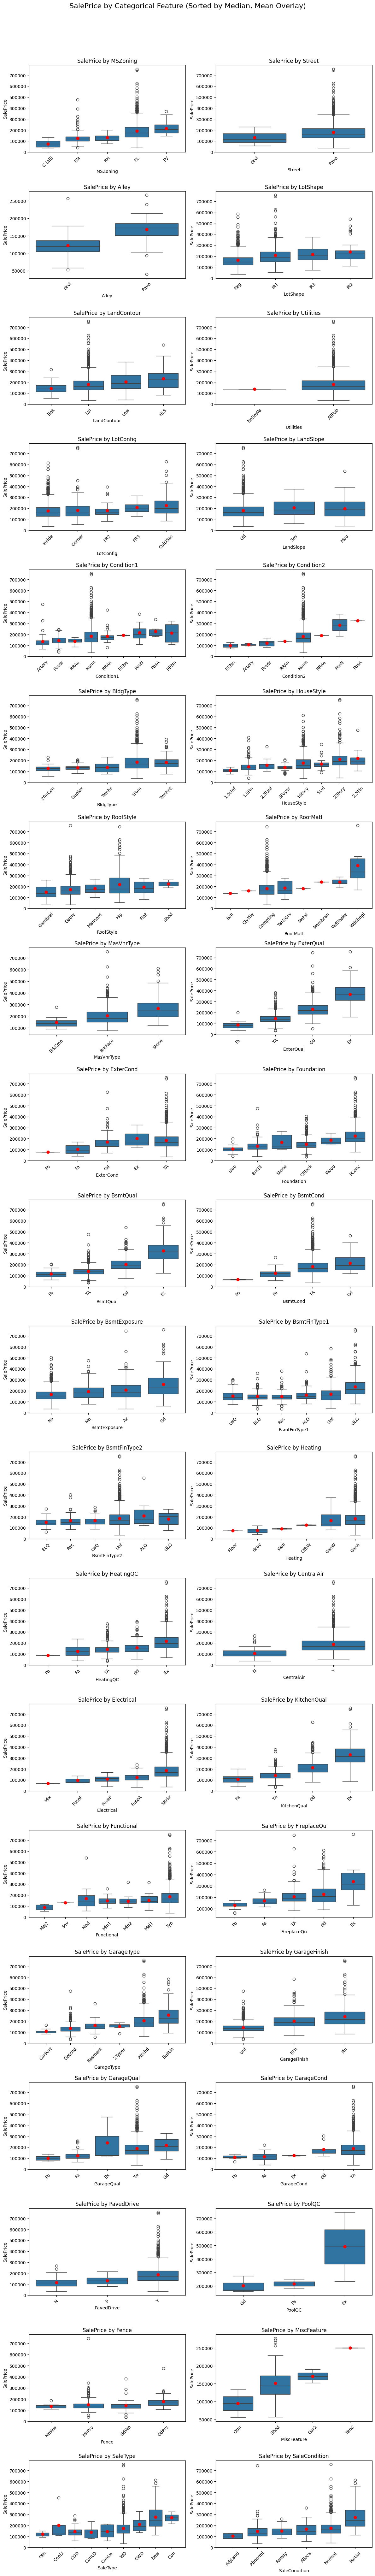

In [ ]:
# Print boxplots of SalePrice by categorical features with ≤10 unique values
print(f"📈 Plotting SalePrice boxplots for {len(low_card_cats)} categorical features with ≤10 unique values.")

# Grid setup
n_cols = 2
n_rows = math.ceil(len(low_card_cats) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 4))
axes = axes.flatten()

# Boxplots with enhancements
for i, col in enumerate(low_card_cats):
    ax = axes[i]

    # Sort categories by median SalePrice
    median_order = df_train.groupby(col)['SalePrice'].median().sort_values().index

    # Draw boxplot
    sns.boxplot(data=df_train, x=col, y='SalePrice', ax=ax, order=median_order)

    # Overlay red dot for mean SalePrice
    category_means = df_train.groupby(col)['SalePrice'].mean().loc[median_order]
    for tick, mean in enumerate(category_means):
        ax.scatter(tick, mean, color='red', s=40, zorder=3)

    # Style
    ax.set_title(f"SalePrice by {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("SalePrice")
    ax.tick_params(axis='x', rotation=45)

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("SalePrice by Categorical Feature (Sorted by Median, Mean Overlay)", fontsize=16, y=1.02)
plt.show()


#### 3.6.4 Identify Highly Correlated Categorical Features

In [ ]:
# Function to compute correlation ratio (η²) for categorical vs. numeric
def correlation_ratio(categories, values):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat) + 1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)

    for i in range(cat_num):
        cat_values = values[fcat == i]
        n_array[i] = len(cat_values)
        y_avg_array[i] = np.mean(cat_values)

    y_total_avg = np.sum(y_avg_array * n_array) / np.sum(n_array)
    numerator = np.sum(n_array * (y_avg_array - y_total_avg) ** 2)
    denominator = np.sum((values - y_total_avg) ** 2)
    return numerator / denominator if denominator != 0 else 0

# Compute η² for all categorical features
cat_correlations = {}

for col in categorical_cols:
    try:
        ratio = correlation_ratio(df_train[col], df_train['SalePrice'])
        cat_correlations[col] = ratio
    except:
        pass  # skip features with all NaNs or invalid values

# Convert to Series, sort, and display
cat_corr_series = pd.Series(cat_correlations).sort_values(ascending=False)

print("🏠 Categorical Features Most Correlated with SalePrice (via η²):")
display(cat_corr_series.to_frame(name='Correlation Ratio (η²)').style.background_gradient(cmap='YlOrRd'))

# Store full and filtered results for later use
cat_corr_df = pd.DataFrame({
    'Feature': cat_corr_series.index,
    'Eta_Squared': cat_corr_series.values
}).reset_index(drop=True)

cat_corr_strong = cat_corr_df[cat_corr_df['Eta_Squared'] > 0.1]
important_categorical_features = cat_corr_strong['Feature'].tolist()

print("📦 Stored highly correlated categorical features for later preprocessing:")
display(cat_corr_strong)

🏠 Categorical Features Most Correlated with SalePrice (via η²):


📦 Stored highly correlated categorical features for later preprocessing:


Feature  Eta_Squared
0    Neighborhood     0.545575
1       ExterQual     0.477388
2     KitchenQual     0.456599
3        BsmtQual     0.441369
4      Foundation     0.256368
5    GarageFinish     0.248964
6       HeatingQC     0.195500
7      GarageType     0.192481
8    BsmtFinType1     0.187340
9     Exterior2nd     0.153830
10    Exterior1st     0.152773
11       SaleType     0.137287
12  SaleCondition     0.135497
13   BsmtExposure     0.126855
14       MSZoning     0.107560

### 3.7 Explore Engineered Boolean Features

#### 3.7.1 Identify Binary Categorical Variables

In [ ]:
# Identify binary categorical features (2 unique values)
binary_cats = [col for col in categorical_cols if df_train[col].nunique(dropna=True) == 2]
print(f"✅ Binary categorical features: {binary_cats}")

# Engineer Boolean versions of these features for analysis
for col in binary_cats:
    val1, val2 = df_train[col].dropna().unique()
    new_col = f"Is_{col}_{val1}"
    df_train[new_col] = df_train[col] == val1


✅ Binary categorical features: ['Street', 'Alley', 'Utilities', 'CentralAir']


#### 3.7.2 Engineer Candidates for Boolean Features

In [ ]:
# Candidate engineered Booleans (these will be formalized later)
df_train['HasBasement'] = df_train['BsmtQual'].notna()
df_train['Has2ndFlr'] = df_train['2ndFlrSF'] > 0
df_train['HasGarage'] = df_train['GarageType'].notna()
df_train['HasDeck'] = df_train['WoodDeckSF'] > 0
df_train['HasOpenPorch'] = df_train['OpenPorchSF'] > 0
df_train['HasEnclosedPorch'] = df_train['EnclosedPorch'] > 0
df_train['Has3SsnPorch'] = df_train['3SsnPorch'] > 0
df_train['HasScreenPorch'] = df_train['ScreenPorch'] > 0
df_train['HasPool'] = df_train['PoolArea'] > 0

# Display engineered Boolean features
engineered_bool_features = [
    'HasBasement', 'Has2ndFlr', 'HasGarage', 'HasDeck',
    'HasOpenPorch', 'HasEnclosedPorch', 'Has3SsnPorch',
    'HasScreenPorch', 'HasPool'
]

#Display the DataFrame with engineered Boolean features
display(df_train[engineered_bool_features + ['SalePrice']].head())

HasBasement  Has2ndFlr  HasGarage  HasDeck  HasOpenPorch  HasEnclosedPorch  \
0         True       True       True    False          True             False   
1         True      False       True     True         False             False   
2         True       True       True    False          True             False   
3         True       True       True    False          True              True   
4         True       True       True     True          True             False   

   Has3SsnPorch  HasScreenPorch  HasPool  SalePrice  
0         False           False    False     208500  
1         False           False    False     181500  
2         False           False    False     223500  
3         False           False    False     140000  
4         False           False    False     250000

#### 3.7.3 Summarize Distributions of Engineered Booleans

In [ ]:
# Summarize distributions of engineered Boolean features only
bool_summary = pd.DataFrame({
    'True Count': df_train[engineered_bool_features].sum(),
    'False Count': (~df_train[engineered_bool_features]).sum(),
    'True %': df_train[engineered_bool_features].mean() * 100
}).sort_values(by='True %', ascending=False)

display(bool_summary.style.background_gradient(cmap='Purples'))

#### 3.7.4 Identify Relationships Between Categorical Features and SalePrice

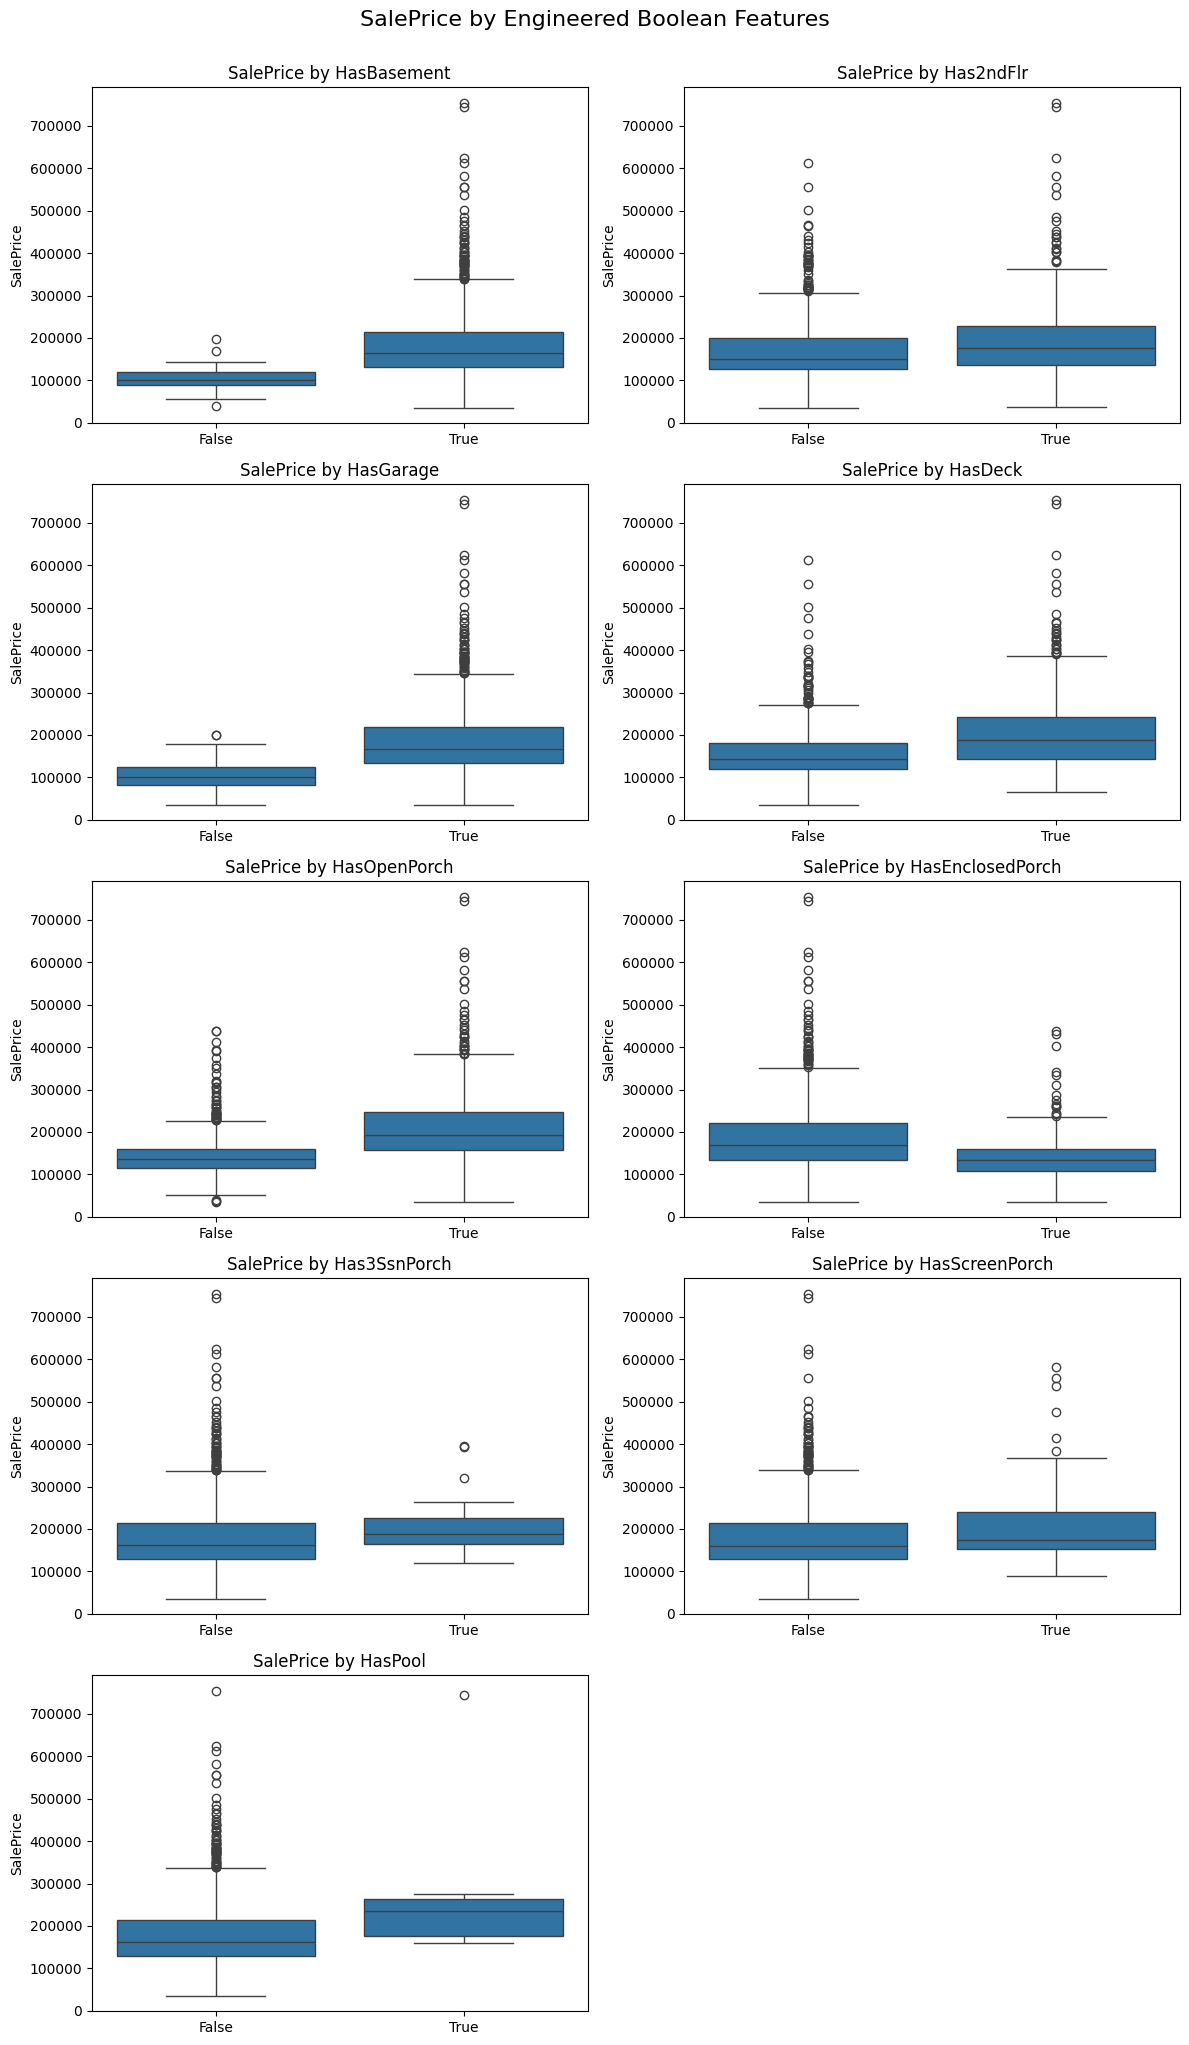

In [ ]:
# Grid layout: 2 columns, dynamic number of rows
n_cols = 2
n_rows = math.ceil(len(engineered_bool_features) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 4))
axes = axes.flatten()

# Create boxplots
for i, col in enumerate(engineered_bool_features):
    sns.boxplot(data=df_train, x=col, y='SalePrice', ax=axes[i])
    axes[i].set_title(f"SalePrice by {col}")
    axes[i].set_xlabel('')
    axes[i].set_ylabel('SalePrice')

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("SalePrice by Engineered Boolean Features", fontsize=16, y=1.02)
plt.show()


#### 3.7.5 Engineered Booleans Correlation with SalePrice

In [ ]:
# Compute Pearson correlation between engineered Booleans and SalePrice
bool_encoded = df_train[engineered_bool_features].astype(int)
bool_corr = bool_encoded.corrwith(df_train['SalePrice']).sort_values(key=abs, ascending=False)

# Display correlations
display(bool_corr.to_frame(name='Correlation').style.background_gradient(cmap='vlag'))

# Identify strongly correlated engineered features
strong_engineered_bools = bool_corr[bool_corr.abs() > 0.1].index.tolist()
print("📦 Strong Engineered Booleans (|r| > 0.1):")
print(strong_engineered_bools)

# --- 2. ANOVA F-test ---
from scipy.stats import f_oneway

anova_results = {}

for col in engineered_bool_features:
    group1 = df_train[df_train[col]]['SalePrice']
    group2 = df_train[~df_train[col]]['SalePrice']
    
    if len(group1) > 0 and len(group2) > 0:
        f_stat, p_val = f_oneway(group1, group2)
        anova_results[col] = p_val

anova_series = pd.Series(anova_results).sort_values()

print("\n📊 ANOVA p-values (lower = stronger evidence of difference):")
display(anova_series.to_frame(name='ANOVA p-value').style.background_gradient(cmap='YlOrRd_r'))

# --- 3. Mutual Information ---
from sklearn.feature_selection import mutual_info_regression

mi_scores = mutual_info_regression(bool_encoded, df_train['SalePrice'], discrete_features=True, random_state=42)
mi_series = pd.Series(mi_scores, index=engineered_bool_features).sort_values(ascending=False)

print("\n🧠 Mutual Information Scores:")
display(mi_series.to_frame(name='MI Score').style.background_gradient(cmap='YlGn'))




📦 Strong Engineered Booleans (|r| > 0.1):
['HasOpenPorch', 'HasDeck', 'HasGarage', 'HasEnclosedPorch', 'HasBasement', 'Has2ndFlr']

📊 ANOVA p-values (lower = stronger evidence of difference):



🧠 Mutual Information Scores:


#### 3.7.6 Final Selection of Engineered Boolean Features

In [ ]:
# --- Define thresholds ---
corr_thresh = 0.1              # Pearson correlation (absolute)
anova_p_thresh = 0.05          # ANOVA p-value
mi_thresh = 0.01               # Mutual information score

# --- Normalize index names just in case ---
anova_series.index = anova_series.index.astype(str)
mi_series.index = mi_series.index.astype(str)
bool_corr.index = bool_corr.index.astype(str)

# --- Filter each set ---
strong_corr = bool_corr[bool_corr.abs() > corr_thresh].index
strong_anova = anova_series[anova_series < anova_p_thresh].index
strong_mi = mi_series[mi_series > mi_thresh].index

# --- Intersection (features that pass ALL 3 criteria) ---
engineered_bool_corr_strong = list(set(strong_corr) & set(strong_anova) & set(strong_mi))

# --- Output results ---
print("✅ Numerically Selected Engineered Boolean Features (pass all 3 thresholds):")
print(engineered_bool_corr_strong)


✅ Numerically Selected Engineered Boolean Features (pass all 3 thresholds):
['HasDeck', 'HasBasement', 'HasEnclosedPorch', 'HasOpenPorch', 'HasGarage', 'Has2ndFlr']


### 3.8 Explore Relationships Between Feature Types

#### 3.8.1 Correlation Between Numerical and Boolean Features

/Users/kevingoldberg/Documents/Personal Projects/Housing/.venv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:3063: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/kevingoldberg/Documents/Personal Projects/Housing/.venv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:3064: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/var/folders/f4/d6y08yk57kb4mrdshdg8c8bc0000gn/T/ipykernel_8230/3981087562.py:16: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/kevingoldberg/Documents/Personal Projects/Housing/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


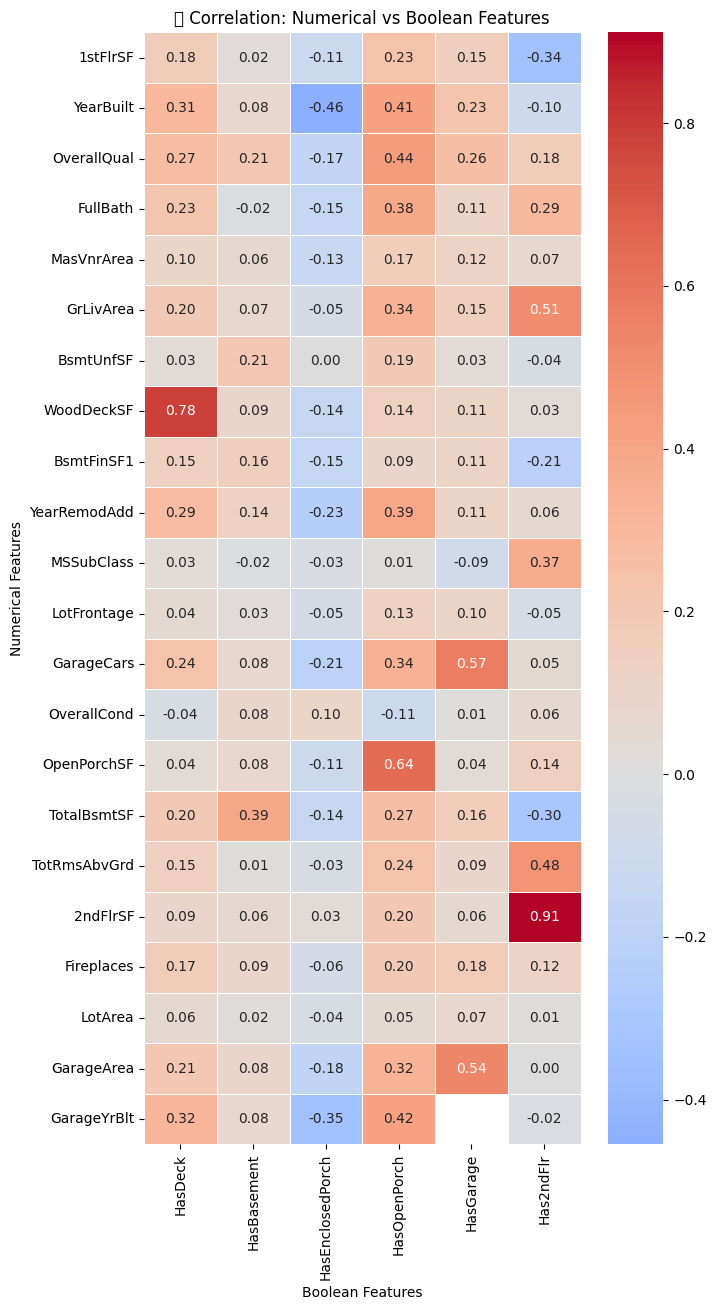

In [147]:
# Convert Boolean features to integers
bool_encoded = df_train[engineered_bool_corr_strong].astype(int)

# Compute correlation between numerical and Boolean features
numeric_bool_corr = pd.DataFrame(
    {bool_col: df_train[num_corr_strong].corrwith(bool_encoded[bool_col])
     for bool_col in engineered_bool_corr_strong}
)

# Plot heatmap with red-blue diverging colors
plt.figure(figsize=(1.2 * len(engineered_bool_corr_strong), 0.6 * len(num_corr_strong)))
sns.heatmap(numeric_bool_corr, annot=True, fmt=".2f", cmap='coolwarm', center=0, linewidths=0.5)
plt.title("📊 Correlation: Numerical vs Boolean Features")
plt.xlabel("Boolean Features")
plt.ylabel("Numerical Features")
plt.tight_layout()
plt.show()


#### 3.8.2 Correlation Ratio Between Numerical and Categorical Features

/var/folders/f4/d6y08yk57kb4mrdshdg8c8bc0000gn/T/ipykernel_8230/2763127802.py:20: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/kevingoldberg/Documents/Personal Projects/Housing/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


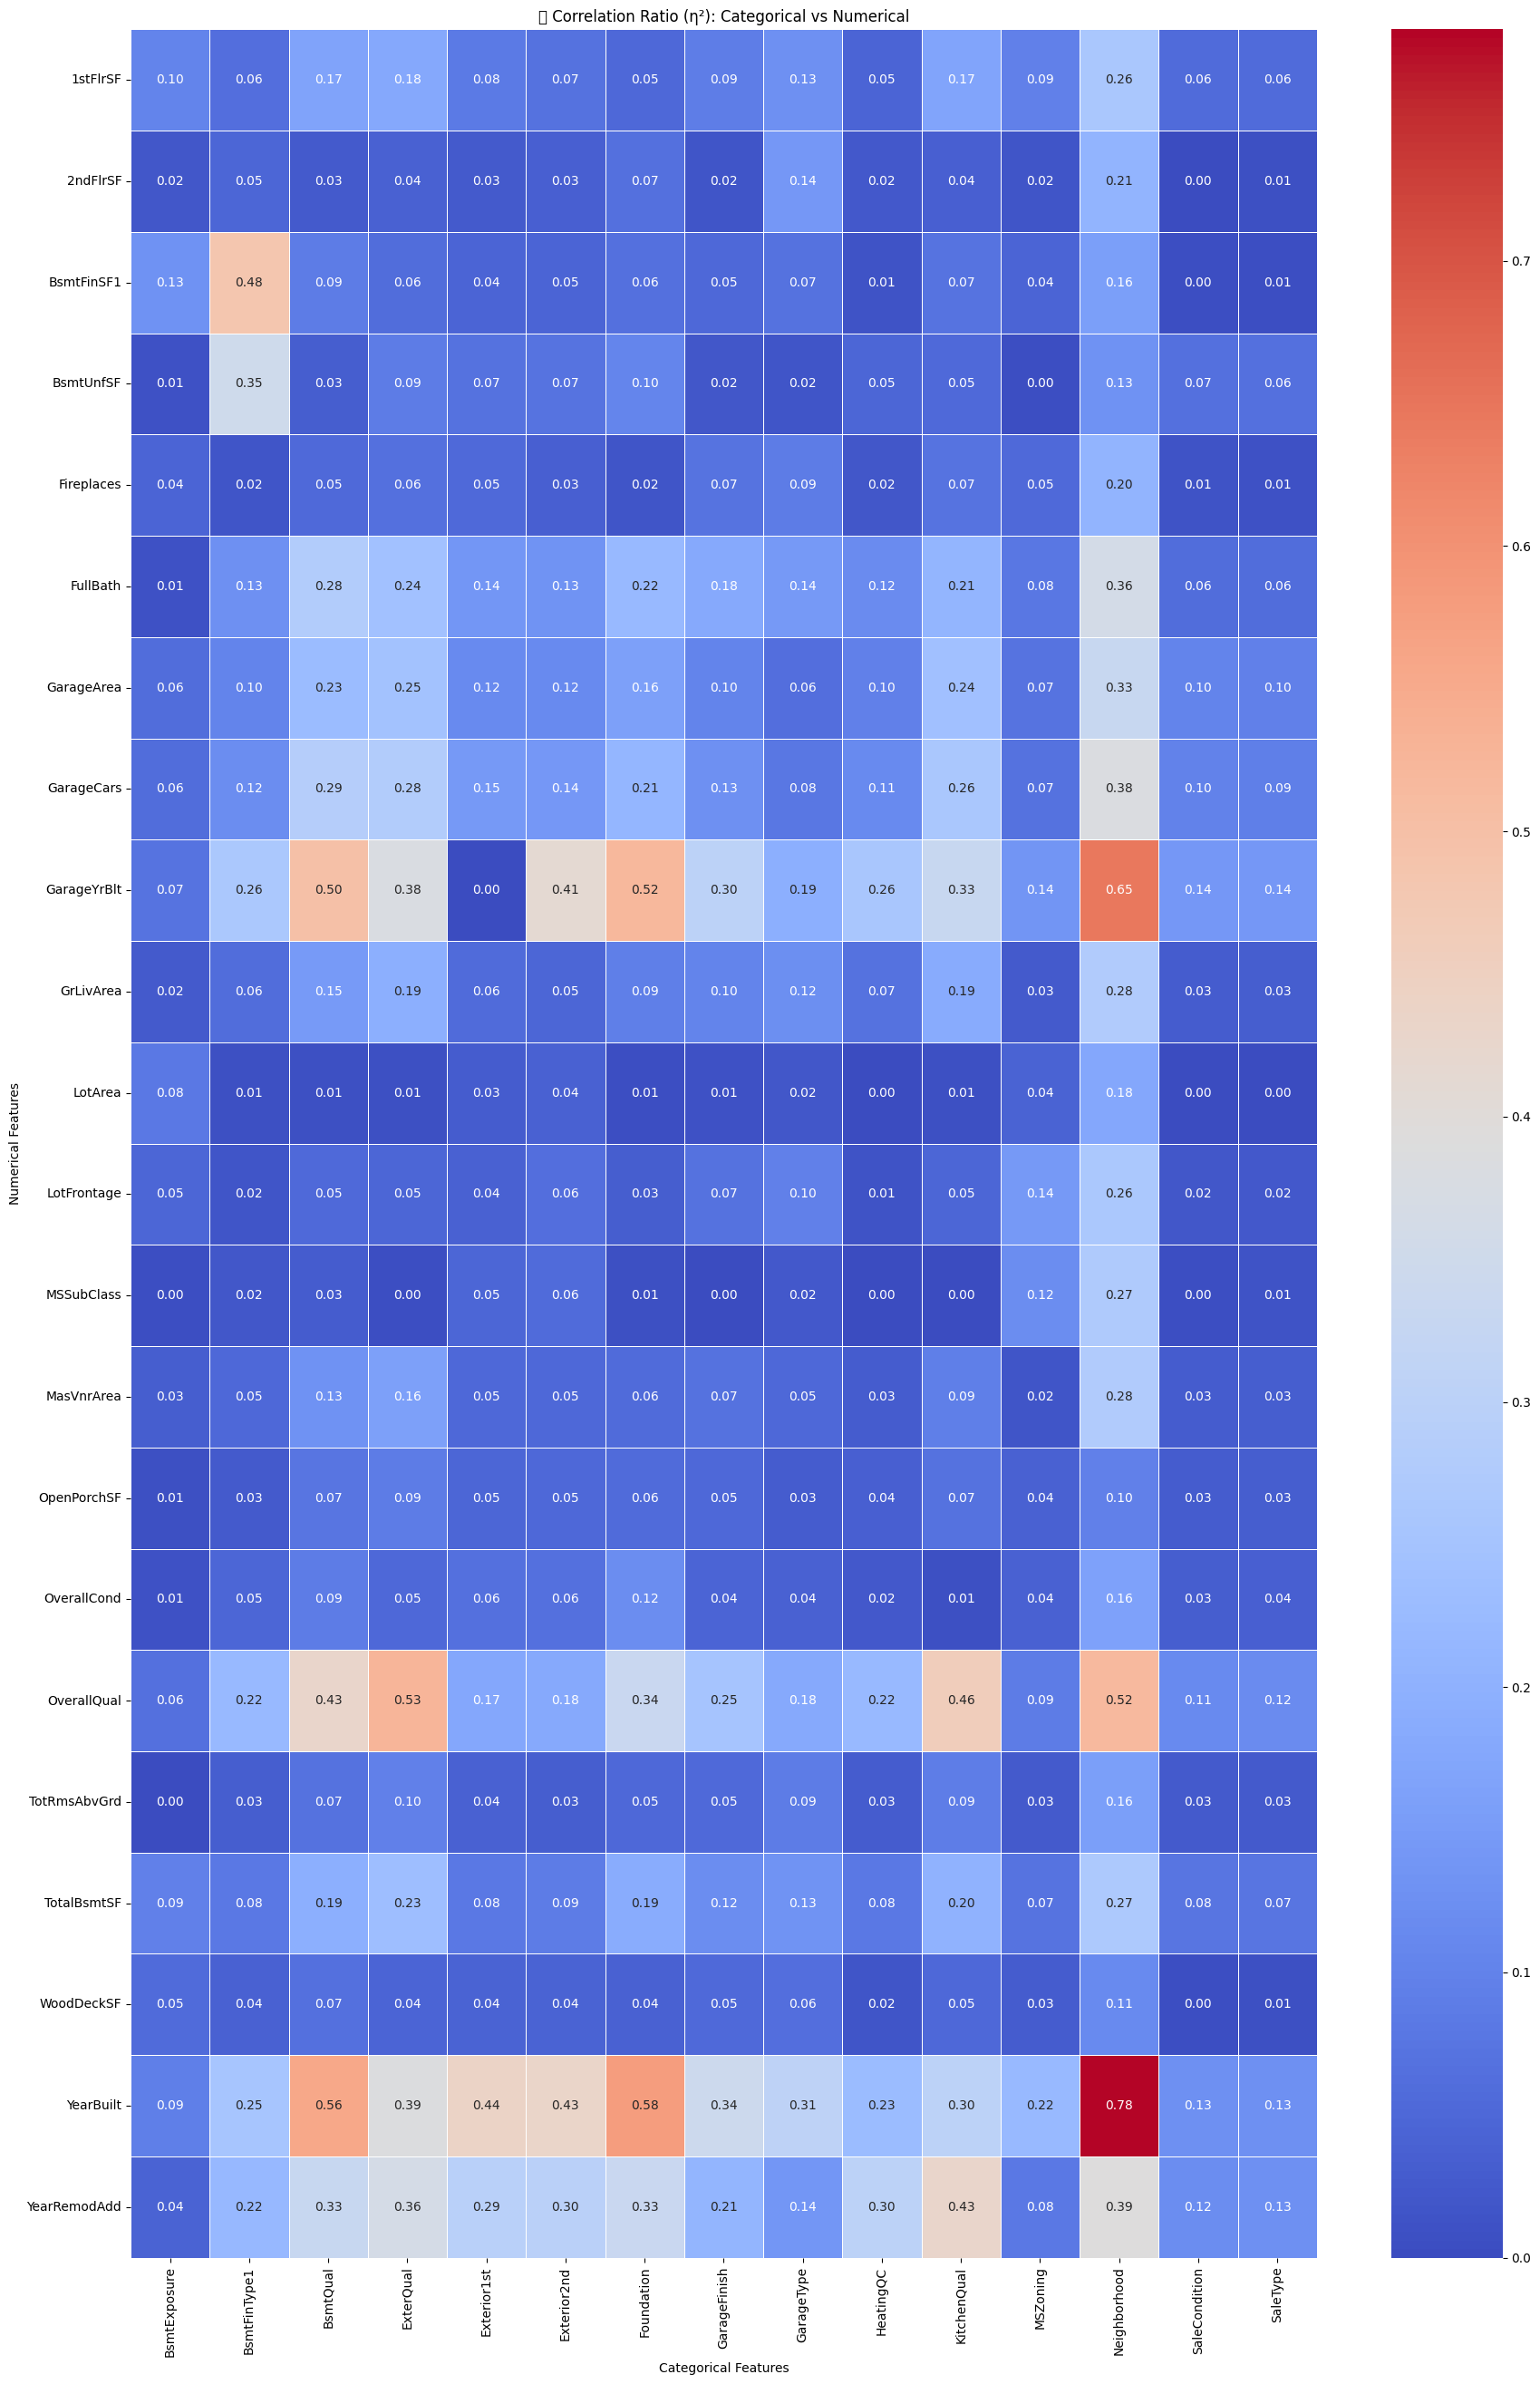

In [152]:
# Compute η² for numerical-categorical pairs
cat_num_corr = {}

for cat in important_categorical_features:
    for num in num_corr_strong:
        try:
            eta_sq = correlation_ratio(df_train[cat], df_train[num])
            cat_num_corr[(cat, num)] = eta_sq
        except:
            pass

cat_num_matrix = pd.Series(cat_num_corr).unstack().fillna(0)

# Plot heatmap with consistent color scale
plt.figure(figsize=(1.2 * len(important_categorical_features), 1.2 * len(num_corr_strong)))
sns.heatmap(cat_num_matrix.T, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("📊 Correlation Ratio (η²): Categorical vs Numerical")
plt.xlabel("Categorical Features")
plt.ylabel("Numerical Features")
plt.tight_layout()
plt.show()


#### 3.8.3 Correlation Between Boolean and Categoricsl Features

/var/folders/f4/d6y08yk57kb4mrdshdg8c8bc0000gn/T/ipykernel_8230/3079673144.py:20: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/kevingoldberg/Documents/Personal Projects/Housing/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


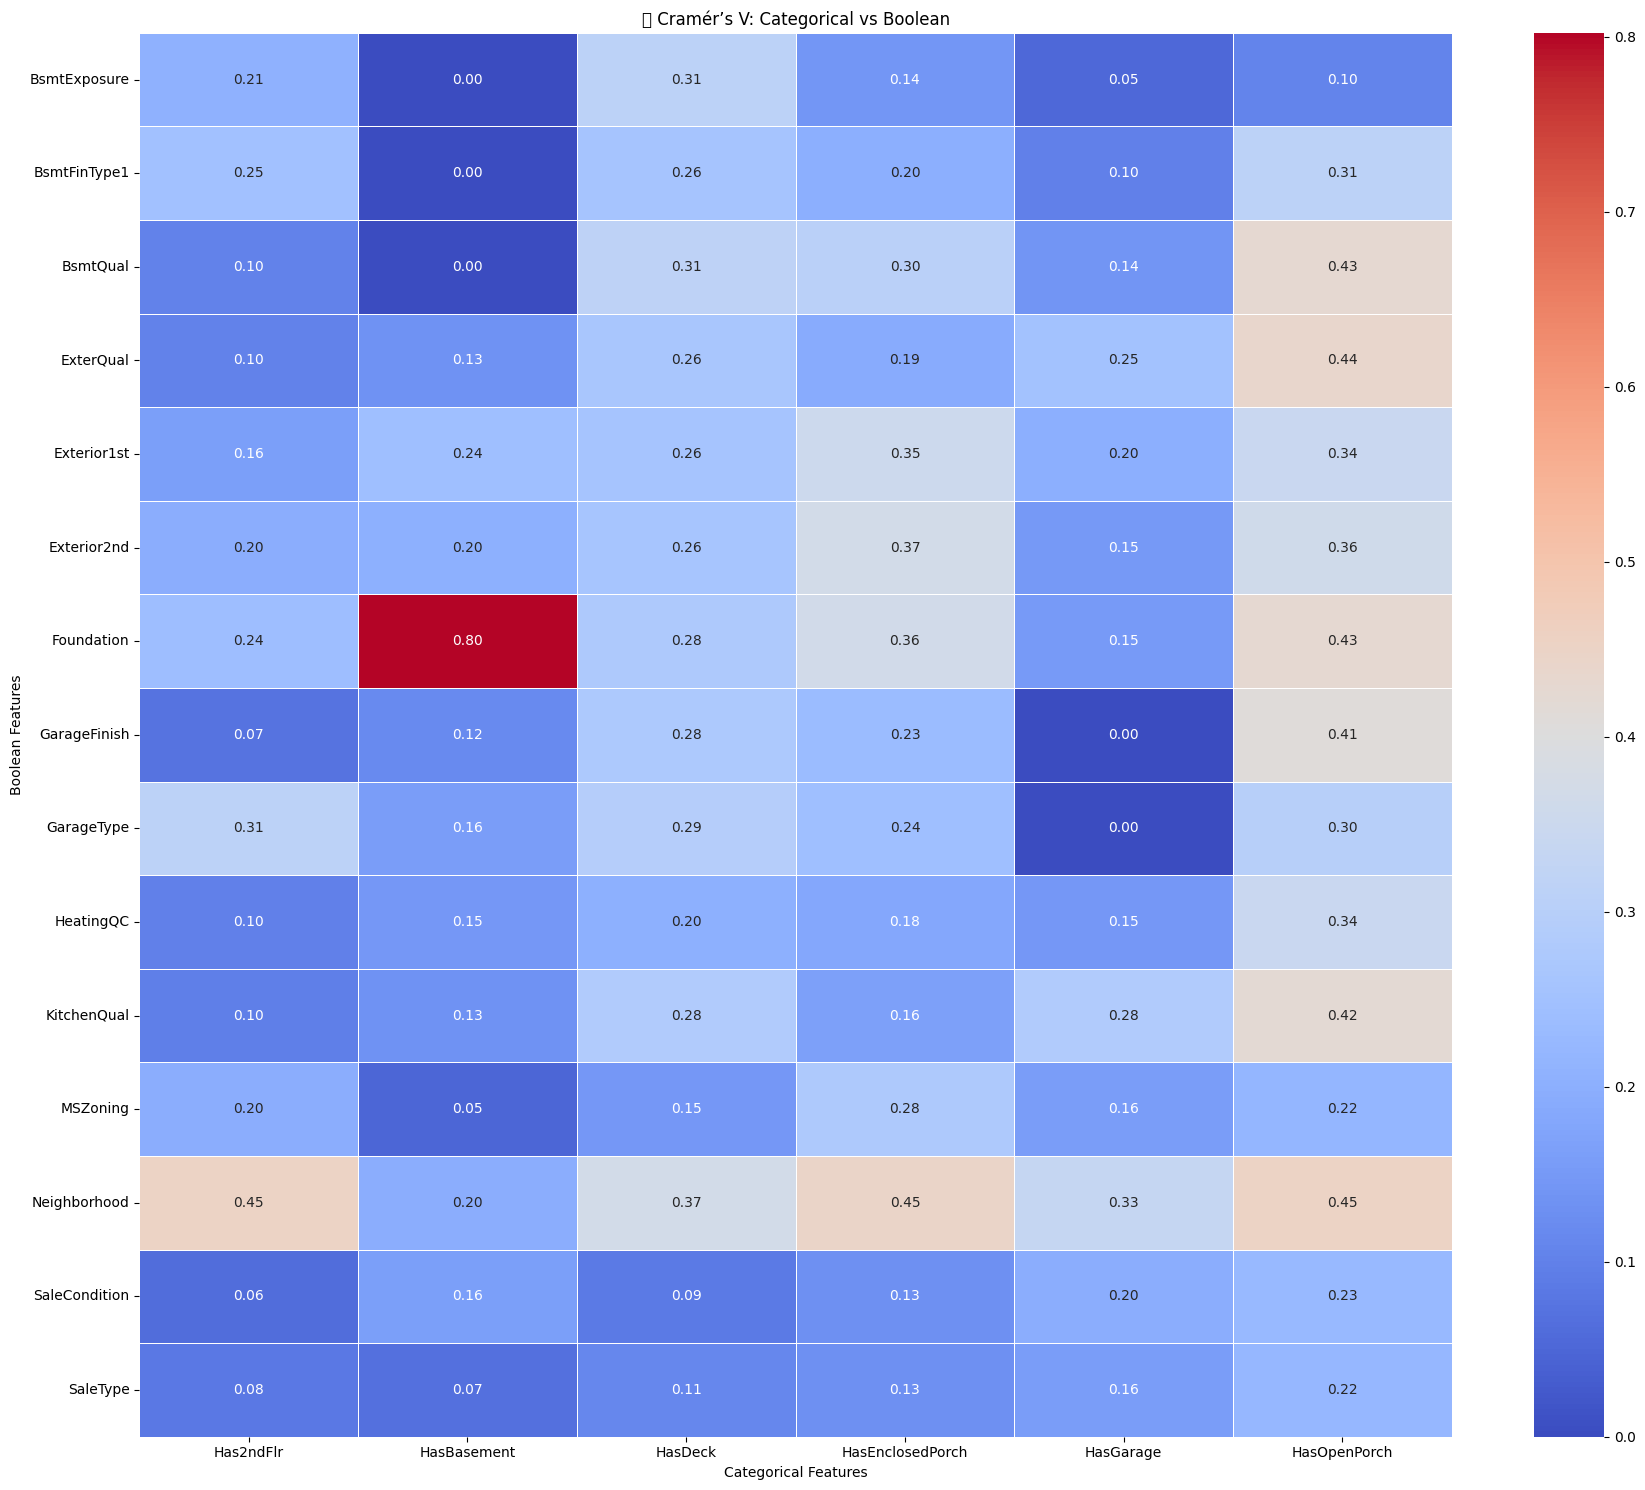

In [151]:
# Compute Cramér’s V
bool_cat_cramer = {}

for bool_col in engineered_bool_corr_strong:
    for cat_col in important_categorical_features:
        try:
            val = cramers_v(df_train[bool_col], df_train[cat_col])
            bool_cat_cramer[(bool_col, cat_col)] = val
        except:
            pass

bool_cat_matrix = pd.Series(bool_cat_cramer).unstack().fillna(0)

# Plot heatmap with red-blue style
plt.figure(figsize=(1.2 * len(important_categorical_features), 2.5 * len(engineered_bool_corr_strong)))
sns.heatmap(bool_cat_matrix.T, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("📊 Cramér’s V: Categorical vs Boolean")
plt.xlabel("Categorical Features")
plt.ylabel("Boolean Features")
plt.tight_layout()
plt.show()


# 4. Data Cleaning and Preprocessing

### 4.1 Handle Missing Values

#### 4.1.1 Handle Missing Numerical Data

In [156]:
# Combine train + test to identify *all* numeric columns with missing values
combined_numeric = pd.concat([df_train[numeric_cols], df_test[numeric_cols]], axis=0)

numeric_with_na_test = combined_numeric.isnull().sum()
numeric_cols_to_fill = numeric_with_na_test[numeric_with_na_test > 0].index.tolist()

for col in numeric_cols_to_fill:
    median_val = df_train[col].median()  # Always compute from training set
    df_train[col] = df_train[col].fillna(median_val)
    df_test[col] = df_test[col].fillna(median_val)

#### 4.1.2 Handle Missing Categorical Data

In [159]:
combined_cats = pd.concat([df_train[categorical_cols], df_test[categorical_cols]], axis=0)

categorical_with_na_test = combined_cats.isnull().sum()
cat_cols_to_fill = categorical_with_na_test[categorical_with_na_test > 0].index.tolist()

for col in cat_cols_to_fill:
    df_train[col] = df_train[col].fillna('Missing')
    df_test[col] = df_test[col].fillna('Missing')


### 4.2 Feature Engineering

#### 4.2.1 Add Selected Engineered Boolean Features

In [ ]:
# Only keep the selected engineered Boolean features
selected_bool_features = [
    'HasBasement', 
    'Has2ndFlr', 
    'HasGarage', 
    'HasDeck',
    'HasOpenPorch'
]

# Recreate them cleanly in case upstream changes occurred
df_train['HasBasement'] = df_train['BsmtQual'].notna()
df_train['Has2ndFlr'] = df_train['2ndFlrSF'] > 0
df_train['HasGarage'] = df_train['GarageType'].notna()
df_train['HasDeck'] = df_train['WoodDeckSF'] > 0
df_train['HasOpenPorch'] = df_train['OpenPorchSF'] > 0

# Do the same for the test set
df_test['HasBasement'] = df_test['BsmtQual'].notna()
df_test['Has2ndFlr'] = df_test['2ndFlrSF'] > 0
df_test['HasGarage'] = df_test['GarageType'].notna()
df_test['HasDeck'] = df_test['WoodDeckSF'] > 0
df_test['HasOpenPorch'] = df_test['OpenPorchSF'] > 0

# Convert selected Boolean features to integers (0/1)
for col in selected_bool_features:
    df_train[col] = df_train[col].astype(int)
    df_test[col] = df_test[col].astype(int)

#### 4.2.2 Add Binary Encoded Features

In [164]:
# Step 1: Identify Binary Categorical Features
binary_cats = [col for col in categorical_cols if df_train[col].nunique(dropna=True) == 2]
print(f"✅ Binary categorical features: {binary_cats}")

# Step 2: Create Boolean Columns from Binary Categories
for col in binary_cats:
    val1, val2 = df_train[col].dropna().unique()
    new_col = f"Is_{col}_{val1}"
    
    df_train[new_col] = (df_train[col] == val1).astype(int)
    df_test[new_col]  = (df_test[col] == val1).astype(int)

# Step 3: Save New Column Names for Later
binary_bool_features = [f"Is_{col}_{df_train[col].dropna().unique()[0]}" for col in binary_cats]


✅ Binary categorical features: ['Street', 'Utilities', 'CentralAir']


#### 4.2.3 Log Transform Skewed Features

In [174]:
# Reuse selected features (from 3.5.2)
print("🔁 Applying log1p to:")
print(log_transform_features)

# Apply log1p transformation to train and test sets
for col in log_transform_features:
    df_train[col] = np.log1p(df_train[col])
    df_test[col]  = np.log1p(df_test[col])

🔁 Applying log1p to:
['LotArea', 'OpenPorchSF', 'LotFrontage', 'BsmtFinSF1', 'MSSubClass', '1stFlrSF', 'GrLivArea']


### 4.3 Encode Categorical Features

#### 4.3.1 One-Hot Encoding for Low Cardinality Categorical Features

In [168]:
# Identify low-cardinality categorical features (safe for one-hot encoding)
low_card_cats = [col for col in categorical_cols if df_train[col].nunique() <= 10]

print(f"🎯 Encoding {len(low_card_cats)} low-cardinality categorical features:")
print(low_card_cats)

# Apply one-hot encoding to both train and test sets
df_train_encoded = pd.get_dummies(df_train, columns=low_card_cats, drop_first=False)
df_test_encoded = pd.get_dummies(df_test, columns=low_card_cats, drop_first=False)

# Align columns (handle test/train discrepancies)
df_train_encoded, df_test_encoded = df_train_encoded.align(df_test_encoded, join='left', axis=1, fill_value=0)

# Overwrite main DataFrames for next steps
df_train = df_train_encoded
df_test = df_test_encoded

🎯 Encoding 40 low-cardinality categorical features:
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


#### 4.3.2 Handling High Cardinaolity Features

In [173]:
# Step 1: Apply frequency encoding to important high-cardinality features
for col in important_high_card:
    freq = df_train[col].value_counts(normalize=True)

    # Map frequencies to both train and test sets (use training frequencies)
    df_train[col + '_FreqEnc'] = df_train[col].map(freq)
    df_test[col + '_FreqEnc'] = df_test[col].map(freq)

# Step 2: Drop the original high-cardinality features
df_train.drop(columns=important_high_card, inplace=True)
df_test.drop(columns=important_high_card, inplace=True)

print("✅ Frequency encoding applied to important high-cardinality features:")
print(important_high_card)


✅ Frequency encoding applied to important high-cardinality features:
['Neighborhood', 'Exterior2nd', 'Exterior1st']


### 4.4 Normalize Numerical Features

In [175]:
# Step 1: Identify final numerical features to scale (excluding target and ID)
all_current_numeric = df_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
exclude_cols = ['SalePrice', 'Id']
scaled_numeric_features = [col for col in all_current_numeric if col not in exclude_cols]

# Step 2: Initialize scaler
scaler = StandardScaler()

# Step 3: Fit on training set, transform both
df_train[scaled_numeric_features] = scaler.fit_transform(df_train[scaled_numeric_features])
df_test[scaled_numeric_features] = scaler.transform(df_test[scaled_numeric_features])

# Step 4: Confirm
print("✅ Normalized numerical features:")
print(scaled_numeric_features)

✅ Normalized numerical features:
['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'Is_Street_Pave', 'Is_Utilities_AllPub', 'Is_CentralAir_Y', 'HasBasement', 'Has2ndFlr', 'HasGarage', 'HasDeck', 'HasOpenPorch', 'Neighborhood_FreqEnc', 'Exterior2nd_FreqEnc', 'Exterior1st_FreqEnc']


## 4.5 Feature Selection

In [176]:
# Step 1: Get all numeric columns (already scaled, includes log-transformed)
final_numeric = [col for col in df_train.select_dtypes(include=['float64', 'int64']).columns 
                 if col not in ['SalePrice', 'Id']]

# Step 2: Include engineered boolean features
final_engineered_bools = selected_bool_features  # already encoded as 0/1 in 4.2.1

# Step 3: Include binary categorical boolean encodings
final_binary_bools = binary_bool_features  # from 4.2.2

# Step 4: Include frequency-encoded high-cardinality features
freq_encoded_cols = [col + '_FreqEnc' for col in important_high_card]

# Step 5: Combine everything
final_features = sorted(set(final_numeric + final_engineered_bools + final_binary_bools + freq_encoded_cols))

# Step 6: Confirm
print(f"✅ Total features selected for modeling: {len(final_features)}")
print(final_features)


✅ Total features selected for modeling: 47
['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF', 'EnclosedPorch', 'Exterior1st_FreqEnc', 'Exterior2nd_FreqEnc', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars', 'GarageYrBlt', 'GrLivArea', 'HalfBath', 'Has2ndFlr', 'HasBasement', 'HasDeck', 'HasGarage', 'HasOpenPorch', 'Is_CentralAir_Y', 'Is_Street_Pave', 'Is_Utilities_AllPub', 'KitchenAbvGr', 'LotArea', 'LotFrontage', 'LowQualFinSF', 'MSSubClass', 'MasVnrArea', 'MiscVal', 'MoSold', 'Neighborhood_FreqEnc', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PoolArea', 'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt', 'YearRemodAdd', 'YrSold']


# 5 Modeling

### 5.1 Define Train/Validation Split

In [177]:
# Define inputs and target
X = df_train[final_features]  # final_features includes all selected features
y = df_train['SalePrice']

# Split into train and validation sets
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Confirm shapes
print(f"🔹 Training set shape: {X_train_split.shape}")
print(f"🔹 Validation set shape: {X_val_split.shape}")

🔹 Training set shape: (1168, 47)
🔹 Validation set shape: (292, 47)


### 5.2 Train a Baseline Model

In [ ]:
# Initialize Linear Regression
baseline_model = LinearRegression()

# Train the model
baseline_model.fit(X_train_split, y_train_split)

# Predict on validation set
y_pred_val = baseline_model.predict(X_val_split)

# Evaluate using Root Mean Squared Error (RMSE)
rmse_val = np.sqrt(mean_squared_error(y_val_split, y_pred_val))
print(f"📏 Baseline Linear Regression RMSE on Validation Set: {rmse_val:.2f}")

📏 Baseline Linear Regression RMSE on Validation Set: 35971.17


### 5.3 Train Advanced Models

In [184]:
# Define models with basic/default hyperparameters
models = {
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.01),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

# Store results
model_results = {}

# Train, predict, and evaluate
for name, model in models.items():
    model.fit(X_train_split, y_train_split)
    y_pred = model.predict(X_val_split)
    rmse = np.sqrt(mean_squared_error(y_val_split, y_pred))
    model_results[name] = rmse
    print(f"{name} RMSE: {rmse:.2f}")

# Sort and display results
sorted_results = dict(sorted(model_results.items(), key=lambda item: item[1]))
print("\n📊 Model Performance (sorted by RMSE):")
for name, rmse in sorted_results.items():
    print(f"{name}: {rmse:.2f}")

Ridge RMSE: 36000.43
Lasso RMSE: 35971.22


/Users/kevingoldberg/Documents/Personal Projects/Housing/.venv/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.946e+11, tolerance: 6.967e+08
  model = cd_fast.enet_coordinate_descent(


Random Forest RMSE: 28586.41
Gradient Boosting RMSE: 29159.12

📊 Model Performance (sorted by RMSE):
Random Forest: 28586.41
Gradient Boosting: 29159.12
Lasso: 35971.22
Ridge: 36000.43


# 6. Evaluation

### 6.1 Residual Analysis

📊 Baseline Model Performance on Training Set:
RMSE: 32874.39
R² Score: 0.8188


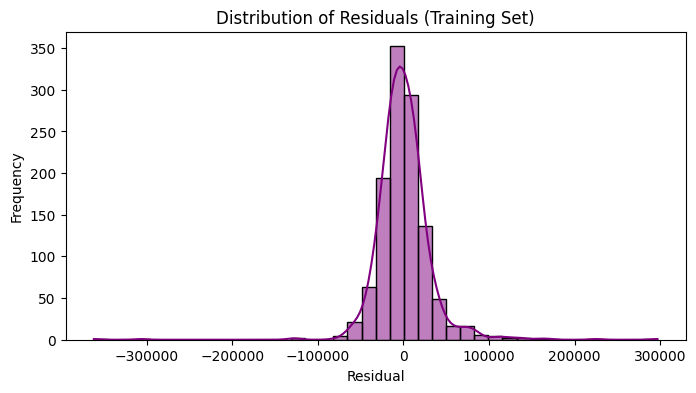

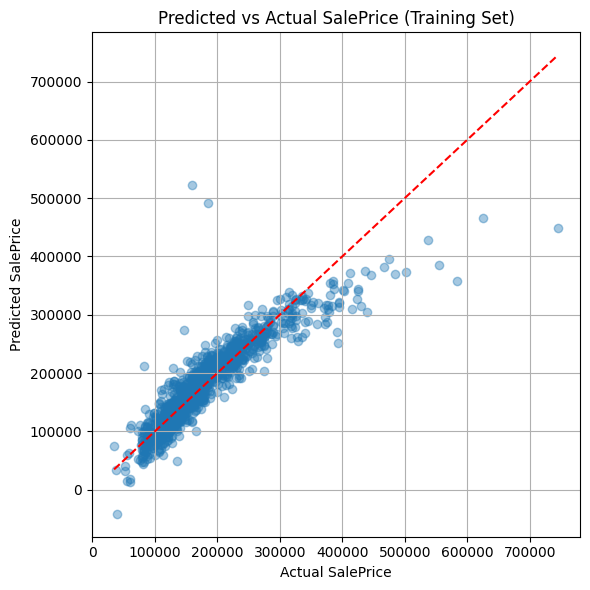

In [190]:
# Evaluate baseline model on training set (X_train_split)
y_train_pred = baseline_model.predict(X_train_split)

# Evaluate performance
train_mse = mean_squared_error(y_train_split, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train_split, y_train_pred)

print(f"📊 Baseline Model Performance on Training Set:")
print(f"RMSE: {train_rmse:.2f}")
print(f"R² Score: {train_r2:.4f}")

# Residuals
residuals_train = y_train_split - y_train_pred

# Plot residuals
plt.figure(figsize=(8, 4))
sns.histplot(residuals_train, kde=True, bins=40, color='purple')
plt.title("Distribution of Residuals (Training Set)")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()

# Plot predicted vs actual
plt.figure(figsize=(6, 6))
plt.scatter(y_train_split, y_train_pred, alpha=0.4)
plt.plot([y_train_split.min(), y_train_split.max()],
         [y_train_split.min(), y_train_split.max()], 'r--')
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Predicted vs Actual SalePrice (Training Set)")
plt.grid(True)
plt.tight_layout()
plt.show()


### 6.2 Evaluate on Validation Set

📉 Validation RMSE: 35971.17


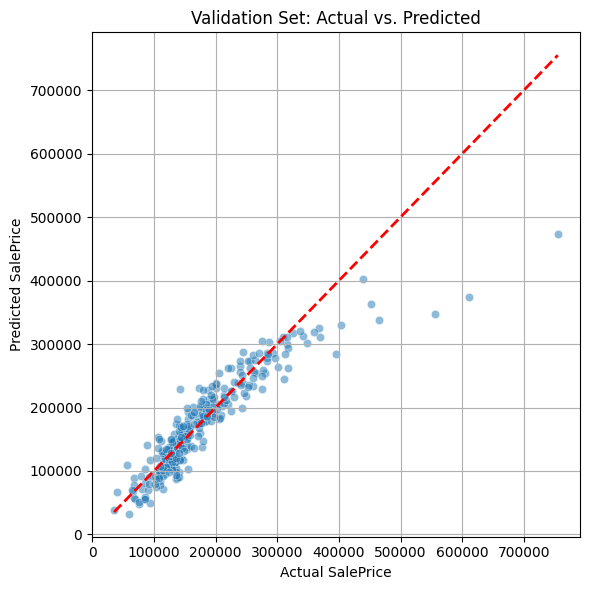

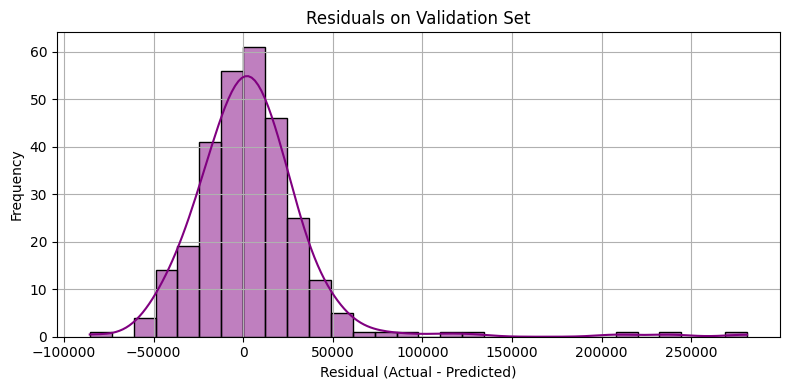

In [192]:
# Predict on validation set
y_val_pred = baseline_model.predict(X_val_split)

# Compute RMSE
val_rmse = np.sqrt(mean_squared_error(y_val_split, y_val_pred))
print(f"📉 Validation RMSE: {val_rmse:.2f}")

# Scatter plot: Actual vs. Predicted
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_val_split, y=y_val_pred, alpha=0.5)
plt.plot([y_val_split.min(), y_val_split.max()],
         [y_val_split.min(), y_val_split.max()],
         color='red', linestyle='--', linewidth=2)
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Validation Set: Actual vs. Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot residuals
val_residuals = y_val_split - y_val_pred
plt.figure(figsize=(8, 4))
sns.histplot(val_residuals, bins=30, kde=True, color='purple')
plt.title("Residuals on Validation Set")
plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


# 7 Deployment

### 7.1 Prepare Final Model

In [193]:
from sklearn.linear_model import LinearRegression
import joblib  # or use pickle if preferred

# Recreate training data using full dataset
X_final = df_train[final_features]
y_final = df_train['SalePrice']

# Retrain baseline model on the full training data
final_model = LinearRegression()
final_model.fit(X_final, y_final)

# Save the trained model to a file
joblib.dump(final_model, 'final_model.joblib')

print("✅ Final model trained and saved as 'final_model.joblib'")


✅ Final model trained and saved as 'final_model.joblib'


### 7.2 Prepare the Test Set for Submission

In [ ]:
# Ensure test set goes through the same preprocessing as training set
# This assumes all transformations used on df_train have been applied to df_test
# Extract the test features using the same columns
X_test_final = df_test[final_features]

# Predict on the test set using the final trained model
y_test_pred = final_model.predict(X_test_final)

# Prepare submission DataFrame
submission_df = pd.DataFrame({
    'Id': df_test['Id'],
    'SalePrice': y_test_pred
})

# Save submission to CSV
submission_df.to_csv('submission.csv', index=False)

print("📁 Submission file 'submission.csv' created successfully.")
display(submission_df.head())

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values